# 탄소중립을 위한 기후기술 정보 시각화 경진대회
##  Team 알바트로스

*   Intro, 종합 : 한원배

*   CCUS : 이정훈, 오세연

*   Smart Grid : 박은혜, 김태영




# 들어가며

게시물 제목에서 언급한 것처럼 지구온난화로 해수면이 상승하고 있고, 지구의 온도는 나날이 올라가고 있습니다. 이상 기후로 통한 인적 피해는 늘어가고 있고, 이는 작황의 불안으로 현재 인플레이션이라는 경제적 이슈를 초래했습니다. 
저희는 지구온난화와 초래된 원인인 온실가스의 증가와 그로 인한 지구 환경의 변화를 살펴본 뒤에 온실가스에서 제일 큰 비중을 차지하는 이산화탄소를 줄이기 위한 '탄소중립' 기술에 대해서 살펴볼 예정입니다.
 
 저희는 탄소중립을 이루기 위해서 무엇보다도 **감축 분야의 발전**이 시급하다는데 공감대를 모았고, 수많은 기후관련 기술 중 저희가 주목한 기술은 **CCUS와 스마트그리드**입니다. 해당 기술들은 과학기술정보통신부·녹색기술센터가 수립한 「기후기술 분류체계」 에서 각각 '온실가스 고정 및 저감'을 통한 감축에 속하는 기술입니다. 이를 바탕으로 본 기술들의 현황과 미래에 대해서 논하고자 합니다.


# Set-up

In [1]:
# Google Colab
# font - 한글
# 한글깨짐 방지 - 가장 먼저 실행 후 Restart and Run All 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!pip install --upgrade matplotlib
import matplotlib
matplotlib.__version__
# 필요 버전 : 3.5.2 해당 실행 후 Runtime 초기화 후에 다시 실행 요망.

!pip install geopandas

# Colab에 Google drive 연동 
from google.colab import drive
drive.mount('/content/drive')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# 지도 관련
import geopandas
import requests
from bs4 import BeautifulSoup as bs
import json
import folium
from folium.features import DivIcon

base_path = '/content/drive/MyDrive/알바트로스_프로젝트_share/' # 개인 구글드라이브에 알바트로스_프로젝트 바로가기 추가 시 로드 가능
plt.rcParams['font.family'] = 'NanumSquare' # plt 한글 폰트 적용
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨지는 문제 해결

# plotly.io를 import 한 후 renderers 기본값을 꼭 "notebook_connected" 로 설정해주시기 바랍니다.
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# **Intro**

## Fig 1. 전세계 온실가스 분야별 배출량 추이

- 자료: [The PRIMAP-hist national historical emissions time series](https://www.pik-potsdam.de/paris-reality-check/primap-hist)

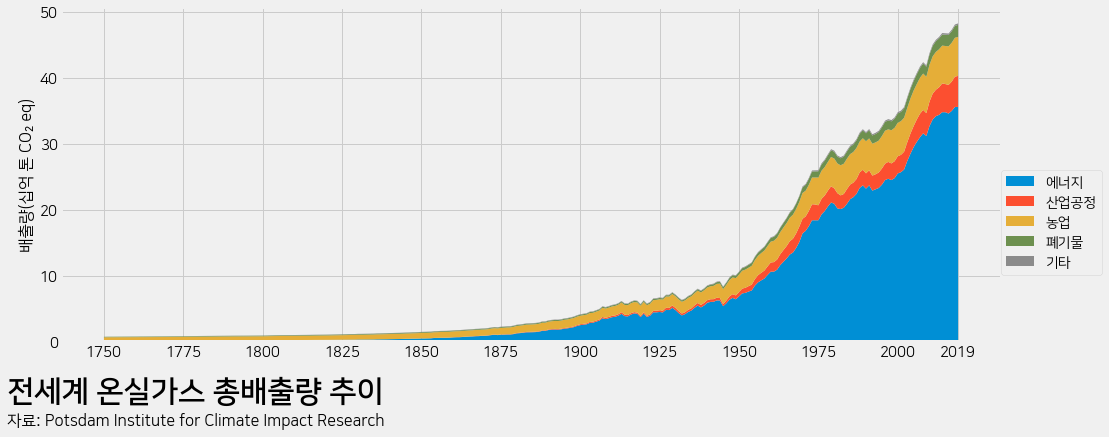

In [3]:
pd.options.plotting.backend = 'matplotlib'

datum1 = pd.read_csv(base_path + 'Intro_data/HISTCR_EARTH_KYOTOGHGAR4_Mt.csv')

# scale 조정
for col in datum1.columns.difference(['year']):
    datum1[col] = datum1[col] * 0.001

plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'NanumSquare' # plt 한글 폰트 적용
fig, ax = plt.subplots(nrows=2, figsize=(15,7), gridspec_kw={'height_ratios':[9,1]})
ax[0].stackplot(datum1['year'], datum1[['IPC1','IPC2','IPCMAG','IPC4','IPC5']].T, labels=['에너지','산업공정','농업','폐기물','기타'])
ax[0].legend(loc = (1, 0.2))
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].xaxis.set_major_locator(ticker.FixedLocator([1750, 1775, 1800, 1825, 1850, 1875, 1900, 1925, 1950, 1975, 2000, 2019])) # FixedLocator
ax[1].axis('off')
fig.text(0.03, 0.1, '전세계 온실가스 총배출량 추이', fontdict={'fontsize':30, 'fontweight':'bold'})
fig.text(0.03, 0.05, '자료: Potsdam Institute for Climate Impact Research', fontdict={'fontsize':16})
ax[0].set_ylabel('배출량(십억 톤 CO₂ eq)', fontdict={'fontsize':16})
plt.show()

- 1950년대를 시작으로 하여, 온실가스의 총배출량이 추이가 급격하게 상승하는 것을 볼 수 있습니다.
- 이는 온실가스 관측기술의 발달로 인한 정확한 측정이 가능해진 점과 굴뚝산업이 전세계적으로 고도화되기 시작하면서 생긴 현상이라고 보여집니다.

## Fig 2_1. 전세계 온실가스 비중

- 자료: [US EPA, Climate Change Indicators: Global Greenhouse Gas Emissions](https://www.epa.gov/climate-indicators/climate-change-indicators-global-greenhouse-gas-emissions)

In [4]:
pd.options.plotting.backend = 'plotly'

datum2_1 = pd.read_csv(base_path + 'Intro_data/global-ghg-emissions_fig-1.csv', header=6)

trace1 = go.Bar(x=datum2_1['Year'], y=datum2_1['Carbon dioxide'], name='$CO_{2}$')
trace2 = go.Bar(x=datum2_1['Year'], y=datum2_1['Methane'], name='$CH_{4}$')
trace3 = go.Bar(x=datum2_1['Year'], y=datum2_1['Nitrous oxide'], name='$N_{2}O$')
trace4 = go.Bar(x=datum2_1['Year'], y=datum2_1['HFCs, PFCs, and SF6'], name='$SF_{6}$')
list_trace = [trace1, trace2, trace3, trace4]
layout = go.Layout(title='<b>전세계 온실가스 비중</b>',xaxis_title='<b>년도</b>', yaxis_title='<b>배출량</b>', legend_title='<b>가스 종류</b>', 
                   barmode='stack', margin=dict(l=20, r=20, t=60, b=60), template='ggplot2')
fig = go.Figure(data=list_trace, layout=layout)
fig.add_annotation(dict(font=dict(size=15), x=0, y=-0.14, showarrow=False, text='<b>자료: WRI (World Resources Institute), US EPA</b>', xref='paper', yref='paper'))
fig.show()

## Fig 2_2. 전세계 온실가스 비중(기준: 2015년)

- 자료: [US EPA, Climate Change Indicators: Global Greenhouse Gas Emissions](https://www.epa.gov/climate-indicators/climate-change-indicators-global-greenhouse-gas-emissions)

<Figure size 720x1080 with 0 Axes>

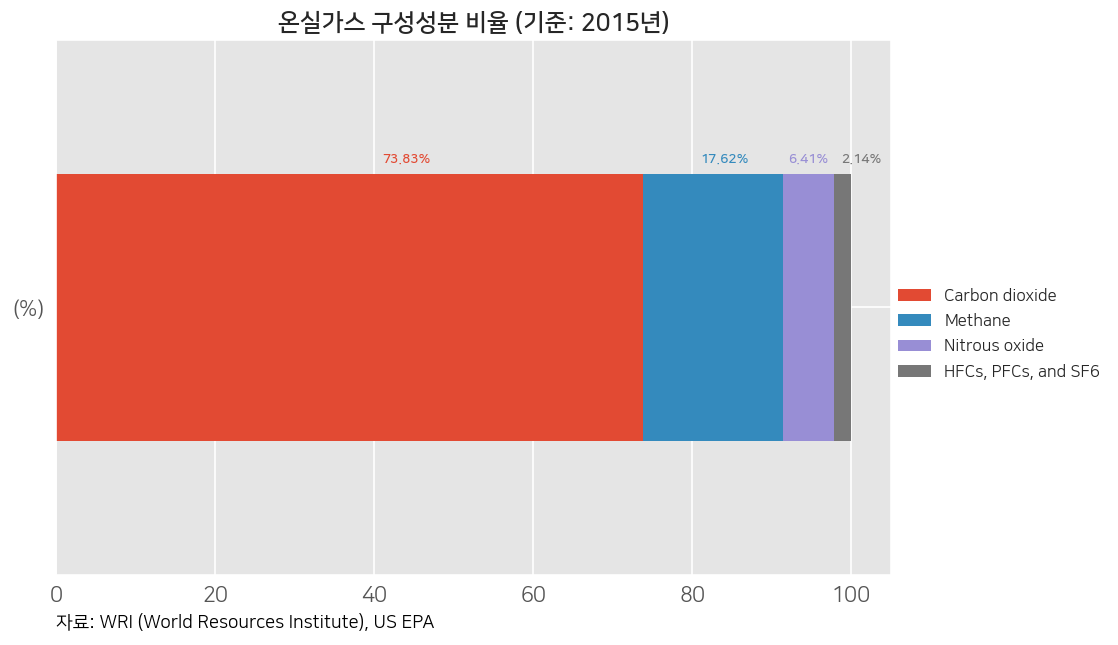

In [45]:
pd.options.plotting.backend = 'matplotlib'

datum2_2 = pd.read_csv(base_path + 'Intro_data/global-ghg-emissions_percent.csv')
datum2_2.index = ['(%)']

plt.rcParams['figure.dpi'] = 120
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'NanumSquare'
plt.figure(figsize=(6,9))
datum2_2.plot.barh(stacked=True)
plt.title('온실가스 구성성분 비율 (기준: 2015년)', fontdict={'fontweight':'bold'})
plt.text(41, 0.27, f'{datum2_2["Carbon dioxide"][0]:.2f}%', fontdict={'fontsize':8, 'fontweight':'bold', 'color':'#E24A33'})
plt.text(81, 0.27, f'{datum2_2["Methane"][0]:.2f}%', fontdict={'fontsize':8, 'fontweight':'bold', 'color':'#348ABD'})
plt.text(92, 0.27, f'{datum2_2["Nitrous oxide"][0]:.2f}%', fontdict={'fontsize':8, 'fontweight':'bold', 'color':'#988ED5'})
plt.text(98.7, 0.27, f'{datum2_2["HFCs, PFCs, and SF6"][0]:.2f}%', fontdict={'fontsize':8, 'fontweight':'bold', 'color':'#777777'})
plt.legend(loc = (1, 0.35))
plt.text(0, -0.6, '자료: WRI (World Resources Institute), US EPA', fontdict={'family': 'NanumSquare','fontsize':11, 'color':'k'})
plt.show()

- 전세계 온실가스에서 이산화탄소($CO_{2}$, Carbon dioxide)가 차지하는 비중은 2015년 기준으로 **약 73%**로 대부분을 차지하고 있습니다.
- 이산화탄소가 **온실가스 문제의 상당한 비중**을 가지고 있기에, 탄소중립이 기후온난화의 주요 해결책으로 보여집니다.

## Fig 3 - 세계의 이산화탄소 배출량 (단위:kiloton)

자료 : [세계은행](https://data.worldbank.org/indicator/EN.ATM.CO2E.KT?contextual=default&end=2018&start=1990&type=points&view=chart&year=2018) 

In [6]:
pd.options.plotting.backend = 'plotly'

# source : https://data.worldbank.org/indicator/EN.ATM.CO2E.KT?contextual=default&end=2018&start=1990&type=points&view=chart&year=2018

# ---- 데이터 프레임 불러오기 및 전처리 ----
co2Emmision = pd.read_excel(base_path+'CCUS_data/[CCUS]VisualizationDataCollection.xlsx', sheet_name=0, skiprows=4)
co2Emmision = co2Emmision.drop(co2Emmision.iloc[:,4:34], axis=1)
co2Emmision = co2Emmision.drop(co2Emmision.iloc[:,-3:], axis=1)
co2Emmision = co2Emmision.dropna(how='any')
co2Emmision = co2Emmision.reset_index(drop=True) # 238 rows × 34 columns

# 함의가 상대적으로 떨어지거나 중복되는 데이터가 많아서 특정 나라를 선정하여 처리.
selected = co2Emmision.iloc[[32,36,55,57,58,59,67,71,74,106,113,153,162,173,180,213, 232],:].reset_index(drop=True)
list_kr = ['캐나다','중국','동남아시아&태평양(선진국 제외)', '동남아시아&태평양', '유럽&중앙 아시아(선진국 제외)', '유럽&중앙 아시아', '유럽 연합(EU)', '프랑스', '영국', '일본', '한국', '북미', 'OECD가입 국가들', '북한', '러시아 연방', '중동&북아프리카(국제 개발 협회(IDA)와 국제 부흥 개발 은행(IBRD) 국가들)', '전세계']
selected['Country Name'] = list_kr

# ---- 시각화 ----
# Figure Create
fig2 = go.Figure()

# year_list create
year_list = list(selected.iloc[:,4:].columns.astype(int)) # len = 29

# Plots 
for i in range(len(selected)-1):
    fig2.add_trace(go.Scatter(x=year_list, 
                              y=selected.iloc[i:i+1,4:].value_counts().index[0],
                              name=f'{selected.iloc[i:i+1].value_counts().index[0][0]}',
                              mode='lines', 
                              ))
fig2.add_trace(go.Scatter(x=year_list, 
                          y=selected.iloc[16:17,4:].value_counts().index[0],
                          name=f'{selected.iloc[16:17].value_counts().index[0][0]}',
                          # mode='lines', 
                          line=dict(width=4),
                          ))
fig2.update_traces(hoverinfo='x+name')
fig2.update_layout(title='<b>전세계 및 여러 나라의 이산화탄소 배출량 (1990-2018)</b>  단위: kt (kiloton)',
                   xaxis_title='<b>년도</b>',
                   yaxis_title='<b>배출량</b>')
fig2.show()
# 범례의 나라 이름 클릭 시, 선 그래프에서 보여지거나 숨겨지거나 가능

- 위에서 봤던 그래프처럼 이산화탄소 배출량 또한 온실가스 배출량 추세처럼 우상향하고 있습니다.

## Fig 4. 산업화 이전 시기와 비교한 전세계 지표면 온도 추세

자료: [Annual global mean temperature difference from pre-industrial conditions](https://climate.metoffice.cloud/temperature.html#datasets)

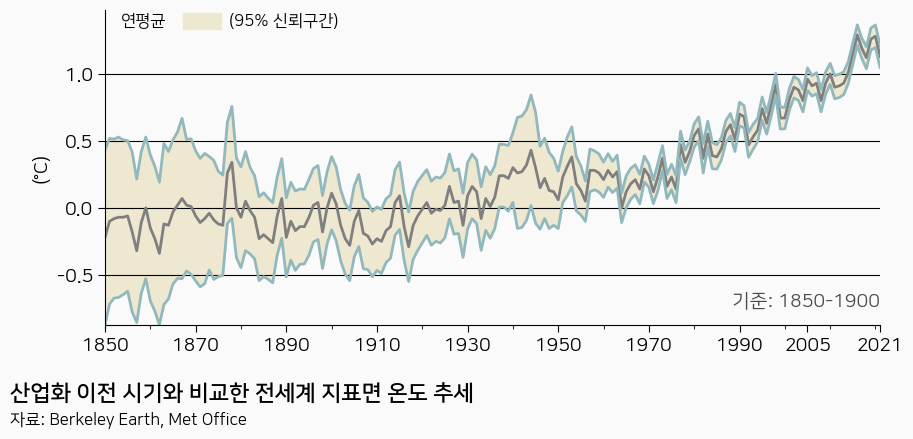

In [7]:
pd.options.plotting.backend = 'matplotlib'

datum3 = pd.read_csv(base_path + 'Intro_data/gmt_Berkeley Earth.csv')
# Columns rename
cols_0 = datum3.columns
cols_1 = ['year','mean','ci']
datum3 = datum3.rename(columns=dict(zip(cols_0, cols_1)))
# 오차범위 설정
datum3['sup'] = datum3['mean'] + datum3['ci']
datum3['inf'] = datum3['mean'] - datum3['ci']

# Graph
plt.style.use('default')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'NanumSquare'
plt.rcParams['axes.unicode_minus'] = False
fig, axs = plt.subplots(nrows=2, figsize=(10,5), gridspec_kw={'height_ratios':[9,1]})
axs[0].grid(axis = 'y', c='k')
fig.set_facecolor('#fafafa')
axs[0].set_facecolor('#fafafa')
axs[0].fill_between(datum3['year'], datum3['sup'], datum3['inf'], fc='#efe8d1')
axs[0].plot(datum3['year'], datum3['mean'], c='C7', lw=2)
axs[0].plot(datum3['year'], datum3['sup'], c='#91b8bd', lw=2)
axs[0].plot(datum3['year'], datum3['inf'], c='#91b8bd', lw=2)

axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

axs[0].set_xticks([1850, 1870, 1890, 1910, 1930, 1950, 1970, 1990, 2005, 2021])
axs[0].xaxis.set_minor_locator(ticker.MultipleLocator(10))
axs[0].tick_params(axis='both', which='major', length=5, color='k', labelsize=14, labelcolor='k')
axs[0].tick_params(which='minor', length=3, color='k')

axs[0].set_ylabel('(°C)', fontdict={'fontsize':14, 'color':'k'})
axs[0].set_xlim(datum3['year'].min(), datum3['year'].max()) # 연도 설정된 전체 범위
axs[0].set_ylim(datum3['inf'].min(),) # 오차범위의 최솟값을 y축 하한으로 지정

Rectangle = patches.Rectangle((0.10, 0.94), 0.05, 0.05, color='#efe8d1', transform=axs[0].transAxes)
axs[0].add_patch(Rectangle)
axs[0].text(0.02, 0.95, '연평균', fontdict={'family': 'NanumSquare','fontsize':12, 'color':'k'}, transform=axs[0].transAxes)
axs[0].text(0.16, 0.95, '(95% 신뢰구간)', fontdict={'family': 'NanumSquare','fontsize':12, 'color':'k'}, transform=axs[0].transAxes)
axs[0].text(1, 0.06, '기준: 1850-1900', ha='right', transform=axs[0].transAxes, fontdict={'family': 'NanumSquare','fontsize':14, 'color':'#4a4a4a'})
axs[1].axis('off')

fig.text(0.03, 0.1, '산업화 이전 시기와 비교한 전세계 지표면 온도 추세', fontdict={'family': 'NanumSquare', 'fontsize':16, 'fontweight':'bold', 'color':'k'})
fig.text(0.03, 0.05, '자료: Berkeley Earth, Met Office', fontdict={'family': 'NanumSquare','fontsize':12, 'color':'k'})
plt.show()

- 1950년대부터 *Fig 1*의 전세계 온실가스량 증가와 비슷하게 전세계 지표면 온도의 상승추이가 올라가고 있습니다.
- 이는 **온실가스 증가와 기온 상승 간의 상관관계가 있음**을 의미합니다.
- 1950년대에 지구온난화가 가속화된 이유는 제2차 세계대전(1939~1945년) 이후 전쟁의 상흔을 씻어내고 전세계적인 경제 성장했기 때문으로 보여집니다.

## Fig 5. 전세계 평균 해수면 상승

자료: [US NPA](https://www.epa.gov/climate-indicators/climate-change-indicators-sea-level)

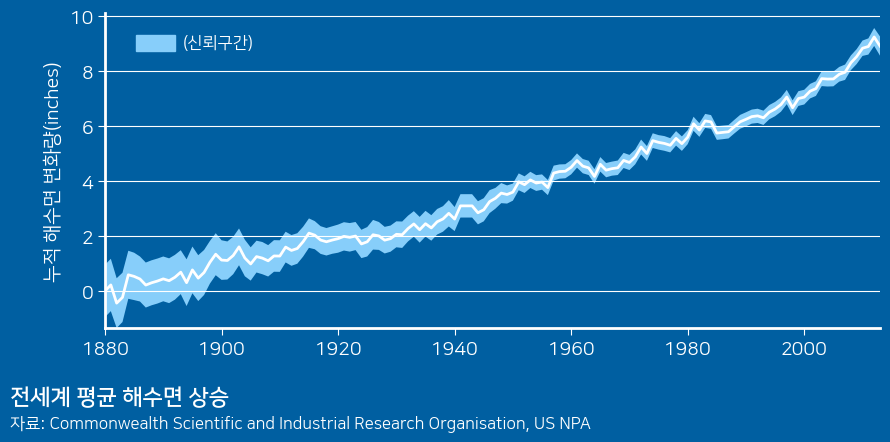

In [8]:
pd.options.plotting.backend = 'matplotlib'

datum4 = pd.read_csv(base_path + 'Intro_data/sea-level_fig-1.csv', header=6)
# Columns rename
cols_0 = datum4.columns
cols_1 = ['year','mean','lower','upper']
datum4 = datum4.rename(columns=dict(zip(cols_0, cols_1)))

# Graph
plt.style.use('default')
plt.rcParams['font.family'] = 'NanumSquare'
fig, axs = plt.subplots(nrows=2, figsize=(10,5), gridspec_kw={'height_ratios':[9,1]})
axs[0].grid(axis = 'y', c='w')
fig.set_facecolor('#005FA1')
axs[0].set_facecolor('#005FA1')
axs[0].fill_between(datum4['year'], datum4['lower'], datum4['upper'], fc='lightskyblue')
axs[0].plot(datum4['year'], datum4['mean'], c='w', lw=2)

axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].spines['left'].set_linewidth(2)
axs[0].spines['left'].set_color('w')
axs[0].spines['bottom'].set_linewidth(2)
axs[0].spines['bottom'].set_color('w')

axs[0].tick_params(axis='both', which='major', length=5, color='w', labelsize=14, labelcolor='w')
axs[0].tick_params(which='minor', length=3, color='tab:olive')

axs[0].set_ylabel('누적 해수면 변화량(inches)', fontdict={'fontsize':14, 'color':'w'})
axs[0].set_xlim(datum4['year'].min(), datum4['year'].max()) # 연도 설정된 전체 범위
axs[0].set_ylim(datum4['lower'].min(),) # 신뢰하한의 최솟값을 y축 하한으로 지정

Rectangle = patches.Rectangle((0.04, 0.88), 0.05, 0.05, color='lightskyblue', transform=axs[0].transAxes)
axs[0].add_patch(Rectangle)
axs[0].text(0.1, 0.89, '(신뢰구간)', fontdict={'family': 'NanumSquare','fontsize':12, 'color':'w'}, transform=axs[0].transAxes)
axs[1].axis('off')

fig.text(0.03, 0.1, '전세계 평균 해수면 상승', fontdict={'family': 'NanumSquare', 'fontsize':16, 'fontweight':'bold', 'color':'w'})
fig.text(0.03, 0.05, '자료: Commonwealth Scientific and Industrial Research Organisation, US NPA', fontdict={'family': 'NanumSquare','fontsize':12, 'color':'w'})
plt.show()

- 물질의 온도가 높아지게 되면 분자의 운동이 활발해져, 분자와 분자의 사이의 간격이 멀어지게 됩니다. 이는 물질의 팽창으로 이어지게 됩니다.
- 지구의 해양 또한 위와 같은 과정을 겪고 있습니다. 지구 온도의 상승이 바닷물의 팽창 즉, 해수면의 상승으로 이어지는 것입니다.

## Fig 6:. 국내 온실가스 배출량 추세

<b>자료</b><br>
- [2021년 국가 온실가스 인벤토리(1990-2019)공표(환경부)](http://www.gir.go.kr/home/board/read.do?pagerOffset=0&maxPageItems=10&maxIndexPages=10&searchKey=&searchValue=&menuId=36&boardId=54&boardMasterId=2&boardCategoryId=)
- [2021년 국가 온실가스 배출량, 6억 7,960만톤 예상(환경부)](http://me.go.kr/home/web/board/read.do?boardMasterId=1&boardId=1533570&menuId=10525)

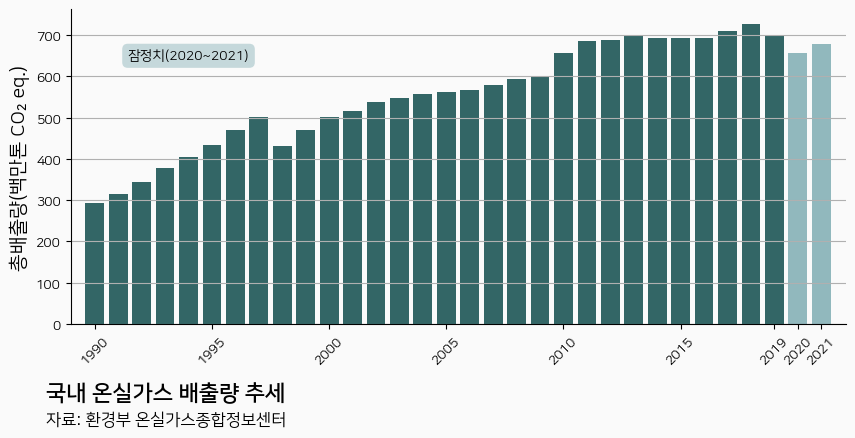

In [9]:
pd.options.plotting.backend = 'matplotlib'

datum5 = pd.read_excel(base_path + 'Intro_data/국가 온실가스 인벤토리(1990_2019) 공표.xlsx', sheet_name=7, header=2, index_col=0)[:1].transpose()
datum5.reset_index(inplace=True)
datum5.rename(columns = {'index':'year','총배출량(백만톤 CO2eq.)':'gas'},inplace=True)
datum5.columns.name = None
# 2020년, 2021년 잠정치 자료 추가
estimate = pd.DataFrame({'year' : [2020, 2021], 'gas' : [656.6, 679.6]})
datum5 = pd.concat([datum5, estimate], ignore_index = True)

# Graph
plt.rcParams['font.family'] = 'NanumSquare'
fig, ax = plt.subplots(nrows=2, figsize=(10,5), gridspec_kw={'height_ratios':[9,1]})
color_map = ['#336666' for _ in range(32)]
color_map[30] = color_map[31] = '#91b8bd' # 잠정치 색상 구별
ax[0].bar(datum5['year'], datum5['gas'], color=color_map)
ax[0].grid(axis='y')
fig.set_facecolor('#fafafa')
ax[0].set_facecolor('#fafafa')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].margins(x=0.02)

ax[0].xaxis.set_major_locator(ticker.FixedLocator([1990, 1995, 2000, 2005, 2010, 2015, 2019, 2020, 2021]))
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylabel('총배출량(백만톤 CO₂ eq.)', fontdict={'fontsize':14})
ax[0].annotate('잠정치(2020~2021)', 
            xy=(1994, 650),
            va = 'center', ha='center', 
            bbox=dict(boxstyle='round', pad=0.4, alpha=0.5, facecolor='#91b8bd', linewidth=0))
fig.text(0.1, 0.10, '국내 온실가스 배출량 추세', fontdict={'fontsize':16, 'fontweight':'bold'})
fig.text(0.1, 0.05, '자료: 환경부 온실가스종합정보센터', fontdict={'fontsize':12})
ax[1].axis('off')
plt.show()

- 국내 또한 전세계 추이와 마찬가지로 온실가스 배출량이 증가하고 있는 추세입니다.
- 이는 우리나라도 전세계와 보조를 맞추어 온실가스 절감 정책을 본격적으로 시행해야 함을 의미합니다.

## Fig 7. 한반도 기온 추세: 1912년부터 2021년까지 서울, 부산, 인천, 강릉, 대구, 목포의 평균 기온 추세

- 자료: [기상청 국가기후데이터센터](https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70)

In [10]:
pd.options.plotting.backend = 'plotly'

for num, place in enumerate(['seoul','busan','incheon','gangneung','daegu','mokpo']):
    globals()['datum6_'+str(num)] = pd.read_csv(base_path + f'Intro_data/{place}_temp.csv', encoding='cp949')
trace1=go.Scatter(x = datum6_0['년'], y = datum6_0['평균기온(℃)'], name = '서울', mode = 'lines')
trace2=go.Scatter(x = datum6_1['년'], y = datum6_1['평균기온(℃)'], name = '부산', mode = 'lines')
trace3=go.Scatter(x = datum6_2['년'], y = datum6_2['평균기온(℃)'], name = '인천', mode = 'lines')
trace4=go.Scatter(x = datum6_3['년'], y = datum6_3['평균기온(℃)'], name = '강릉', mode = 'lines')
trace5=go.Scatter(x = datum6_4['년'], y = datum6_4['평균기온(℃)'], name = '대구', mode = 'lines')
trace6=go.Scatter(x = datum6_5['년'], y = datum6_5['평균기온(℃)'], name = '목포', mode = 'lines')

list_trace = [trace1, trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(title='<b>대한한국 도시 기온 추세</b>',xaxis_title='<b>년도</b>', yaxis_title='<b>평균기온(℃)</b>', legend_title='<b>도시명</b>', margin=dict(l=20, r=20, t=60, b=60), template='ggplot2')
fig = go.Figure(data=list_trace, layout=layout)
fig.add_annotation(dict(font=dict(size=15), x=0, y=-0.14, showarrow=False, text='<b>자료: 기상청 국가기후데이터센터</b>', xref='paper', yref='paper'))
fig.show()

- 한국전쟁의 여파로 1950년에서 1953년 일부 자료가 결측되었습니다.
- 1912년에 관측이 가능했던 국내 6개 도시의 연평균온도 약 11.8℃ 시작해 2021년 기준 14.5℃까지 상승하는 모습(2.7℃ 상승)을 볼 수 있습니다.

## Fig 8. 분야별 온실가스 배출량

- 자료: [환경부 온실가스종합정보센터](http://me.go.kr/home/web/board/read.do?boardMasterId=1&boardId=1533570&menuId=10525)

<Figure size 630x945 with 0 Axes>

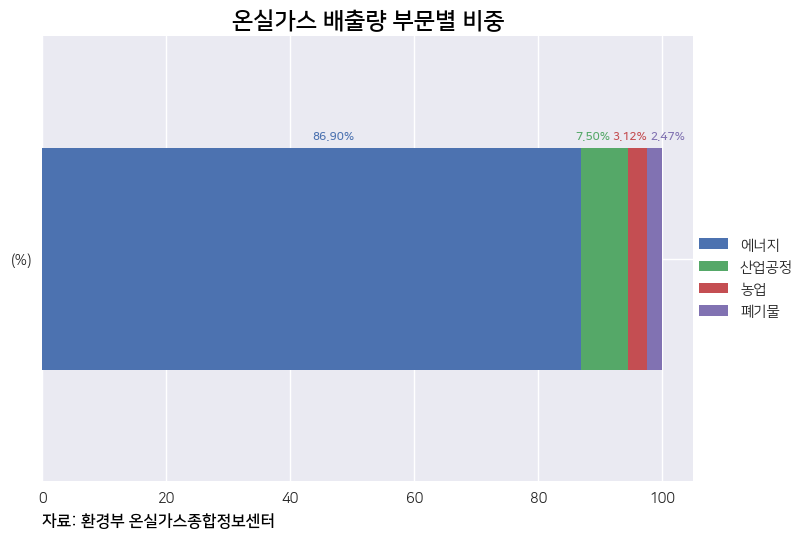

In [11]:
pd.options.plotting.backend = 'matplotlib'

datum7 = pd.read_csv(base_path + 'Intro_data/21_ghg_ratio.csv', encoding='cp949')
datum7.index = ['(%)']
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 105
plt.rcParams['font.family'] = 'NanumSquare'
plt.figure(figsize=(6,9))
datum7.plot.barh(stacked=True)
plt.text(43.5, 0.27, f'{datum7["에너지"][0]:.2f}%', fontsize=8, fontweight='bold', c='#4C72B0')
plt.text(86, 0.27, f'{datum7["산업공정"][0]:.2f}%', fontsize=8, fontweight='bold', c='#55A868')
plt.text(92, 0.27, f'{datum7["농업"][0]:.2f}%', fontsize=8, fontweight='bold',c='#C44E52')
plt.text(98, 0.27, f'{datum7["폐기물"][0]:.2f}%', fontsize=8, fontweight='bold', c='#8172B2')
plt.title('온실가스 배출량 부문별 비중', fontdict={'fontsize':16,'fontweight':'bold', 'color':'k'})
plt.legend(loc = (1, 0.35))
plt.text(0, -0.6, '자료: 환경부 온실가스종합정보센터', fontdict={'family': 'NanumSquare','fontweight':'bold','fontsize':11, 'color':'k'})
plt.show()

- 국내 온실가스 부문별 비중을 보면 에너지 발전 부문이 86.9%로 과반 이상의 비중을 차지함을 알 수 있습니다.
- 이는 **에너지 생산 과정에서 탄소를 흡수하는 'CCUS 기술'과 생산된 전기에너지를 효율적으로 사용하는 '스마트그리드 기술'의 중요성을 보여줍니다.**

# **CCUS**

## CCUS란? <br>
: 이산화탄소가 생산되는 근원지에서부터 공기 중으로 방출되는 것을 막고(Carbon Capture) 필요한 곳에서 사용(Utilization)하거나 지하에 저장(Storage) 하는 기술

자료: 대한민국 정책브리핑

## Fig 9. 전세계 탄소배출권거래 시장 현황
자료 : [중소기업기술정보진흥원](http://smroadmap.smtech.go.kr/) - 중소기업 전략기술로드맵 2022-2024 CCUS

In [12]:
# ---- 데이터 프레임 불러오기 및 전처리 ----
# df1 - source : 22_CCUS_220218.pdf / 21p -> 탄소배출권 거래 현황
df1 = pd.read_excel(base_path+'CCUS_data/[CCUS]VisualizationDataCollection.xlsx', sheet_name=1, skiprows=2)
df1.rename(columns = {'Unnamed: 0' : '나라', '2018(A)' : '거래량 (2018)', '2020(B)': '거래량 (2020)', 
                      'B/A': '거래량(B)/(A)', '2018(A).1': '금액 (2018)', '2020(B).1': '금액 (2020)', 
                      'B/A.1' : '금액(B)/(A)'}, inplace = True)
# 거래량 : Volume / 금액 : Amount (단위 : 1억 톤 CO2e, 십억 유로)
df1 = df1.drop(columns=['거래량(B)/(A)','금액(B)/(A)'])

# ---- 시각화 ----
# plotting with plotly
pd.options.plotting.backend = 'plotly'

fig1 = ff.create_table(df1, height_constant=80,)

# Add graph data
countries = df1['나라']
amnt2018 = df1['거래량 (2018)']
amnt2020 = df1['거래량 (2020)']
vol2018 = df1['금액 (2018)']
vol2020 = df1['금액 (2020)']

# Make traces for graph
trace1 = go.Bar(x=countries, y=amnt2018, xaxis='x2', yaxis='y2',
                marker=dict(color='#0099ff'),
                name='거래량 (2018)')
trace2 = go.Bar(x=countries, y=amnt2020, xaxis='x2', yaxis='y2',
                marker=dict(color='#404040'),
                name='거래량 (2020)')
trace3 = go.Bar(x=countries, y=vol2018, xaxis='x2', yaxis='y2',
                marker=dict(color='#0c770a'),
                name='금액 (2018)')
trace4 = go.Bar(x=countries, y=vol2020, xaxis='x2', yaxis='y2',
                marker=dict(color='#6b6b6b'),
                name='금액 (2020)')

# Add trace data to fig1ure
fig1.add_traces([trace1, trace2, trace3, trace4])

# initialize xaxis2 and yaxis2
fig1['layout']['xaxis2'] = {}
fig1['layout']['yaxis2'] = {}

# Edit layout for subplots
fig1.layout.yaxis.update({'domain': [0, .45]})
fig1.layout.yaxis2.update({'domain': [.6, 1]})

# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig1.layout.yaxis2.update({'anchor': 'x2'})
fig1.layout.xaxis2.update({'anchor': 'y2'})
fig1.layout.yaxis2.update({'title': '<b>거래량과 금액</b>'})
# 'text' : '<b>자료 : 중소기업벤처부 - 통합보고서[중소기업 전략기술로드맵 2022-2024 CCUS](22_CCUS_220218.pdf)</b>', 'textposition':'bottom center'
# Update the margins to add a title and see graph x-labels.
fig1.update_layout(margin=dict(l=20, r=20, t=80, b=60))
fig1.layout.update({'title': '<b>전세계 탄소배출권거래 시장 거래량과 금액 2018 & 2020</b>  (단위 : 1억 톤 CO2e, 십억 유로)'})
# fig.add_annotation(dict(font=dict(size=15), x=5, y=1, showarrow=False, text='<b>자료 : 중소기업벤처부 - 통합보고서[중소기업 전략기술로드맵 2022-2024 CCUS](22_CCUS_220218.pdf)</b>', textangle=0, xanchor='left', xref='paper', yref='paper'))

# Plot!
fig1.show()

- 탄소배출권 시장 규모는 시계열적으로 커지는 구조입니다.
- 선진국을 중심으로 환경규제가 강화되고 있으며, 이로 인해 탄소 포집에 대한 관심 또한 증가했음을 암시합니다.

## Fig 10. IEA 지속가능발전시나리오의 분야별 CCUS 기여도
자료 : [한국에너지기술연구원 - CCUS 심층 투자 분석 보고서](https://www.kier.re.kr/UploadFiles/tpp/energy/16366126893490.pdf)

In [13]:
# ---- 데이터 프레임 불러오기 및 전처리 ----
df_IEA = pd.read_excel(base_path+'CCUS_data/[CCUS]VisualizationDataCollection.xlsx', sheet_name=2)
col_kr = ['철강업', '연료 전환', '시멘트', '발전', '화학']
df_IEA.columns = col_kr
# 백분율로 변환
for i in range(len(df_IEA.columns)):
    df_IEA.iloc[0,i] = df_IEA.iloc[0,i] * 100
df_IEA = df_IEA.astype(int)
# df_IEA
col_list = list(df_IEA.columns)
val_list = list(df_IEA.iloc[0,:].values)

# plotting with plotly
pd.options.plotting.backend = 'plotly'

# ---- 시각화 ----

# IEA 지속가능발전시나리오의 분야별 CCUS 기여도 - Bar chart
col_list = list(df_IEA.columns)
val_list = list(df_IEA.iloc[0,:].values)

colors = ['lightslategray',] * 5
colors[1] = 'crimson'

fig_IEA = go.Figure(go.Bar(
    x=val_list,
    y=col_list,
    orientation='h',
    text=val_list,
    textposition='outside',
    marker_color=colors,
    ))

fig_IEA.update_traces(texttemplate='%{text:.} %', textposition='outside')
fig_IEA.update_layout(
    title_text='<b>IEA 지속 가능 발전 시나리오의 CCUS 분야별 기여도</b>', 
    barmode='stack'
)

# source annotation
annotations = []
annotations.append(dict(xref='paper', yref='paper',
                        x=-.01, y=-.15,
                        text='<b>자료 : IEA, 한국에너지기술연구원 CCUS 심층 투자 분석 보고서</b>',
                        font=dict(size=15),
                        showarrow=False))

fig_IEA.update_layout(annotations=annotations)
fig_IEA.show()

- IEA 시나리오 기반 하에, 연료전환에서 CCUS 기술의 기여도는 90%입니다. 
- 이는 현재 석탄이나 산업공정을 중심으로 적용되고 있는 CCUS 기술의 적용범위가 바이오매스, 직접 공기포집 등 다양한 분야로 확대될 전망으로 해석할 수 있습니다.

## Fig 11. CCUS 세부분야별 세계 시장규모 및 전망 (단위 : 백만 달러)
자료 : MarketsandMarkets(2020) 및 윕스 재가공 - [중소기업기술정보진흥원 중소기업 전략기술로드맵 2022-2024 CCUS](http://smroadmap.smtech.go.kr/)

In [14]:
# ---- 데이터 프레임 불러오기 및 데이터 전처리 ----
df_2 = pd.read_excel(base_path+'CCUS_data/[CCUS]VisualizationDataCollection.xlsx', sheet_name=3,skiprows=3)
df_2 = df_2.drop(columns='CAGR')

# ---- 시각화 ----

# plotting with plotly
pd.options.plotting.backend = 'plotly'

# Plot
fig_df2 = go.Figure()
for i in range(len(df_2)):
    fig_df2.add_trace(go.Scatter(
        x=df_2.iloc[:,1:].columns, y=df_2.iloc[i,1:], 
        mode='lines', name=f'{df_2.iloc[i,0]}'),)

# source annotation
annotations = []
annotations.append(dict(xref='paper', yref='paper',
                        x=-.085, y=-.2,
                        text='<b>     자료 : MarketsandMarkets(2020) 및 윕스 재가공 - 중소기업기술정보진흥원 중소기업 전략기술로드맵 2022-2024 CCUS</b>',
                        font=dict(size=15),
                        showarrow=False))

fig_df2.update_layout(title='<b>[CCUS 세부분야별 세계 시장규모 및 전망]</b>  (단위 : 백만 달러)',
                   xaxis_title='<b>년도</b>',
                   yaxis_title='<b>금액</b>',
                   annotations=annotations,
                   )

fig_df2.show()

- 2019년 기준으로 북미 지역이 75%로 가장 높은 점유율을 차지하였으며, 유럽이 가파른 성장전망세를 보이고 있습니다.
- 선진국에서 환경에 대한 관심도가 높아지고 있고 이는 탄소포집 기술의 시장규모를 키우고 있음을 암시합니다.

## Fig 12_1. 국내 온실가스 감축 부문 종사자 수
자료 : [국가통계포털 KOSIS](https://kosis.kr/statHtml/statHtml.do?orgId=442&tblId=DT_21_01&conn_path=I2)



In [15]:

# ---- 데이터 프레임 불러오기 -----

# 매출액
sales_1218 = pd.read_excel(base_path+'CCUS_data/KOSIS/기후기술_부문별·기업규모별_매출액_현황_20220702170807.xlsx', sheet_name=0)
sales_1920 = pd.read_excel(base_path+'CCUS_data/KOSIS/기후기술_영역별_기관규모별_매출액_20220702170845.xlsx', sheet_name=0)
# 연구원 수의 경우 KOSIS에서 2019~2020 뿐이라서 종사자 수로 처리
worker_1218 = pd.read_excel(base_path+'CCUS_data/KOSIS/기후기술_부문별·기업규모별_종사자수_현황_20220702170829.xlsx', sheet_name=0)
worker_1920 = pd.read_excel(base_path+'CCUS_data/KOSIS/기후기술_영역별_기관규모별_종사자_수_20220702170939.xlsx', sheet_name=0)
# 연구개발비
costs_1218 = pd.read_excel(base_path+'CCUS_data/KOSIS/기후기술_부문별·기업규모별_연구개발비_현황_20220702170752.xlsx', sheet_name=0)
costs_1920 = pd.read_excel(base_path+'CCUS_data/KOSIS/기후기술_영역별_기관규모별_연구개발비_20220702170913.xlsx', sheet_name=0)
# ---- 데이터 전처리 : 종사자 ----

# Column 정리 - 19~20년도---
worker_1920['2019년'] = worker_1920['2019 p)']
worker_1920['2019.대기업'] = worker_1920['2019 p).4'] # 대기업
worker_1920['2019.중견기업'] = worker_1920['2019 p).3'] # 중견기업
worker_1920['2019.중소기업'] = worker_1920['2019 p).1'] + worker_1920['2019 p).2'] # 중소기업
worker_1920['2019.연구소 등 비영리기관'] = worker_1920['2019 p).5'] # 연구소 등 비영리기관
worker_1920['2020년'] = worker_1920['2020'].copy()
worker_1920['2020.대기업'] = worker_1920['2020.5'] # 대기업
worker_1920['2020.중견기업'] = worker_1920['2020.3'] + worker_1920['2020.4'] # 중견기업
worker_1920['2020.중소기업'] = worker_1920['2020.1'] + worker_1920['2020.2'] # 중소기업
worker_1920['2020.연구소 등 비영리기관'] = worker_1920['2020.6'] # 연구소 등 비영리기관

# ordering columns
worker_1920 = worker_1920.loc[:,['기후기술분류별(1)', '기후기술분류별(2)', '2019 p)', '2019 p).1', '2019 p).2', '2019 p).3', '2019 p).4', '2019 p).5', '2020.5', '2020.6', 
                               '2019년', '2019.대기업', '2019.중견기업', '2019.중소기업', '2019.연구소 등 비영리기관', '2020년', '2020.대기업', '2020.중견기업', '2020.중소기업', '2020.연구소 등 비영리기관']]
drop_list_sales = list(worker_1920.columns[2:10])
worker_1920.drop(index=0, columns=drop_list_sales, inplace=True)
worker_1920 = worker_1920.reset_index(drop=True)
# --------
# 12~18년도 한꺼번에 정리
row13_sales = pd.DataFrame([
                            ['적응', '예측･모니터링', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                            ['적응', '해양수산연안', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                            ['적응', '건강', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                            ['적응', '산림육상', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                            worker_1218.iloc[13,:],
                            worker_1218.iloc[14,:]
                            ], columns=list(worker_1218.columns), index=[13,14,15,16,17,18])
worker_1218 = worker_1218.append(row13_sales).reset_index(drop=True)
worker_1218 = worker_1218.drop([13,14]).reset_index(drop=True)

worker_1218['2012년'] = worker_1218['2012']
worker_1218['2012.대기업'] = worker_1218['2012.1'] # 대기업
worker_1218['2012.중견기업'] = worker_1218['2012.2'] # 중견기업
worker_1218['2012.중소기업'] = worker_1218['2012.3'] # 중소기업
worker_1218['2012.연구소 등 비영리기관'] = worker_1218['2012.4'] # 연구소 등 비영리기관
worker_1218['2013년'] = worker_1218['2013']
worker_1218['2013.대기업'] = worker_1218['2013.1'] # 대기업
worker_1218['2013.중견기업'] = worker_1218['2013.2'] # 중견기업
worker_1218['2013.중소기업'] = worker_1218['2013.3'] # 중소기업
worker_1218['2013.연구소 등 비영리기관'] = worker_1218['2013.4'] # 연구소 등 비영리기관
worker_1218['2014년'] = worker_1218['2014']
worker_1218['2014.대기업'] = worker_1218['2014.1'] # 대기업
worker_1218['2014.중견기업'] = worker_1218['2014.2'] # 중견기업
worker_1218['2014.중소기업'] = worker_1218['2014.3'] # 중소기업
worker_1218['2014.연구소 등 비영리기관'] = worker_1218['2014.4'] # 연구소 등 비영리기관
worker_1218['2015년'] = worker_1218['2015']
worker_1218['2015.대기업'] = worker_1218['2015.1'] # 대기업
worker_1218['2015.중견기업'] = worker_1218['2015.2'] # 중견기업
worker_1218['2015.중소기업'] = worker_1218['2015.3'] # 중소기업
worker_1218['2015.연구소 등 비영리기관'] = worker_1218['2015.4'] # 연구소 등 비영리기관
worker_1218['2016년'] = worker_1218['2016']
worker_1218['2016.대기업'] = worker_1218['2016.1'] # 대기업
worker_1218['2016.중견기업'] = worker_1218['2016.2'] # 중견기업
worker_1218['2016.중소기업'] = worker_1218['2016.3'] # 중소기업
worker_1218['2016.연구소 등 비영리기관'] = worker_1218['2016.4'] # 연구소 등 비영리기관
worker_1218['2017년'] = worker_1218['2017']
worker_1218['2017.대기업'] = worker_1218['2017.1'] # 대기업
worker_1218['2017.중견기업'] = worker_1218['2017.2'] # 중견기업
worker_1218['2017.중소기업'] = worker_1218['2017.3'] # 중소기업
worker_1218['2017.연구소 등 비영리기관'] = worker_1218['2017.4'] # 연구소 등 비영리기관
worker_1218['2018년'] = worker_1218['2018']
worker_1218['2018.대기업'] = worker_1218['2018.1'] # 대기업
worker_1218['2018.중견기업'] = worker_1218['2018.2'] # 중견기업
worker_1218['2018.중소기업'] = worker_1218['2018.3'] # 중소기업
worker_1218['2018.연구소 등 비영리기관'] = worker_1218['2018.4'] # 연구소 등 비영리기관

drop_list_sales2 = worker_1218.iloc[:,2:37]
worker_1218.drop(index=0, columns=drop_list_sales2, inplace=True)
worker_1218 = worker_1218.reset_index(drop=True)
# -------------
worker_1220 = pd.concat([worker_1920.iloc[:,:], worker_1218.iloc[:,2:]], axis=1, sort=False) 
worker_1220 = worker_1220.fillna(0)
worker_1220 = worker_1220.loc[:,['기후기술분류별(1)', '기후기술분류별(2)', '2012년', '2012.대기업', '2012.중견기업', '2012.중소기업', '2012.연구소 등 비영리기관', 
                               '2013년', '2013.대기업', '2013.중견기업', '2013.중소기업', '2013.연구소 등 비영리기관', '2014년', '2014.대기업', '2014.중견기업', '2014.중소기업', '2014.연구소 등 비영리기관', 
                               '2015년', '2015.대기업', '2015.중견기업', '2015.중소기업', '2015.연구소 등 비영리기관', '2016년', '2016.대기업', '2016.중견기업', '2016.중소기업', '2016.연구소 등 비영리기관', 
                               '2017년', '2017.대기업', '2017.중견기업', '2017.중소기업', '2017.연구소 등 비영리기관', '2018년', '2018.대기업', '2018.중견기업', '2018.중소기업', '2018.연구소 등 비영리기관', 
                               '2019년', '2019.대기업', '2019.중견기업', '2019.중소기업', '2019.연구소 등 비영리기관', '2020년', '2020.대기업', '2020.중견기업', '2020.중소기업', '2020.연구소 등 비영리기관', ]]

# 위의 표 중에서 필요한 내용 : 감축 - 비재생에너지, 감축 - 재생에너지, 감축 - 신에너지, 감축 - 에너지저장, 감축 - 송배전&전력IT, 감축 - 에너지수요, 감축 - 온실가스 고정 -> 해당 내용만 뽑아서 시각화 필
worker_visual = worker_1220.iloc[1:9,:].reset_index(drop=True)

# ---- 데이터 전처리 : 매출액 ----
# 매출액sales년

# Column 정리 - 19~20년도---
sales_1920['2019년'] = sales_1920['2019 p)']
sales_1920['2019.대기업'] = sales_1920['2019 p).4'] # 대기업
sales_1920['2019.중견기업'] = sales_1920['2019 p).3'] # 중견기업
sales_1920['2019.중소기업'] = sales_1920['2019 p).1'] + sales_1920['2019 p).2'] # 중소기업
sales_1920['2019.연구소 등 비영리기관'] = sales_1920['2019 p).5'] # 연구소 등 비영리기관
sales_1920['2020년'] = sales_1920['2020'].copy()
sales_1920['2020.대기업'] = sales_1920['2020.5'] # 대기업
sales_1920['2020.중견기업'] = sales_1920['2020.3'] + sales_1920['2020.4'] # 중견기업
sales_1920['2020.중소기업'] = sales_1920['2020.1'] + sales_1920['2020.2'] # 중소기업
sales_1920['2020.연구소 등 비영리기관'] = sales_1920['2020.6'] # 연구소 등 비영리기관

# ordering columns
sales_1920 = sales_1920.loc[:,['기후기술분류별(1)', '기후기술분류별(2)', '2019 p)', '2019 p).1', '2019 p).2', '2019 p).3', '2019 p).4', '2019 p).5', '2020.5', '2020.6', 
                               '2019년', '2019.대기업', '2019.중견기업', '2019.중소기업', '2019.연구소 등 비영리기관', '2020년', '2020.대기업', '2020.중견기업', '2020.중소기업', '2020.연구소 등 비영리기관']]
# 버릴 목록 / len : 24 
drop_list_sales = list(sales_1920.columns[2:10])

# 수정된 표
sales_1920.drop(index=0, columns=drop_list_sales, inplace=True)
sales_1920 = sales_1920.reset_index(drop=True)
# --------
# 12~18년도 정리
row13_sales = pd.DataFrame([
                      ['적응', '예측･모니터링', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      ['적응', '해양수산연안', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      ['적응', '건강', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      ['적응', '산림육상', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                      sales_1218.iloc[13,:],
                      sales_1218.iloc[14,:]
                      ], columns=list(sales_1218.columns), index=[13,14,15,16,17,18])

sales_1218 = sales_1218.append(row13_sales).reset_index(drop=True)

sales_1218 = sales_1218.drop([13,14]).reset_index(drop=True)

sales_1218['2012년'] = sales_1218['2012']
sales_1218['2012.대기업'] = sales_1218['2012.1'] # 대기업
sales_1218['2012.중견기업'] = sales_1218['2012.2'] # 중견기업
sales_1218['2012.중소기업'] = sales_1218['2012.3'] # 중소기업
sales_1218['2012.연구소 등 비영리기관'] = sales_1218['2012.4'] # 연구소 등 비영리기관
sales_1218['2013년'] = sales_1218['2013']
sales_1218['2013.대기업'] = sales_1218['2013.1'] # 대기업
sales_1218['2013.중견기업'] = sales_1218['2013.2'] # 중견기업
sales_1218['2013.중소기업'] = sales_1218['2013.3'] # 중소기업
sales_1218['2013.연구소 등 비영리기관'] = sales_1218['2013.4'] # 연구소 등 비영리기관
sales_1218['2014년'] = sales_1218['2014']
sales_1218['2014.대기업'] = sales_1218['2014.1'] # 대기업
sales_1218['2014.중견기업'] = sales_1218['2014.2'] # 중견기업
sales_1218['2014.중소기업'] = sales_1218['2014.3'] # 중소기업
sales_1218['2014.연구소 등 비영리기관'] = sales_1218['2014.4'] # 연구소 등 비영리기관
sales_1218['2015년'] = sales_1218['2015']
sales_1218['2015.대기업'] = sales_1218['2015.1'] # 대기업
sales_1218['2015.중견기업'] = sales_1218['2015.2'] # 중견기업
sales_1218['2015.중소기업'] = sales_1218['2015.3'] # 중소기업
sales_1218['2015.연구소 등 비영리기관'] = sales_1218['2015.4'] # 연구소 등 비영리기관
sales_1218['2016년'] = sales_1218['2016']
sales_1218['2016.대기업'] = sales_1218['2016.1'] # 대기업
sales_1218['2016.중견기업'] = sales_1218['2016.2'] # 중견기업
sales_1218['2016.중소기업'] = sales_1218['2016.3'] # 중소기업
sales_1218['2016.연구소 등 비영리기관'] = sales_1218['2016.4'] # 연구소 등 비영리기관
sales_1218['2017년'] = sales_1218['2017']
sales_1218['2017.대기업'] = sales_1218['2017.1'] # 대기업
sales_1218['2017.중견기업'] = sales_1218['2017.2'] # 중견기업
sales_1218['2017.중소기업'] = sales_1218['2017.3'] # 중소기업
sales_1218['2017.연구소 등 비영리기관'] = sales_1218['2017.4'] # 연구소 등 비영리기관
sales_1218['2018년'] = sales_1218['2018']
sales_1218['2018.대기업'] = sales_1218['2018.1'] # 대기업
sales_1218['2018.중견기업'] = sales_1218['2018.2'] # 중견기업
sales_1218['2018.중소기업'] = sales_1218['2018.3'] # 중소기업
sales_1218['2018.연구소 등 비영리기관'] = sales_1218['2018.4'] # 연구소 등 비영리기관

drop_list_sales2 = sales_1218.iloc[:,2:37]
sales_1218.drop(index=0, columns=drop_list_sales2, inplace=True)
sales_1218 = sales_1218.reset_index(drop=True)


sales_1220 = pd.concat([sales_1920.iloc[:,:], sales_1218.iloc[:,2:]], axis=1, sort=False) 
sales_1220 = sales_1220.fillna(0)
sales_1220 = sales_1220.loc[:,['기후기술분류별(1)', '기후기술분류별(2)', '2012년', '2012.대기업', '2012.중견기업', '2012.중소기업', '2012.연구소 등 비영리기관', 
                               '2013년', '2013.대기업', '2013.중견기업', '2013.중소기업', '2013.연구소 등 비영리기관', '2014년', '2014.대기업', '2014.중견기업', '2014.중소기업', '2014.연구소 등 비영리기관', 
                               '2015년', '2015.대기업', '2015.중견기업', '2015.중소기업', '2015.연구소 등 비영리기관', '2016년', '2016.대기업', '2016.중견기업', '2016.중소기업', '2016.연구소 등 비영리기관', 
                               '2017년', '2017.대기업', '2017.중견기업', '2017.중소기업', '2017.연구소 등 비영리기관', '2018년', '2018.대기업', '2018.중견기업', '2018.중소기업', '2018.연구소 등 비영리기관', 
                               '2019년', '2019.대기업', '2019.중견기업', '2019.중소기업', '2019.연구소 등 비영리기관', '2020년', '2020.대기업', '2020.중견기업', '2020.중소기업', '2020.연구소 등 비영리기관', ]]


# 위의 표 중에서 필요한 내용 : 감축 - 비재생에너지, 감축 - 재생에너지, 감축 - 신에너지, 감축 - 에너지저장, 감축 - 송배전&전력IT, 감축 - 에너지수요, 감축 - 온실가스 고정 -> 해당 내용만 뽑아서 시각화 필요
sales_visual = sales_1220.iloc[1:9,:].reset_index(drop=True)

# ---- 데이터 전처리 : 연구개발비 ----
# 한 번에 처리하기 - 연구개발비costs_년도

# Column 정리 - 19~20년도---
costs_1920['2019년'] = costs_1920['2019 p)']
costs_1920['2019.대기업'] = costs_1920['2019 p).4'] # 대기업
costs_1920['2019.중견기업'] = costs_1920['2019 p).3'] # 중견기업
costs_1920['2019.중소기업'] = costs_1920['2019 p).1'] + costs_1920['2019 p).2'] # 중소기업
costs_1920['2019.연구소 등 비영리기관'] = costs_1920['2019 p).5'] # 연구소 등 비영리기관
costs_1920['2020년'] = costs_1920['2020'].copy()
costs_1920['2020.대기업'] = costs_1920['2020.5'] # 대기업
costs_1920['2020.중견기업'] = costs_1920['2020.3'] + costs_1920['2020.4'] # 중견기업
costs_1920['2020.중소기업'] = costs_1920['2020.1'] + costs_1920['2020.2'] # 중소기업
costs_1920['2020.연구소 등 비영리기관'] = costs_1920['2020.6'] # 연구소 등 비영리기관

# ordering columns
costs_1920 = costs_1920.loc[:,['기후기술분류별(1)', '기후기술분류별(2)', '2019 p)', '2019 p).1', '2019 p).2', '2019 p).3', '2019 p).4', '2019 p).5', '2020.5', '2020.6', 
                               '2019년', '2019.대기업', '2019.중견기업', '2019.중소기업', '2019.연구소 등 비영리기관', '2020년', '2020.대기업', '2020.중견기업', '2020.중소기업', '2020.연구소 등 비영리기관']]
drop_list_sales = list(costs_1920.columns[2:10])

# 수정된 표
costs_1920.drop(index=0, columns=drop_list_sales, inplace=True)
costs_1920 = costs_1920.reset_index(drop=True)
# --------
# 12~18년도 한꺼번에 정리
row13_sales = pd.DataFrame([
                            ['적응', '예측･모니터링', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                            ['적응', '해양수산연안', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                            ['적응', '건강', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                            ['적응', '산림육상', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                            costs_1218.iloc[13,:],
                            costs_1218.iloc[14,:]
                            ], columns=list(costs_1218.columns), index=[13,14,15,16,17,18])

costs_1218 = costs_1218.append(row13_sales).reset_index(drop=True)
costs_1218 = costs_1218.drop([13,14]).reset_index(drop=True)

costs_1218['2012년'] = costs_1218['2012']
costs_1218['2012.대기업'] = costs_1218['2012.1'] # 대기업
costs_1218['2012.중견기업'] = costs_1218['2012.2'] # 중견기업
costs_1218['2012.중소기업'] = costs_1218['2012.3'] # 중소기업
costs_1218['2012.연구소 등 비영리기관'] = costs_1218['2012.4'] # 연구소 등 비영리기관
costs_1218['2013년'] = costs_1218['2013']
costs_1218['2013.대기업'] = costs_1218['2013.1'] # 대기업
costs_1218['2013.중견기업'] = costs_1218['2013.2'] # 중견기업
costs_1218['2013.중소기업'] = costs_1218['2013.3'] # 중소기업
costs_1218['2013.연구소 등 비영리기관'] = costs_1218['2013.4'] # 연구소 등 비영리기관
costs_1218['2014년'] = costs_1218['2014']
costs_1218['2014.대기업'] = costs_1218['2014.1'] # 대기업
costs_1218['2014.중견기업'] = costs_1218['2014.2'] # 중견기업
costs_1218['2014.중소기업'] = costs_1218['2014.3'] # 중소기업
costs_1218['2014.연구소 등 비영리기관'] = costs_1218['2014.4'] # 연구소 등 비영리기관
costs_1218['2015년'] = costs_1218['2015']
costs_1218['2015.대기업'] = costs_1218['2015.1'] # 대기업
costs_1218['2015.중견기업'] = costs_1218['2015.2'] # 중견기업
costs_1218['2015.중소기업'] = costs_1218['2015.3'] # 중소기업
costs_1218['2015.연구소 등 비영리기관'] = costs_1218['2015.4'] # 연구소 등 비영리기관
costs_1218['2016년'] = costs_1218['2016']
costs_1218['2016.대기업'] = costs_1218['2016.1'] # 대기업
costs_1218['2016.중견기업'] = costs_1218['2016.2'] # 중견기업
costs_1218['2016.중소기업'] = costs_1218['2016.3'] # 중소기업
costs_1218['2016.연구소 등 비영리기관'] = costs_1218['2016.4'] # 연구소 등 비영리기관
costs_1218['2017년'] = costs_1218['2017']
costs_1218['2017.대기업'] = costs_1218['2017.1'] # 대기업
costs_1218['2017.중견기업'] = costs_1218['2017.2'] # 중견기업
costs_1218['2017.중소기업'] = costs_1218['2017.3'] # 중소기업
costs_1218['2017.연구소 등 비영리기관'] = costs_1218['2017.4'] # 연구소 등 비영리기관
costs_1218['2018년'] = costs_1218['2018']
costs_1218['2018.대기업'] = costs_1218['2018.1'] # 대기업
costs_1218['2018.중견기업'] = costs_1218['2018.2'] # 중견기업
costs_1218['2018.중소기업'] = costs_1218['2018.3'] # 중소기업
costs_1218['2018.연구소 등 비영리기관'] = costs_1218['2018.4'] # 연구소 등 비영리기관

drop_list_sales2 = costs_1218.iloc[:,2:37]
costs_1218.drop(index=0, columns=drop_list_sales2, inplace=True)
costs_1218 = costs_1218.reset_index(drop=True)
# -------------
costs_1220 = pd.concat([costs_1920.iloc[:,:], costs_1218.iloc[:,2:]], axis=1, sort=False) 
costs_1220 = costs_1220.fillna(0)
costs_1220 = costs_1220.loc[:,['기후기술분류별(1)', '기후기술분류별(2)', '2012년', '2012.대기업', '2012.중견기업', '2012.중소기업', '2012.연구소 등 비영리기관', 
                               '2013년', '2013.대기업', '2013.중견기업', '2013.중소기업', '2013.연구소 등 비영리기관', '2014년', '2014.대기업', '2014.중견기업', '2014.중소기업', '2014.연구소 등 비영리기관', 
                               '2015년', '2015.대기업', '2015.중견기업', '2015.중소기업', '2015.연구소 등 비영리기관', '2016년', '2016.대기업', '2016.중견기업', '2016.중소기업', '2016.연구소 등 비영리기관', 
                               '2017년', '2017.대기업', '2017.중견기업', '2017.중소기업', '2017.연구소 등 비영리기관', '2018년', '2018.대기업', '2018.중견기업', '2018.중소기업', '2018.연구소 등 비영리기관', 
                               '2019년', '2019.대기업', '2019.중견기업', '2019.중소기업', '2019.연구소 등 비영리기관', '2020년', '2020.대기업', '2020.중견기업', '2020.중소기업', '2020.연구소 등 비영리기관', ]]

# 위의 표 중에서 필요한 내용 : 감축 - 비재생에너지, 감축 - 재생에너지, 감축 - 신에너지, 감축 - 에너지저장, 감축 - 송배전&전력IT, 감축 - 에너지수요, 감축 - 온실가스 고정 -> 해당 내용만 뽑아서 시각화 필
costs_visual = costs_1220.iloc[1:9,:].reset_index(drop=True)

# 연도.전체
total_worker = worker_visual.iloc[:, [0,1,42]]
total_sales = sales_visual.iloc[:, [0,1,42]]
total_costs = costs_visual.iloc[:, [0,1,42]]

# 단위 변환
for idx, row in total_sales.iloc[:,2].iteritems():
    total_sales.iloc[idx,2] = row * 0.00001
for idx, row in total_costs.iloc[:,2].iteritems():
    total_costs.iloc[idx,2] = row * 0.00001

# ---- 시각화 ----

# plotting with plotly
pd.options.plotting.backend = 'plotly'

# Make subplot
fig_worker = make_subplots(
    rows=1, cols=2,
    specs=[[{'colspan': 2}, None]],
    ) # [1 rows:[{1col},{2col},{3col}]]

# worker_visual
for i in range(len(total_worker)):
    fig_worker.add_trace(
        go.Bar(x=total_worker.iloc[:,2:].columns,
               y=total_worker.iloc[i,2:].values,
               name=f'종사자({total_sales.iloc[i,1]})',
               text=f'{int(total_worker.iloc[i,2:].values[0])}', 
               textposition='auto',
               width=0.1, # bar width
               ),row=1, col=1,
    )
fig_worker.update_yaxes(title_text='<b>명</b>')
fig_worker.update_traces(texttemplate='%{text:.}명', textposition='outside')

# source annotation
annotations = []
annotations.append(dict(xref='paper', yref='paper',
                        x=-.01, y=-.2,
                        text='<b>자료 : 국가통계포털(KOSIS)</b>',
                        font=dict(size=15),
                        showarrow=False))

fig_worker.update_layout(width=1100, title='<b>2020년의 기후기술부문 중 감축 부문의 종사자 그래프</b>', 
                         yaxis=dict(tickformat ='d'),
                         annotations=annotations,
                         )
fig_worker.show()

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



- 국내 기후기술 감축부문 관련 종사자 중에서 CCUS가 포함된 '온실가스 고정' 기술의 종사자 수는 소계를 보았을 때 상대적으로 많지 않음을 알 수 있습니다.
- 이는 CCUS 관련 산업이 성장이 필요한 분야임을 알 수 있습니다.

## Fig 12_2. 국내 온실가스 감축 부문 매출액, 연구개발비
자료 : [국가통계포털 KOSIS](https://kosis.kr/statHtml/statHtml.do?orgId=442&tblId=DT_21_01&conn_path=I2)

In [16]:
pd.options.plotting.backend = 'plotly'

# Make subplot
fig_visual = make_subplots(
    rows=1, cols=2,
    specs=[[{}, {}]],
    subplot_titles=('2020년의 매출액 (단위: 십만 원)', '2020년의 연구개발비 (단위: 십만 원)')
    ) # [1 rows:[{1col},{2col},{3col}]]

# sales_visual
for i in range(len(total_sales)):
    fig_visual.add_trace(
        go.Bar(x=total_sales.iloc[:,2:].columns,
               y=total_sales.iloc[i,2:].values,
               name=f'매출액({total_sales.iloc[i,1]})',
               text=f'{total_sales.iloc[i,2:].values[0]}', 
               width=0.1,
#               xaxis=False,
               ),row=1, col=1,
    )
# costs_visual
for i in range(len(total_costs)):
    fig_visual.add_trace(
        go.Bar(x=total_costs.iloc[:,2:].columns,
               y=total_costs.iloc[i,2:].values,
               name=f'연구개발비({total_costs.iloc[i,1]})',
               text=f'{total_costs.iloc[i,2:].values[0]}', 
               width=0.1,
               ),row=1, col=2,
    )
fig_visual.update_xaxes(title_standoff = 55)
fig_visual.update_yaxes(title_text='<b>(단위: 십만 원)</b>', title_font_size=14)
fig_visual.update_traces(texttemplate='%{text:.1f}', textposition='outside') 

# source annotation
annotations = []
annotations.append(dict(xref='paper', yref='paper',
                        x=-.01, y=-.2,
                        text='<b>                           자료 : 국가통계포털 KOSIS</b>',
                        font=dict(size=15),
                        showarrow=False))

fig_visual.update_layout(title='<b>2020년의 기후기술부문 중 감축 부문의 매출액, 연구개발비 그래프</b>',
                         xaxis = dict(tickfont = dict(size=18),), xaxis2 = dict(tickfont = dict(size=18)),
                         yaxis=dict(tickformat ='d', ), yaxis2=dict(tickformat ='d'),
                         uniformtext_minsize=8,
                         annotations=annotations,
                         )
fig_visual.show()

- Fig 12_2와 같은 맥락으로 온실가스 고정 기술의 시장규모 발전 및 연구개발비 증진이 필요합니다.

## Fig 13. 국내의 정부/공공기관 과제 지원규모

자료: [국가통계포털 KOSIS](https://kosis.kr/statHtml/statHtml.do?orgId=442&tblId=DT_21_11&vw_cd=MT_ZTITLE&list_id=N2_5&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



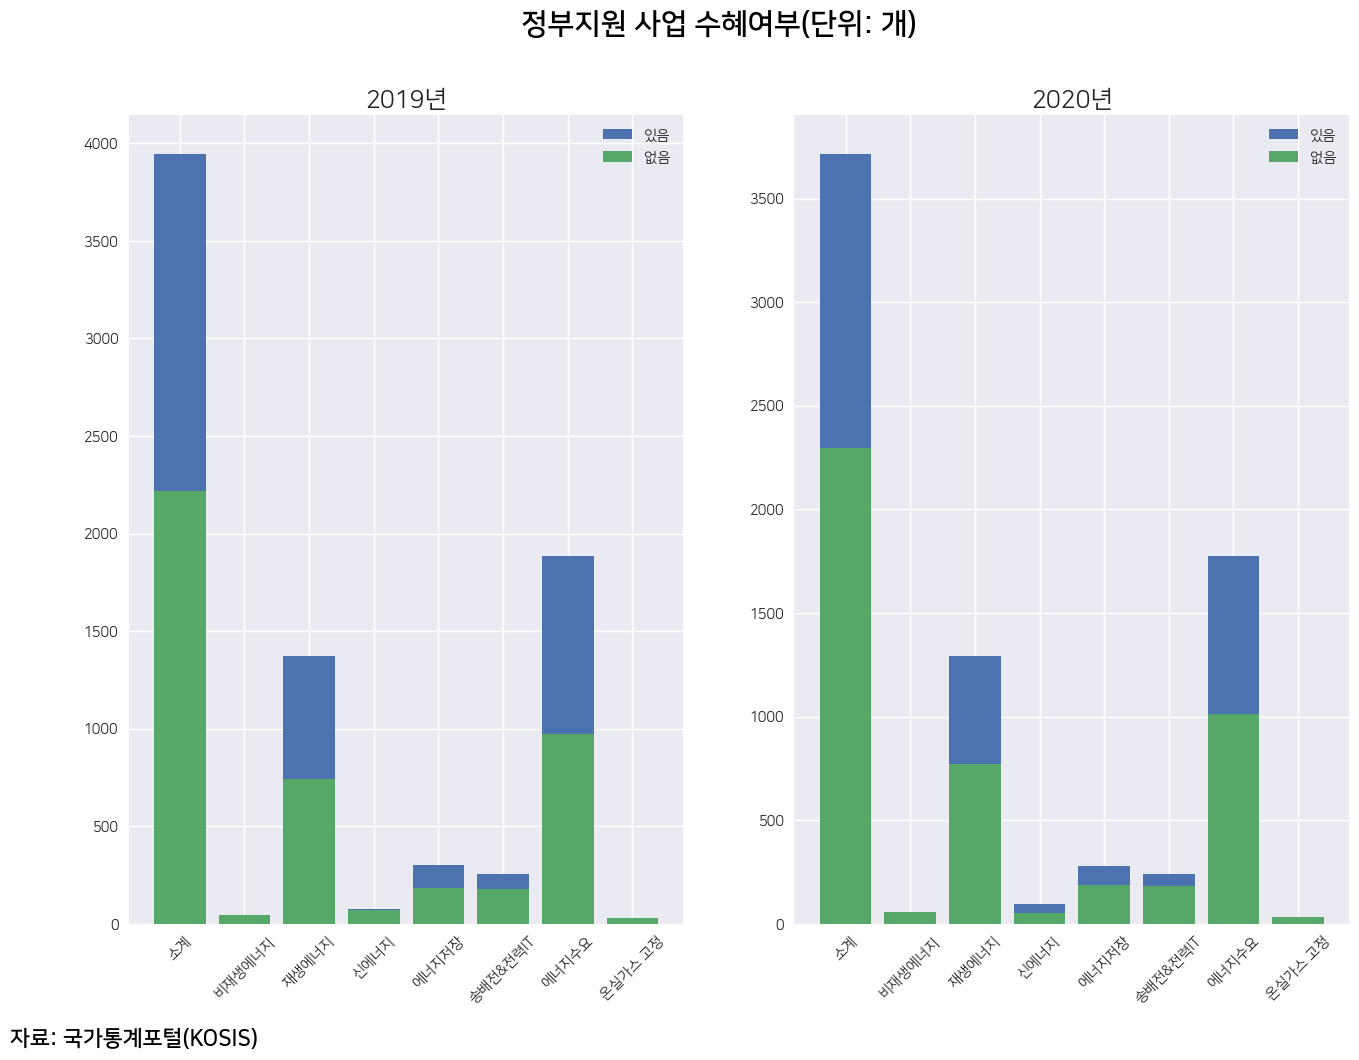

In [17]:
# plotting with matplotlib
pd.options.plotting.backend = 'matplotlib'

# 정부지원
govts_1920 = pd.read_excel(base_path+'CCUS_data/KOSIS/기후기술_영역별_정부지원_사업_수혜_여부_및_정책수단_종류_복수응답__20220704191713.xlsx', sheet_name=0)
govts_1920 = govts_1920.replace('-', 0)
govts_1920 = govts_1920.fillna(0)
govts_1920.iloc[2:,2:] = govts_1920.iloc[2:,2:].astype(float) # 숫자는 float 처리

# column들의 의미없는 년도 중복을 가져와서 처리 후 중복 내용 drop
govts_1920 = govts_1920.rename(columns={'기후기술분류별(1)' : '기후기술분류별(1)', 
                                                  '기후기술분류별(2)' : '기후기술분류별(2)', 
                                                  '2019 p)' : '정부지원 사업 수혜여부(합계/개)_2019', 
                                                  '2019 p).1' : '정부지원 사업 수혜여부(있음/개)_2019', 
                                                  '2019 p).2' : '정부지원 사업 수혜여부(없음/개)_2019', 
                                                  '2019 p).3' : '정책수단 종류 - 금융지원(건)_2019', 
                                                  '2019 p).4' : '정책수단 종류 - 기술개발지원(건)_2019', 
                                                  '2019 p).5' : '정책수단 종류 - 수주지원(건)_2019', 
                                                  '2019 p).6' : '정책수단 종류 - 판매/마케팅(건)_2019', 
                                                  '2019 p).7' : '정책수단 종류 - 인력양성지원(건)_2019', 
                                                  '2019 p).8' : '정책수단 종류 - 해외진출지원(건)_2019', 
                                                  '2019 p).9' : '정책수단 종류 - 기타(건)_2019', 
                                                  '2020' : '정부지원 사업 수혜여부(합계/개)_2020', 
                                                  '2020.1' : '정부지원 사업 수혜여부(있음/개)_2020', 
                                                  '2020.2' : '정부지원 사업 수혜여부(없음/개)_2020', 
                                                  '2020.3' : '정책수단 종류 - 금융지원(건)_2020', 
                                                  '2020.4' : '정책수단 종류 - 기술개발지원(건)_2020', 
                                                  '2020.5' : '정책수단 종류 - 수주지원(건)_2020', 
                                                  '2020.6' : '정책수단 종류 - 판매/마케팅(건)_2020', 
                                                  '2020.7' : '정책수단 종류 - 인력양성지원(건)_2020', 
                                                  '2020.8' : '정책수단 종류 - 해외진출지원(건)_2020', 
                                                  '2020.9' : '정책수단 종류 - 기타(건)_2020'})
# Ordering index
govts_1920 = govts_1920.drop([0,1]).reset_index(drop=True)

# 필요한 항목 : 정부지원 사업 수혜여부(있음/개)_2019, 정부지원 사업 수혜여부(없음/개)_2019, 정부지원 사업 수혜여부(있음/개)_2020, 정부지원 사업 수혜여부(없음/개)_2020
govts_visual = govts_1920.iloc[1:9,[0,1,3,4,13,14]].reset_index(drop=True)

# ---- 시각화 ----
# fig, ax1, ax2 = plt.subplots()
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 2, 1) # two rows, one column, first plot
ax2 = fig.add_subplot(1, 2, 2)

yes2019 = ax1.bar(x=govts_visual.iloc[:,1].values, height=govts_visual.iloc[:,2].values, label='있음')
no2019 = ax1.bar(x=govts_visual.iloc[:,1].values, height=govts_visual.iloc[:,3].values, label='없음')
ax1.set_title('2019년', fontsize=17)
ax1.tick_params(axis='x', rotation=45)
ax1.legend()


yes2020 = ax2.bar(x=govts_visual.iloc[:,1].values, height=govts_visual.iloc[:,4].values, label='있음')
no2020 = ax2.bar(x=govts_visual.iloc[:,1].values, height=govts_visual.iloc[:,5].values, label='없음')
ax2.set_title('2020년', fontsize=17)
ax2.tick_params(axis='x', rotation=45)
ax2.legend()

fig.text(0.05, -0.005, '자료: 국가통계포털(KOSIS)', fontdict={'fontsize':'15', 'fontweight':'bold', 'color':'k'})
plt.suptitle('정부지원 사업 수혜여부(단위: 개)', fontsize=20, weight='bold', c='k')
plt.show()


## Fig 14. 세계의 CCUS 프로젝트 진행 현황

자료: [US National Energy Technology Laboratory](https://netl.doe.gov/carbon-management/carbon-storage/worldwide-ccs-database)

posx and posy should be finite values
posx and posy should be finite values


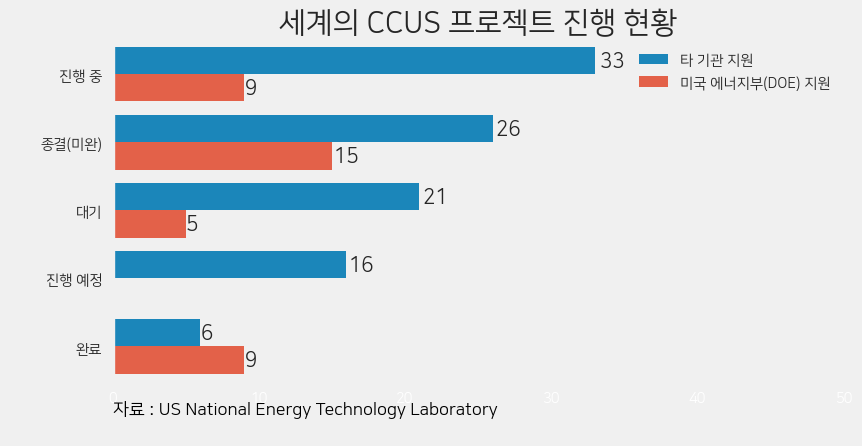

In [18]:
# Data import

# 출처 source : https://netl.doe.gov/carbon-management/carbon-storage/worldwide-ccs-database
df_10 = pd.read_excel(base_path+'CCUS_data/CCS-Database.xlsx')
# source : https://netl.doe.gov/carbon-management/carbon-storage/worldwide-ccs-database 내 tableu data(longitude included)
df_11 = pd.read_csv(base_path+'CCUS_data/NETI_DOE_GOV_data.csv', encoding = 'utf-8')

# 컬럼명에 개행문자 제거 필요

temp = list(df_10.columns)
col_name = []
# Let's remove \\n, \n in column name !

for i in enumerate(temp) : 
    col_name.append(i[1].replace('\n',''))

df_10.columns = col_name

# CCUS Status data plot

df_11 = df_11[df_11['Type Name'] == 'Capture & Storage']
df_10 = df_10[df_10['Storage and/or Capture'] == 'Capture and Storage']
df_10 = df_10.merge(df_11, on = "Project Name", how="left")
df_10_kr = ['프로젝트명', '회사명_x', '공장명', '저장 및 포집', '전반적 상태', '공장 상태', '프로젝트 단계', '나라', '주', '특정 위치', '공장 크기 혹은 포집 양', '동력 혹은 포집 단위', '연소/분리 기술', '포집 기술', '포집/저장한 Co2의 양', '포집/저장 단위',
 '프로젝트 개요', '프로젝트 시작일', '프로젝트 금액', '통화', '프로젝트 정보 웹사이트', '종류명', '연소 및 분리기술의 종류(Color by)', '주 이름', '위도', '경도', '연소/분리', '회사명_y', '미국 에너지부(DOE)및 다른 부서의 지원 여부', '공장 상태 _y',
 '지역제휴 여부', '상세 상태', '상태', '기술명', '종류']

 # 해외 프로젝트 진행상태
temp = df_10[~df_10['DOE Support'].isna()].reset_index(drop=True)
# 추가
temp['Overall Status'] = temp['Overall Status'].replace({'Active':'진행 중', 'Terminated':'종결(미완)', 'Hold':'대기', 'Potential':'진행 예정', 'Completed':'완료'}) # 추가

# plotting with matplotlib
pd.options.plotting.backend = 'matplotlib'
plt.style.use('fivethirtyeight')

plt.figure(figsize=(8,4))
plt.title('세계의 CCUS 프로젝트 진행 현황')
ax = sns.countplot(y='Overall Status', data = temp, order = temp['Overall Status'].value_counts().index, hue='DOE Support')

for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.0f "%(width), va='center')
    
ax.set_xlim(0, 50)
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(color='w')
plt.xticks(color='w')
# plt.gca().xtick.set_visible(False)

ax.grid(False)

plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.text(0, 5, '자료 : US National Energy Technology Laboratory', fontdict={'family': 'NanumSquare','fontsize':12, 'color':'k'})
plt.legend(labels=['타 기관 지원','미국 에너지부(DOE) 지원']) # 추가!

plt.show()

- 자료작성 시점 기준, 완성된 프로젝트들은 각국의 정부기관(에너지부)의 예산을 지원받은 프로젝트의 비율이 50% 더 높습니다.
- 그외, 현재 활성, 잠재, 중단, 종결의 프로젝트의 경우 모두 정부기관 예산이 아닌 다른 재원에 의해 진행된 것을 확인할 수 있습니다. 

## Fig 14_1. 전세계 CCUS 프로젝트 진행현황

자료: [US National Energy Technology Laboratory](https://netl.doe.gov/carbon-management/carbon-storage/worldwide-ccs-database)

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:470: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:937: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



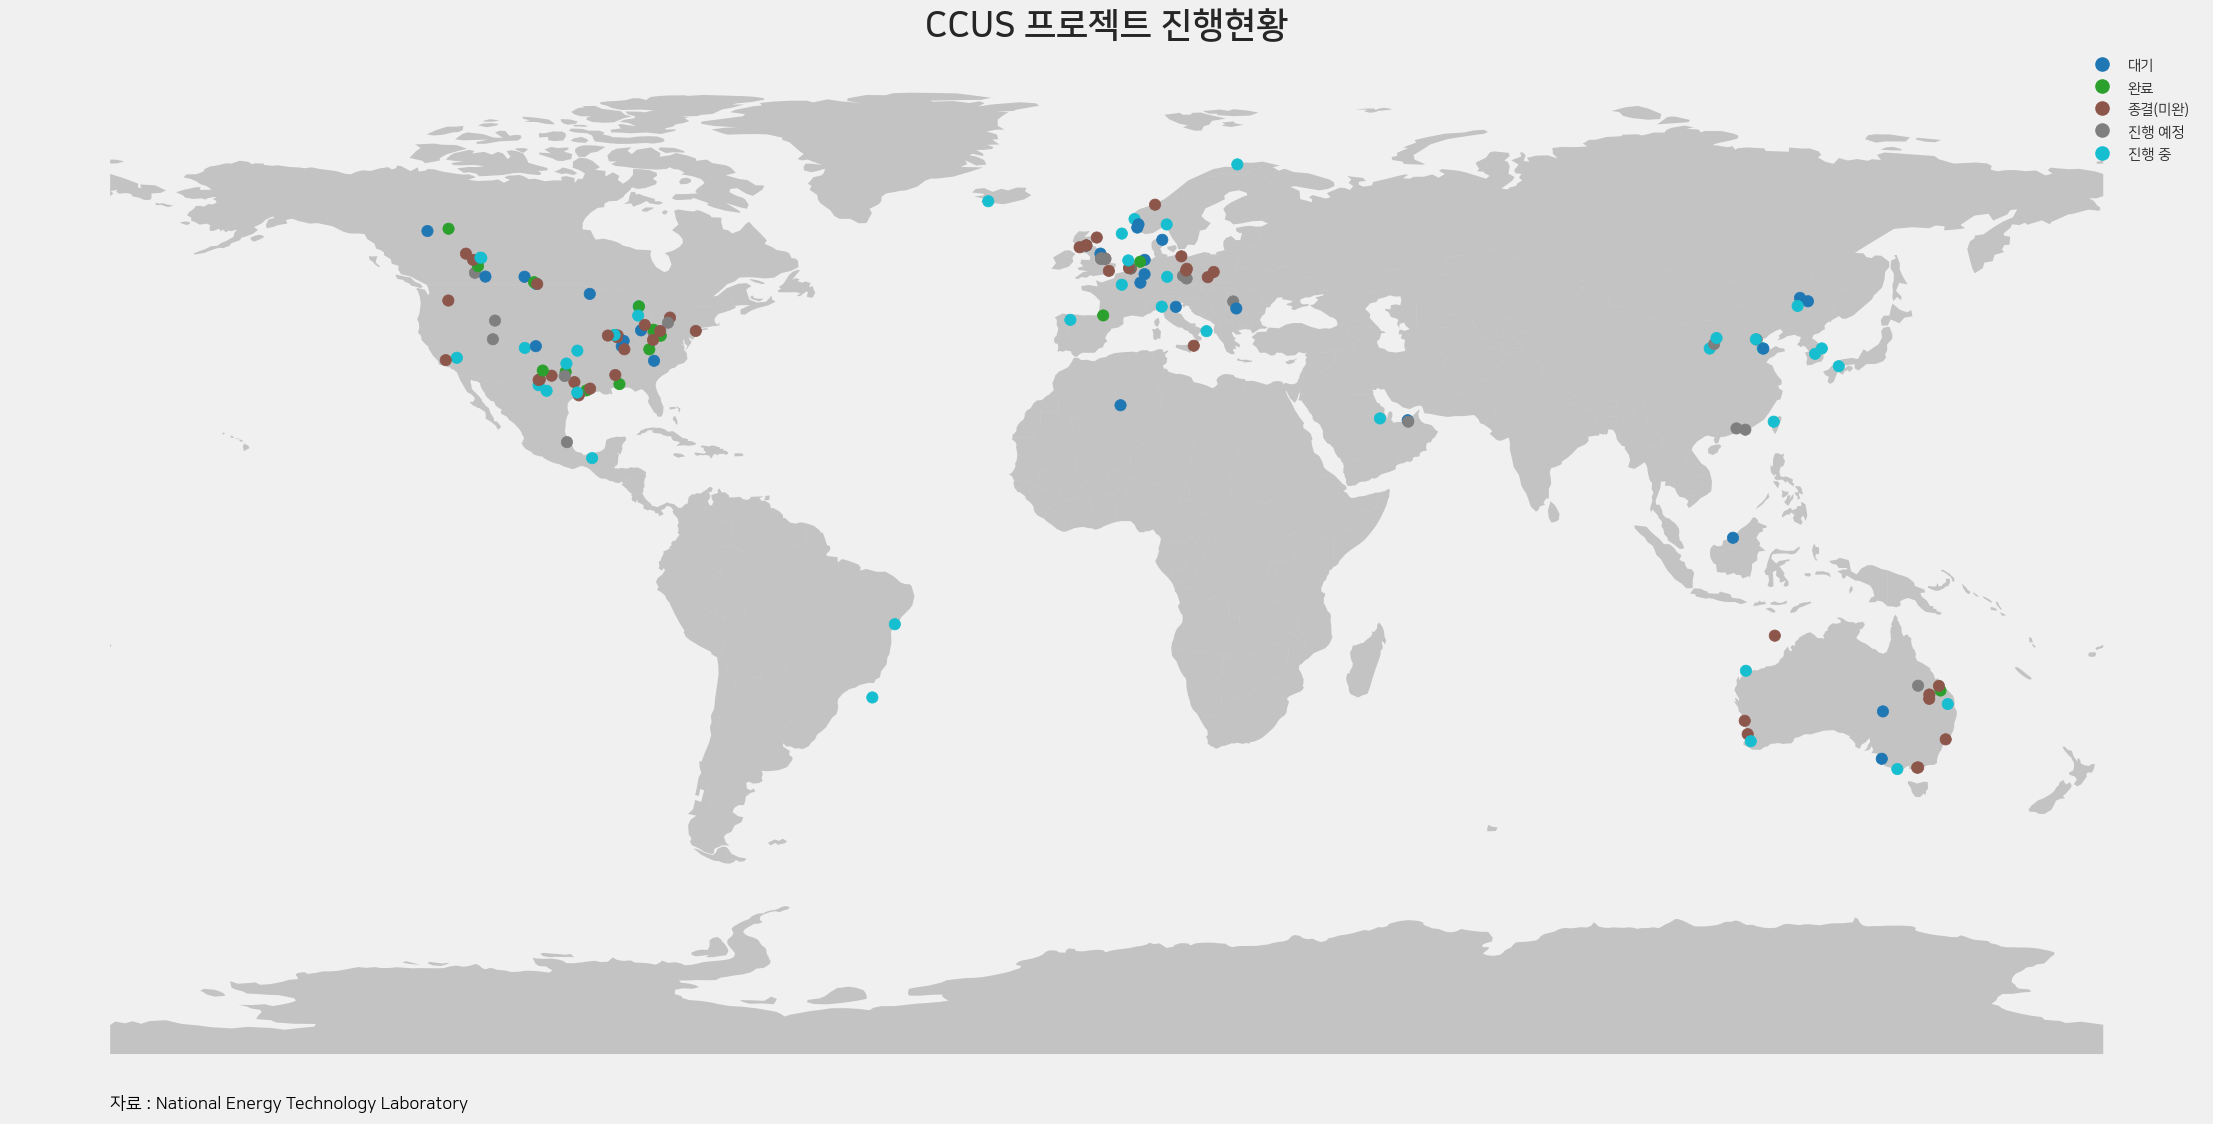

In [19]:
pd.options.plotting.backend = 'plotly'

# Create point geometries
geometry = geopandas.points_from_xy(df_11.Longitude, df_11.Latitude)
geo_df = geopandas.GeoDataFrame(df_11[['Type', 'Status Name', 'State Name', 'Longitude', 'Latitude', 'DOE Support', 'Plant Status', 'Combustion / Separation']], geometry=geometry)
geo_df.head()

# Available datasets are naturalearth_cities, naturalearth_lowres, nybb
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
df_10['Status Name'].unique()

fig, ax = plt.subplots(figsize = (24,18))
world.plot(ax=ax, alpha = 0.4, color = 'gray')
geo_df['Status Name'] = geo_df['Status Name'].replace({'Active':'진행 중', 'Terminated':'종결(미완)', 'Hold':'대기', 'Potential':'진행 예정', 'Completed':'완료'}) # 추가

geo_df.plot(column='Status Name', ax= ax, legend = True, markersize = 60)
plt.title('CCUS 프로젝트 진행현황', fontdict={'fontsize' : 24, 'fontweight': 'bold'})

# plt.legend(fontsize = 18)
plt.axis('off')
plt.text(-180, -100, '자료 : National Energy Technology Laboratory', fontdict={'family': 'NanumSquare','fontsize':12, 'color':'k'})
plt.show()

- 지도를 확인해보면 '북미(미국, 캐나다), 유럽, 호주와 같은 선진국에서 프로젝트가 발생하였습니다.
- 이는 앞에서 주장한 선진국에서 환경 관심도 증가한다는 해석에 신빙성을 부여해주는 자료입니다.

## Fig 14_2. 국가별 CCUS 프로젝트 진행현황

자료: [US National Energy Technology Laboratory](https://netl.doe.gov/carbon-management/carbon-storage/worldwide-ccs-database)

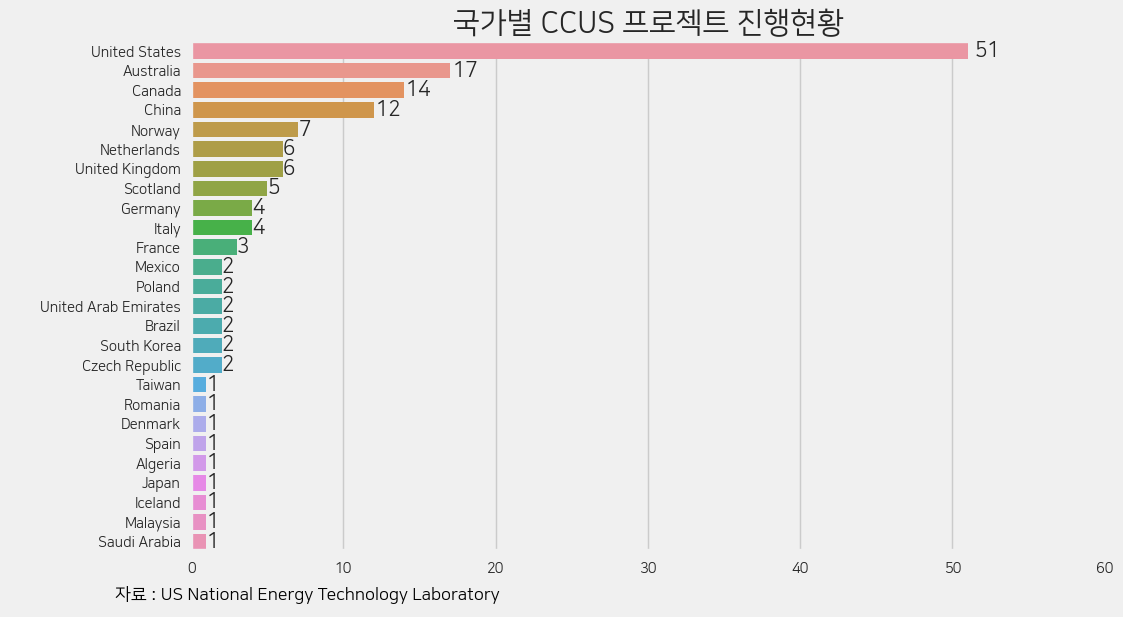

In [20]:
pd.options.plotting.backend = 'matplotlib'

#Create point geometries
geometry = geopandas.points_from_xy(df_10.Longitude, df_10.Latitude)
geo_df = geopandas.GeoDataFrame(df_10[['Type', 'Status Name', 'State Name', 'Longitude', 'Latitude', 'DOE Support', 'Combustion / Separation', 'CountryLocation']], geometry=geometry)
geo_df.head()

# 개발단계에 따른 세계의 프로젝트 분포도 파악 
plt.figure(figsize=(10,6))
plt.title('국가별 CCUS 프로젝트 진행현황')

ax = sns.countplot(y='CountryLocation', data = df_10, order = df_10['CountryLocation'].value_counts().index)

for p in ax.patches:

    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%d "%(width), va='center')
    
ax.set_xlim(0, 60)
plt.xlabel(' ')
plt.ylabel(' ')

plt.text(-5, 28, '자료 : US National Energy Technology Laboratory', fontdict={'family': 'NanumSquare','fontsize':12, 'color':'k'})

plt.show() 

- 프로젝트 진행 건수 상위 5개국으로는 각각 미국, 호주, 캐나다, 중국, 노르웨이(합계 101건), 전체 프로젝트 수 대비, 약 66%를 차지합니다.

## Fig 15_1. CCUS 포집 기술 세부 구분에 따른 분포

자료: [US National Energy Technology Laboratory](https://netl.doe.gov/carbon-management/carbon-storage/worldwide-ccs-database)

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:470: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:937: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



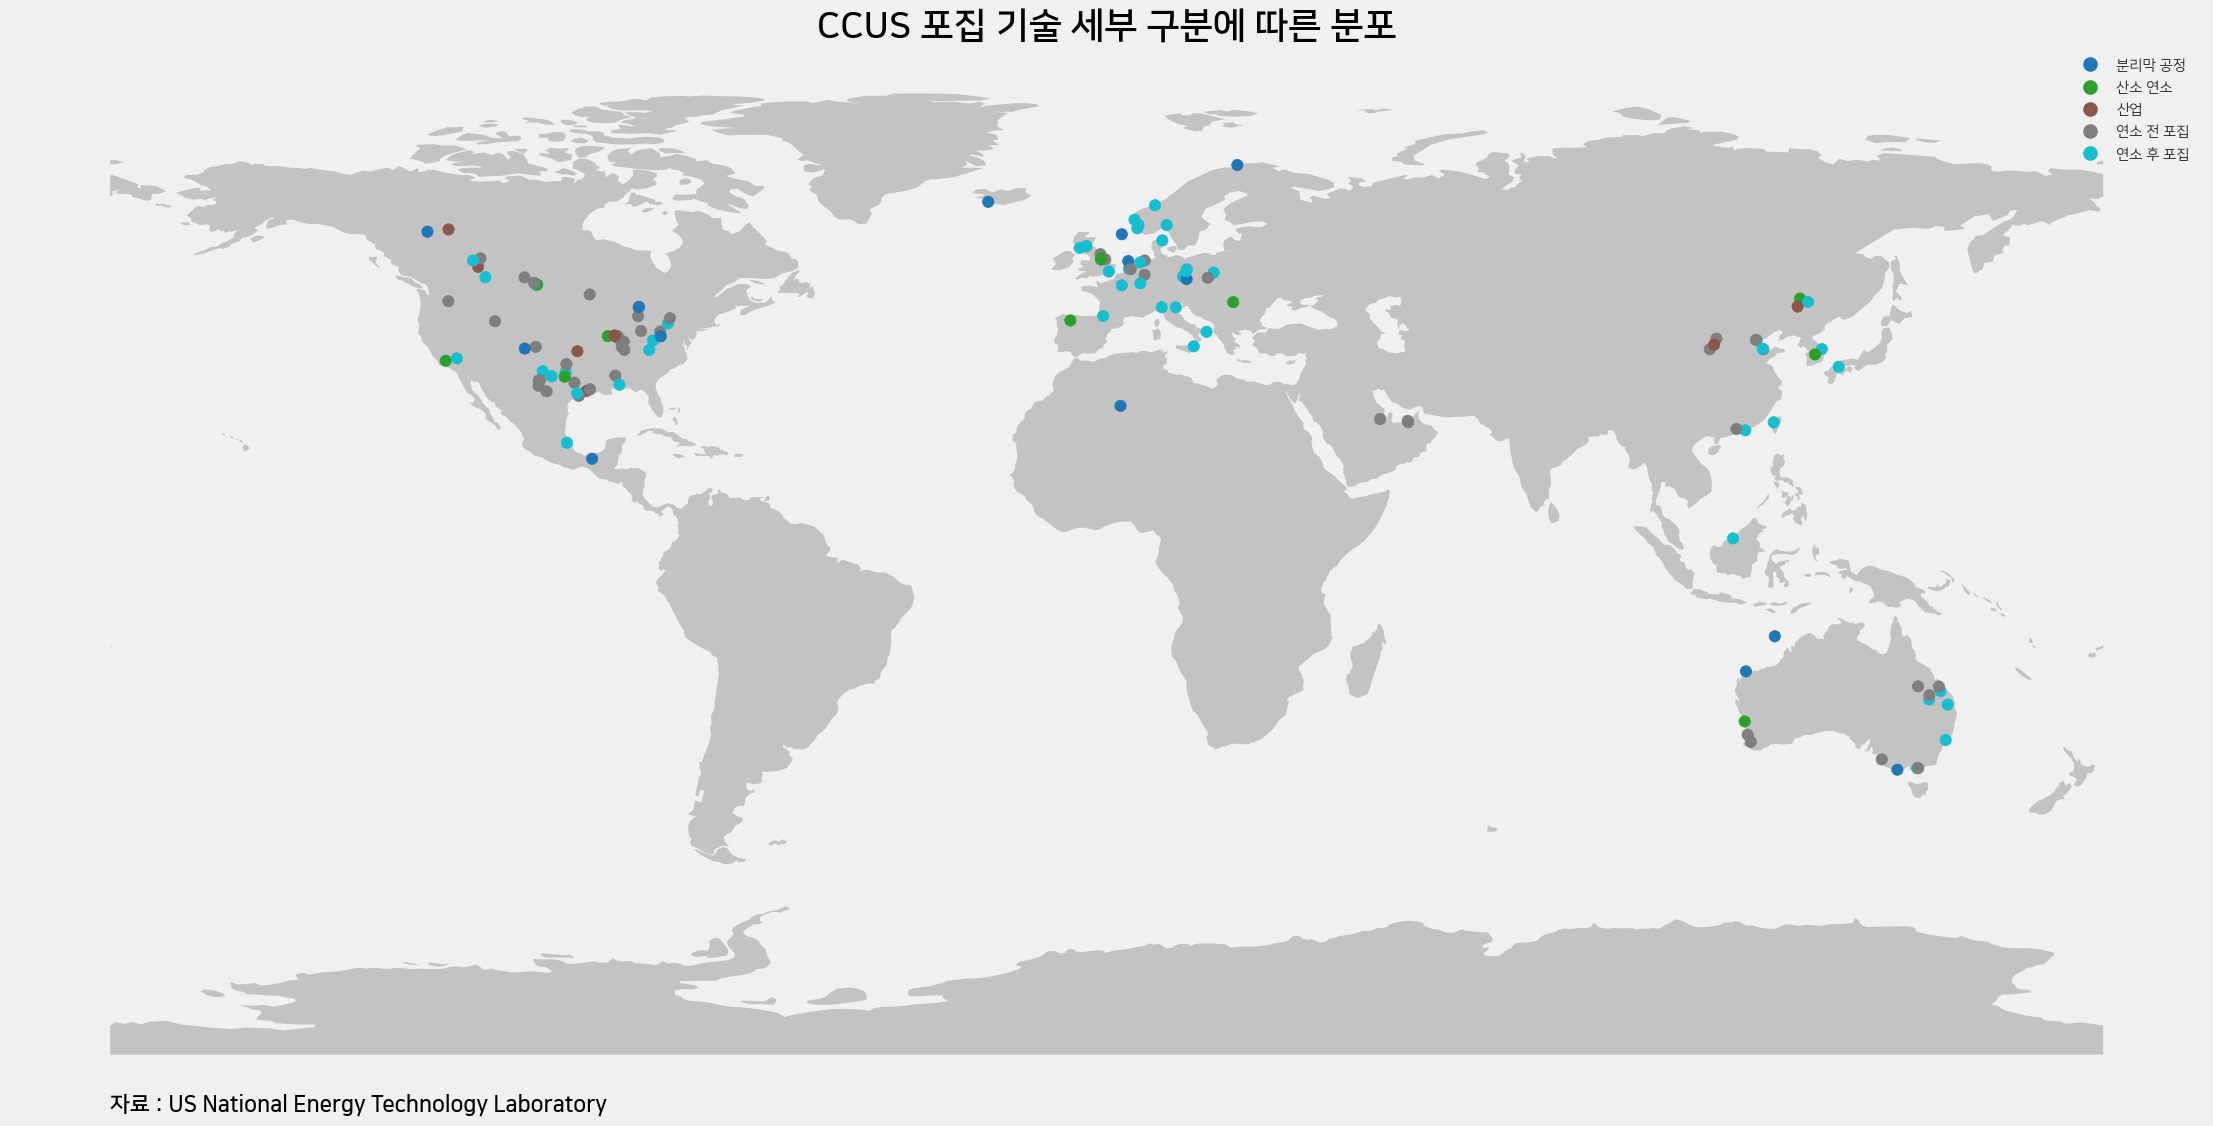

In [21]:
pd.options.plotting.backend = 'matplotlib'

# It's better to draw img using geopands or geological base.
fig, ax = plt.subplots(figsize = (24,18))
world.plot(ax=ax, alpha = 0.4, color = 'gray')
geo_df['Combustion / Separation'] = geo_df['Combustion / Separation'].replace({'Post-Combustion':'연소 후 포집', 'Pre-Combustion':'연소 전 포집', 'Separation':'분리막 공정', 'Oxycombustion':'산소 연소', 'Industrial':'산업'})
geo_df.plot(column='Combustion / Separation', ax= ax, legend = True, markersize = 60)

plt.title('CCUS 포집 기술 세부 구분에 따른 분포', fontdict={'fontsize':25, 'fontweight':'bold', 'color':'k'})
plt.axis('off')
plt.text(-180, -100, '자료 : US National Energy Technology Laboratory', fontdict={'family': 'NanumSquare','fontsize':15, 'fontweight':'bold', 'color':'k'})
plt.show()

## Fig 15_2. CCUS 포집 기술 세부 구분에 따른 프로젝트 현황

자료: [US National Energy Technology Laboratory](https://netl.doe.gov/carbon-management/carbon-storage/worldwide-ccs-database)

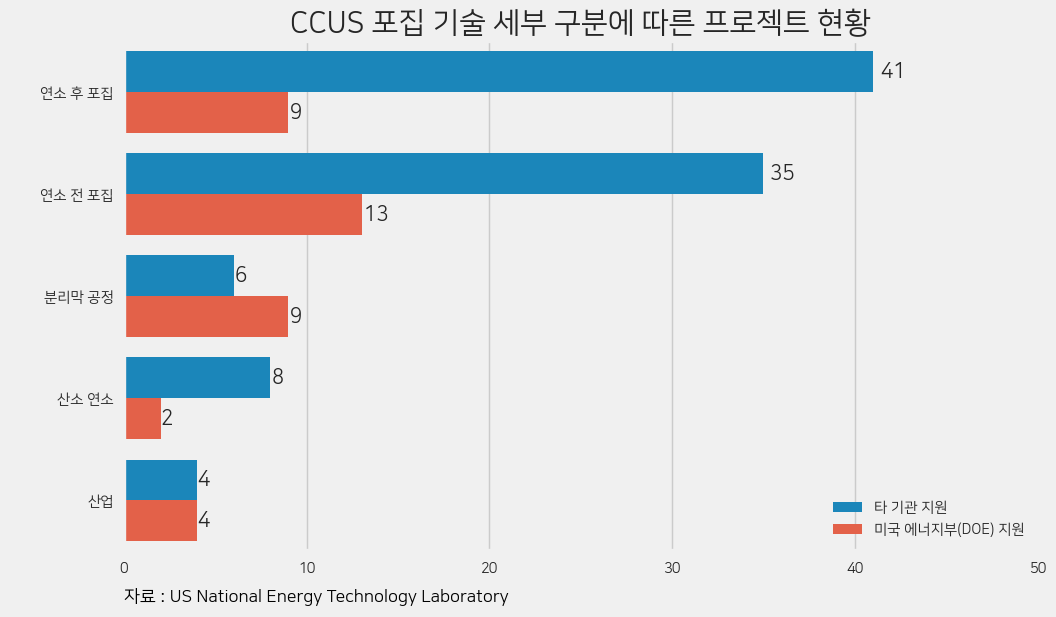

In [22]:
pd.options.plotting.backend = 'matplotlib'

# countplot
plt.figure(figsize=(10,6))
plt.title('CCUS 포집 기술 세부 구분에 따른 프로젝트 현황')
df_10['Combustion / Separation'] = df_10['Combustion / Separation'].replace({'Post-Combustion':'연소 후 포집', 'Pre-Combustion':'연소 전 포집', 'Separation':'분리막 공정', 'Oxycombustion':'산소 연소', 'Industrial':'산업'}) # 추가

ax = sns.countplot(y='Combustion / Separation', data = df_10, order = df_10['Combustion / Separation'].value_counts().index, hue='DOE Support')

for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%d "%(width), va='center')
    
ax.set_xlim(0, 50)
plt.xlabel(' ')
plt.ylabel(' ')
plt.legend(labels=['타 기관 지원','미국 에너지부(DOE) 지원']) # 추가!
plt.text(0, 5, '자료 : US National Energy Technology Laboratory', fontdict={'family': 'NanumSquare','fontsize':12, 'color':'k'})

plt.show()

- 연소 전, 후 포집, 산소 연소의 경우는 정부 지원금 보다는 다른 재원을 통해 이루어지는 프로젝트의 비중이 많은 것을 확인할 수 있습니다.
- 분리 기술의 경우 정부 지원금으로 진행되는 프로젝트 수가 더 많습니다.

## Fig 16. CCS 잠재저장 지역 / 세부 분류 별 분포도

자료: [CATF US](https://www.catf.us/ccsmapus/)

In [23]:
# 이산화탄소(CO2) 저장(CCS) 장소 분포도(Bubble) https://www.catf.us/2020/07/ccus-interactive-map/
# https://stephenjlee.github.io/catf-ccus/catf_data_processing/data/raw/natcarb_saline.geojson : json data of Carbon storage (Potential)

import folium
import folium.plugins as plugins
import json
import requests

pd.options.plotting.backend = 'plotly'


title_html = '''
     <head><style> html { overflow-y: hidden; } </style></head>
     <h3 align="center" style="font-size:20px"><b> CCS 잠재저장 지역 / 세부 분류 별 분포도 </b></h3>
     ''' 

#data loading
url = (
    "https://stephenjlee.github.io/catf-ccus/catf_data_processing/data/raw"
)
url2 = (
    "https://stephenjlee.github.io/catf-ccus/catf_data_processing/src/features"
)
# storage_america = f"{url}/natcarb_saline.geojson"
# storage_eu = f"{url}/CO2StoP.geojson"
sub_bio = f"{url2}/ccus_data_subsect_bio.geojson"
sub_cem = f"{url2}/ccus_data_subsect_cem.geojson"
sub_heat = f"{url2}/ccus_data_subsect_heatpow.geojson"
sub_hyd = f"{url2}/ccus_data_subsect_hyd.geojson"
sub_ind = f"{url2}/ccus_data_subsect_indust.geojson"
sub_sto = f"{url2}/ccus_data_subsect_storage.geojson"
sub_wte = f"{url2}/ccus_data_subsect_wte.geojson"
sub_dac = f"{url2}/ccus_data_subsect_dac.geojson"
sub_oth = f"{url2}/ccus_data_subsect_other.geojson"
# code for loop
subsector = [
    sub_bio,
    sub_cem,
    sub_heat,
    sub_hyd,
    sub_ind,
    sub_sto,
    sub_wte,
    sub_dac,
    sub_oth,
    ]

m = folium.Map(
    location=[47.55,-34.93],
    tiles="cartodbpositron",
    zoom_start=3,
)

m.get_root().html.add_child(folium.Element(title_html))

# make objects based on json file
# folium.GeoJson(storage_america, name="잠재적 저장가능 지역").add_to(m)
# folium.GeoJson(storage_eu, name="잠재적 저장가능 지역").add_to(m)
fg = folium.FeatureGroup(name='세부분류')
m.add_child(fg)
g1 = plugins.FeatureGroupSubGroup(fg, '바이오연료[빨간색]')
m.add_child(g1)
g2 = plugins.FeatureGroupSubGroup(fg, '시멘트[주황색]')
m.add_child(g2)
g3 = plugins.FeatureGroupSubGroup(fg, '직접 공기 포집[노란색]')
m.add_child(g3)
g4 = plugins.FeatureGroupSubGroup(fg, '열 및 전력[녹색]')
m.add_child(g4)
g5 = plugins.FeatureGroupSubGroup(fg, '수소[파란색]')
m.add_child(g5)
g6 = plugins.FeatureGroupSubGroup(fg, '산업 허브[남색]')
m.add_child(g6)
g7 = plugins.FeatureGroupSubGroup(fg, '저장소[보라색]')
m.add_child(g7)
g8 = plugins.FeatureGroupSubGroup(fg, '폐기물 에너지[분홍색]')
m.add_child(g8)
g9 = plugins.FeatureGroupSubGroup(fg, '기타[회색]')
group = list()
group.extend([g1, g2, g3, g4, g5, g6, g7, g8, g9])
m.add_child(g9)

# make pastel color
color_set = ['#FFADAD', '#FFD6A5','#FDFFB6','#CAFFBF','#9BF6FF','#A0C4FF','#BD82FF','#FFC6FF','#808080']

for subsec_i in range(len(subsector)) :
    url = requests.get(subsector[subsec_i])
    text = url.text
    json_data = json.loads(text)
    for i in json_data['features'] :
        lat = i['geometry']['coordinates'][0]
        lon = i['geometry']['coordinates'][1]

        popup = [i['properties']['proj_name'], i['properties']['sector'], i['properties']['subsector_std'], i['properties']['cap_std'], i['properties']['status']]
        folium.CircleMarker([lon,lat],
        radius = 10,
        color = color_set[subsec_i],
        fill = color_set[subsec_i], 
        fill_opacity = 100,
        draggable = True,
        tooltip = popup,

        # tooltip=folium.features.GeoJsonTooltip( fields=[ "proj_name" , 'sector' ], aliases = [ 'name: ', 'sector: '],                     
        # tooltip list : ['proj_name', 'sector', 'subsector_std', 'cap_std', 'status']

        ).add_to(group[subsec_i])
        # print(color_set[subsec_i])



folium.LayerControl(collapsed=False).add_to(m)
m

- 바이오연료 분야는 미주지역에 분포합니다.
- 수소, 저장소 분야의 경우, 유럽권에 상당수 분포하는 것을 확인할 수 있습니다. 
- 중동지역에 상당수가 기타 분야로 이루어져 있습니다.

## Fig 17. 국내 화력발전소 CO2 포집 방식별 분포도


자료: [KISTEP 기술동향브리프 이산화탄소 포집.저장.활용기술](https://www.kistep.re.kr/boardDownload.es?bid=0031&list_no=34946&seq=9150) 

In [ ]:
pd.options.plotting.backend = 'plotly'

df_fac = pd.read_csv(base_path+'CCUS_data/국내_화력발전소_연소후포집_설비.csv')

# 주소 추출, Vworld API활용하여 df_c 에 위도/경도값 불러오기

df_fac['lon'] = 0.0
df_fac['lat'] = 0.0

index = 0
for i in df_fac['주소'] : 

    temp = i.split(" ")
    add = temp[3] # 면 단위로 좌표값 추출
    
    API_KEY = 'C4FD2500-8D1B-3D2D-BB06-C80920EA729E'
    api_address = f'http://api.vworld.kr/req/address?service=address&request=getcoord&version=2.0&crs=epsg:4326&address={add}&refine=true&simple=false&format=xml&type=road&key={API_KEY}'

    req = requests.get(api_address)

    # print(req)
    # print(req.status_code)
    # print(req.headers['content-type'])

    soup = bs(req.text, "html.parser")
    # print(soup)
    elements = soup.select('point > x, y')

    # print(elements)
    # print('x :', elements[0].text, '\ny: ', elements[1].text) 
    df_fac['lon'][index] = float(elements[0].text)
    df_fac['lat'][index] = float(elements[1].text)

    # print(df_fac['lat'])
    index = index + 1

    # 대한민국 지도 불러오기
loc = 'Corpus Christi'
title_html = '''
     <head><style> html { overflow-y: hidden; } </style></head>
     <h3 align="center" style="font-size:20px"><b> 국내 화력발전소 CO2 포집 방식별 분포도 </b></h3>
     ''' 

from branca.element import Figure
fig = Figure(width=500, height=600)
m = folium.Map([35.5053542, 127.7043419], zoom_start=7, tiles='Cartodb Positron')
fig.add_child(m)

m.get_root().html.add_child(folium.Element(title_html))

# 좌표값 기반으로 지도에 표기

for i in range(len(df_fac['lat'])):
    loc = [df_fac['lat'][i],df_fac['lon'][i]]
    rad = 6 * float(df_fac['규모(단위: MWe)'][i]),  
    col ='#000000',
    popup = [df_fac['설비'][i], df_fac['방식'][i]]
    # 포집 방식에 따른 색깔 분류
    if df_fac['방식'][i] == '분리막 포집':
        folium.CircleMarker(location=loc,
                            radius=rad,
                            tooltip=popup,
                            color= col,
                            fill_color='#68F394',
                            fill=True).add_to(m)
    elif df_fac['방식'][i] == '습식 포집':
        folium.CircleMarker(location=loc,
                            radius=rad,
                            tooltip=popup,
                            color=col,
                            fill_color='#B385EF',
                            fill=True).add_to(m)
    elif df_fac['방식'][i] == '건식 포집':
        folium.CircleMarker(location=loc,
                            radius=rad,
                            tooltip=popup,
                            color= col,
                            fill_color='#4BD4FE',
                            fill=True).add_to(m)

m

- 국내 화력발전소 4개소의 포집 방식에 따라 구분하여 분포를 표현하였으며, 이를 위해, vworld 오픈 API를 활용하여 주소를 좌표값으로 변환하는 절차를 수행하였습니다.
- 배출 가스에서 이산화탄소를 필름형태의 막을 통해 선택적으로 분리하는 분리막 포집의 경우 당진화력(韓아스트로마社의 기술 채택)에서 적용중이며, 배출되는 배가스 중 연간 7,000톤의 이산화탄소 분리･포집
- 습식/건식 포집기술의 경우 각각 충남 보령/경남 하동화력에서 각각 연간 7만 톤 정도의 이산화탄소를 포집 중
 * 건식 포집 : 건식 고체흡수제를 이용하여 연소 배가스 중 이산화탄소를 연속 혹은 선택적으로 포집
 * 습식 포집 : 가스를 액체흡수제와 접촉시켜 액상의 용해도나 화학 반응 성질을 이용하여 가스 중 이산화탄소를 선택적으로 분리･포집 

## Fig 18. CCUS 분야의 세계 산업 내 CO2 공급과 수요

자료: BNEF(2020), CCUS Costs and Opportunities for Long-term CO2 Disposal


In [27]:
pd.options.plotting.backend = 'plotly'

labels1 = ['암모니아', '수소', '자연 우물', '기체 처리', '바이오에탄올', '기타']
labels2 = ['요소', '무기 탄산염', '직접 사용', '원유 회수 증진', '메탄올', '기타']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels1, values=[44, 16, 16, 15, 6, 3], text = labels1, showlegend=False, name="CO2 공급",pull=[0, 0, 0, 0, 0, 0, 0]), 1, 1)
fig.add_trace(go.Pie(labels=labels2, values=[46, 24, 14, 10, 3, 3], text = labels2,showlegend=False, name="CO2 수요", pull=[0, 0, 0, 0, 0, 0, 0]), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo='label+percent+name')

fig.update_layout(
    title_text='<b>CCUS 분야의 세계 산업 내 CO2 공급과 수요</b>           단위: 290Mt/yr',
    font_family='NanumSquare',
    title_font_family='NanumSquare',)

fig.update_xaxes(title_font_family='NanumSquare')
fig.update_yaxes(title_font_family='NanumSquare')

fig.add_annotation(x=0, y=-0.2, text='<b>자료: BNEF(2020), CCUS Costs and Opportunities for Long-term CO2 Disposal</b>', showarrow=False, font_size=16)
fig.show()

- CCUS 관련 산업의 연간 전세계 C02 공급/수요는 2.9억톤 수준 입니다.
- 공급 측면에서는, 고농도의 CO2를 배출하는 산업(암모니아, 수소, 천연가스)에 집중되고 있습니다.
- 수요 측면에서는, 암모니아, 무기탄산염 산업에서 발생하는 C02를 바로 공정에서 활용 중입니다.(약 70%)

# **Smart Grid**

## 스마트그리드란? <br>
: 전기 및 정보통신 기술을 활용하여 전력망을 지능화·고도화함으로써 고품질의 전력서비스를 제공하고 에너지 이용효율을 극대화하는 전력망

자료: 한국전력

## Fig 19. 최근 10년 간 6월 평균 최대전력 추이

<b>자료</b><br>
- [6월 전기사용량 금증 관련 기사](https://www.etoday.co.kr/news/view/2147928)
- [전력거래소 전력통계정보시스템](https://epsis.kpx.or.kr/epsisnew/selectMain.do)

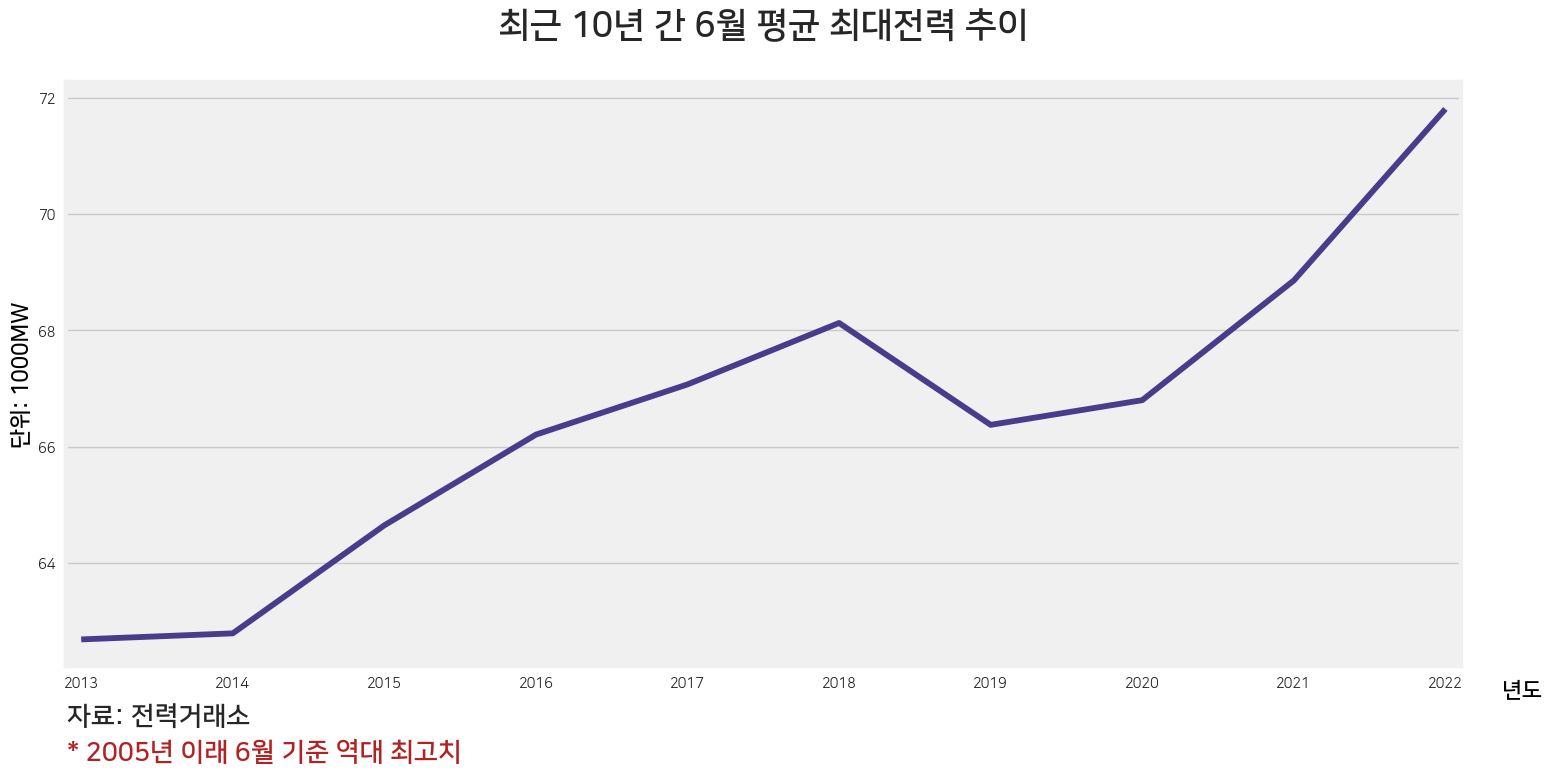

In [28]:
pd.options.plotting.backend = 'matplotlib'

df = pd.read_csv(base_path +'SmartGrid_data/average_monthly_maximum_power.csv', encoding='cp949', index_col='연도')

cols = ['1월', '2월', '3월','4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
df = df[:10] # 최근 10년 통계
df['평균'] = df.mean(axis='columns')
df['6월_단위'] = df['6월']/1000 # 단위 처리
fig, ax = plt.subplots(figsize=(15, 7), facecolor="w")
p = sns.lineplot(data=df, x='연도', y='6월_단위',color= "darkslateblue", lw=4, ax= ax)
p.set(xlabel=None, ylabel=None)
ax.set_title('최근 10년 간 6월 평균 최대전력 추이', fontsize=24, fontweight="bold", pad=32)
font_ylabel = {"fontsize":15, "fontweight":"bold"}
plt.ylabel('단위: 1000MW', fontdict=font_ylabel, color="k")

ax.set_xlim(2012.9, 2022.1)
ax.set_xticks(sorted(df.index.to_list()))
font_xlabel = {"fontsize":15, "ha":"left", "fontweight":"bold"}
ax.text(1.03, -0.05, "년도", transform=ax.transAxes, fontdict=font_xlabel, color="k")

fig.text(0.05, 0.00, '자료: 전력거래소', fontdict={'fontsize':"18", "fontweight":"bold"})
fig.text(0.05, -0.05, '* 2005년 이래 6월 기준 역대 최고치', fontdict={'fontsize':"18", "fontweight":"bold"}, color="firebrick")
ax.grid(axis="x")
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
fig.tight_layout()

- 지구온난화의 영향으로 '이례적으로 더운 날씨와 고온다습한 국내 기후'가 형성되었고, 이는 전력 사용의 증가로 발전을 통한 온실가스 배출을 증가시키는 **악순환(vicious cycle)**으로 이어지고 있습니다.
- **이러한 고리를 깨기 위해**, 효율적인 전력 사용 즉, 스마트그리드의 중요성도 더욱 커져갑니다.

## Fig 20. 용도별 전력 사용량 현황

자료:  [한국전력통계(제91호)](https://home.kepco.co.kr/kepco/KO/ntcob/ntcobView.do?pageIndex=1&boardSeq=21057408&boardCd=BRD_000099&menuCd=FN05030103&parnScrpSeq=0&categoryCdGroup=&regDateGroup2)

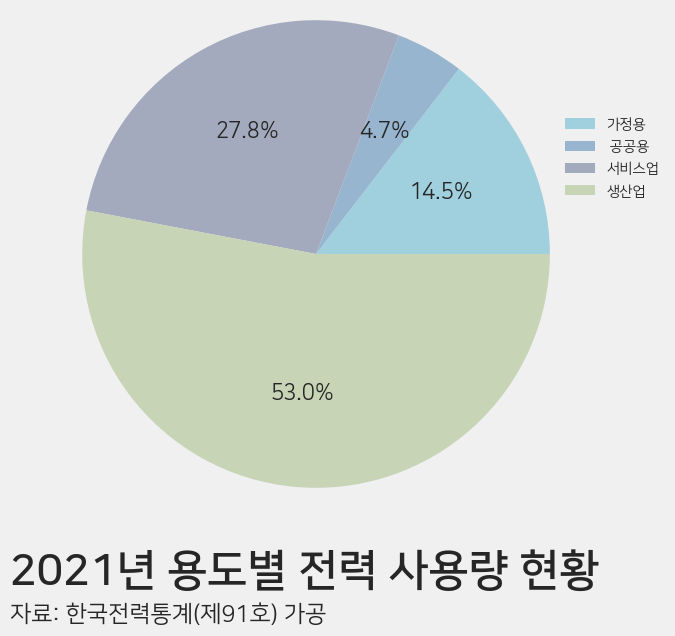

In [29]:
pd.options.plotting.backend = 'matplotlib'

test = pd.read_csv(base_path+ 'SmartGrid_data/용도별_판매전력량(2021).csv', thousands=',')
test['생산업'] = test['농림어업'] + test['광업'] + test['제조업']
test=test.drop(['농림어업', '광업', '제조업'], axis=1)
test = test[['시점','가정용', '공공용', '서비스업', '생산업']]
test = test.set_index('시점').T
labels = ['가정용',' 공공용','서비스업','생산업']
colors = ['#A0D0DE','#97B5CF','#A3AABD','#C7D4B6']
fig, ax = plt.subplots(nrows=2, figsize=(6,7), gridspec_kw={'height_ratios':[9,1]})
ax[0].pie(test[2021], colors=colors, autopct='%.1f%%', radius=1.2, textprops=dict(size=15))
ax[0].legend(loc = (1., 0.), labels=labels, bbox_to_anchor=(0.5, 0.6, 0.5, 0.5))
ax[1].axis('off')
fig.text(0.03, 0.1, '2021년 용도별 전력 사용량 현황', fontdict={'fontsize':30, 'fontweight':'bold'})
fig.text(0.03, 0.05, '자료: 한국전력통계(제91호) 가공', fontdict={'fontsize':16})
plt.show()

- 전체 전력 사용량은 생산업 전력이 가장 높은 비중을 차지하고 있다.
- 이는 53%의 높은 비중을 차지하는 생산업 전력이 에너지 효율 향상의 핵심임을 알 수 있다.

## Fig 21. 국내 전력손실 추이

자료: [국가통계포털 KOSIS](https://kosis.kr/statHtml/statHtml.do?tblId=DT_31002N_A002&orgId=310&language=kor&conn_path=&vw_cd=&list_id=)

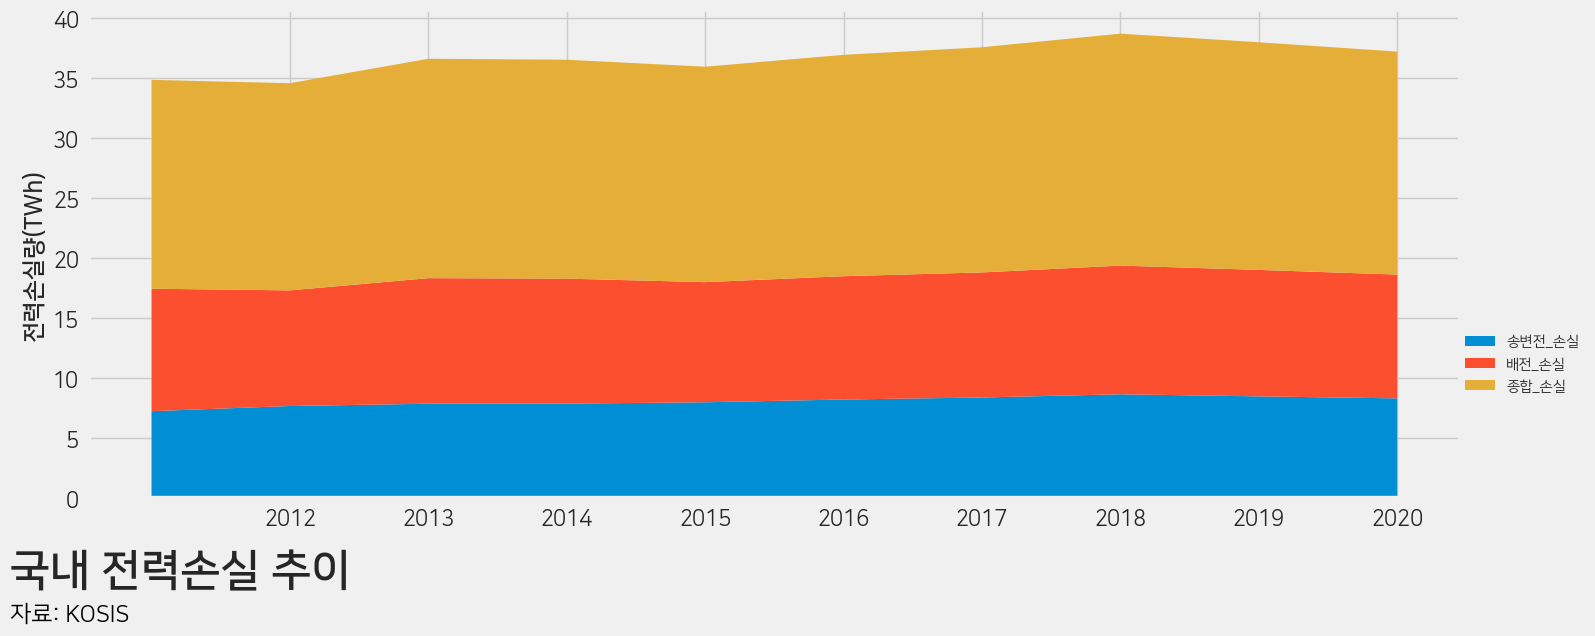

In [30]:
pd.options.plotting.backend = 'matplotlib'

# df3 전력손실 추이
df3 = pd.read_csv(base_path+ 'SmartGrid_data/KOSIS/전력손실_추이.csv', encoding='euc-kr', names = ['시점','월별', '송전단전력량(A)(MWh)', '배분전력량(B)(MWh)', '손실량(A-B)(MWh)','손실률((A-B)/A)(%)', '배전판매량(C)(MWh)', '손실량(B-C)(MWh)', '손실률((B-C)/B)(%)', '손실량(A-C)(MWh)', '손실률((A-C)/A)(%)'])

df3 = df3.loc[(df3.iloc[:,1] == '합계')] # 전력량 합계
df33 = df3[['시점','손실량(A-B)(MWh)', '손실량(B-C)(MWh)',  '손실량(A-C)(MWh)']].astype('int')
df33.columns = ['시점','송변전_손실', '배전_손실', '종합_손실']

df33 = df33.astype('int')

for col in df33.columns.difference(['시점']):
    df33[col] = df33[col] * 0.000001

plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'NanumSquare' # plt 한글 폰트 적용
fig, ax = plt.subplots(nrows=2, figsize=(15,7), gridspec_kw={'height_ratios':[9,1]})
ax[0].stackplot(df33['시점'], df33[['송변전_손실','배전_손실','종합_손실']].T, labels=['송변전_손실','배전_손실','종합_손실'])
ax[0].legend(loc = (1, 0.2))
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].xaxis.set_major_locator(ticker.FixedLocator([20111, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])) # FixedLocator
ax[1].axis('off')
fig.text(0.03, 0.1, '국내 전력손실 추이', fontdict={'fontsize':30, 'fontweight':'bold'})
fig.text(0.03, 0.05, '자료: KOSIS', fontdict={'fontsize':16, 'color':'k'})
ax[0].set_ylabel('전력손실량(TWh)', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.show()

- 전력 손실량이 꾸준히 증가하고 있기 때문에 에너지 효율 향상이 필요하다.

## Fig 22. 1인당 전력소비량 추이


자료: [국가지표체계](https://www.index.go.kr/unify/idx-info.do?idxCd=4291)

전력은 1차에너지를 전환시켜 만든 2차에너지이자 최종에너지로 산업과 일상생활에 반드시 필요한 에너지다. 한국에서 전력은 경제성장의 원동력이자 보다 나은 삶을 가능하게 하는 수단이 되어 왔다. 1인당 전력소비량은 1990년 2,202kWh, 2000년 5,067kWh, 2010년 8,883kWh, 2018년 10,195kWh로 꾸준히 증가하다가 2020년 현재 조금 감소하여 9,826kWh다. 1인당 전력소비량에 비해 GDP 대비 전력소비량은 지속적인 감소 추세에 있다.

한국의 1인당 전력소비량은 국제적으로 상위권에 속한다. 2019년 기준 한국은 비교대상 국가들 가운데 아이슬란드와 미국 다음으로 1인당 전력소비량이 많다. 영국, 이탈리아, 독일, 프랑스, 일본, 호주 등 주요 선진국들의 1인당 전력소비량은 한국보다 적다. 한국의 1인당 전력소비량이 많은 것은 산업 부문의 전력소비가 많기 때문이다. 한국의 가정 부문 전력소비는 OECD 평균보다 적다.

* 한국전력공사, 「한국전력통계」, 에너지경제연구원, 「에너지수급통계」, 한국은행, 「국민계정」
* 자료 : 에너지경제연구원, 「2021 에너지통계연보」 2022, 한국은행, 「국민계정」 각 연도

1) 계약종별 전력소비량 추이를 합산함.
<br>2) GDP대비 전력소비량에서 GDP는 2015년 개편 기준자료를 사용.

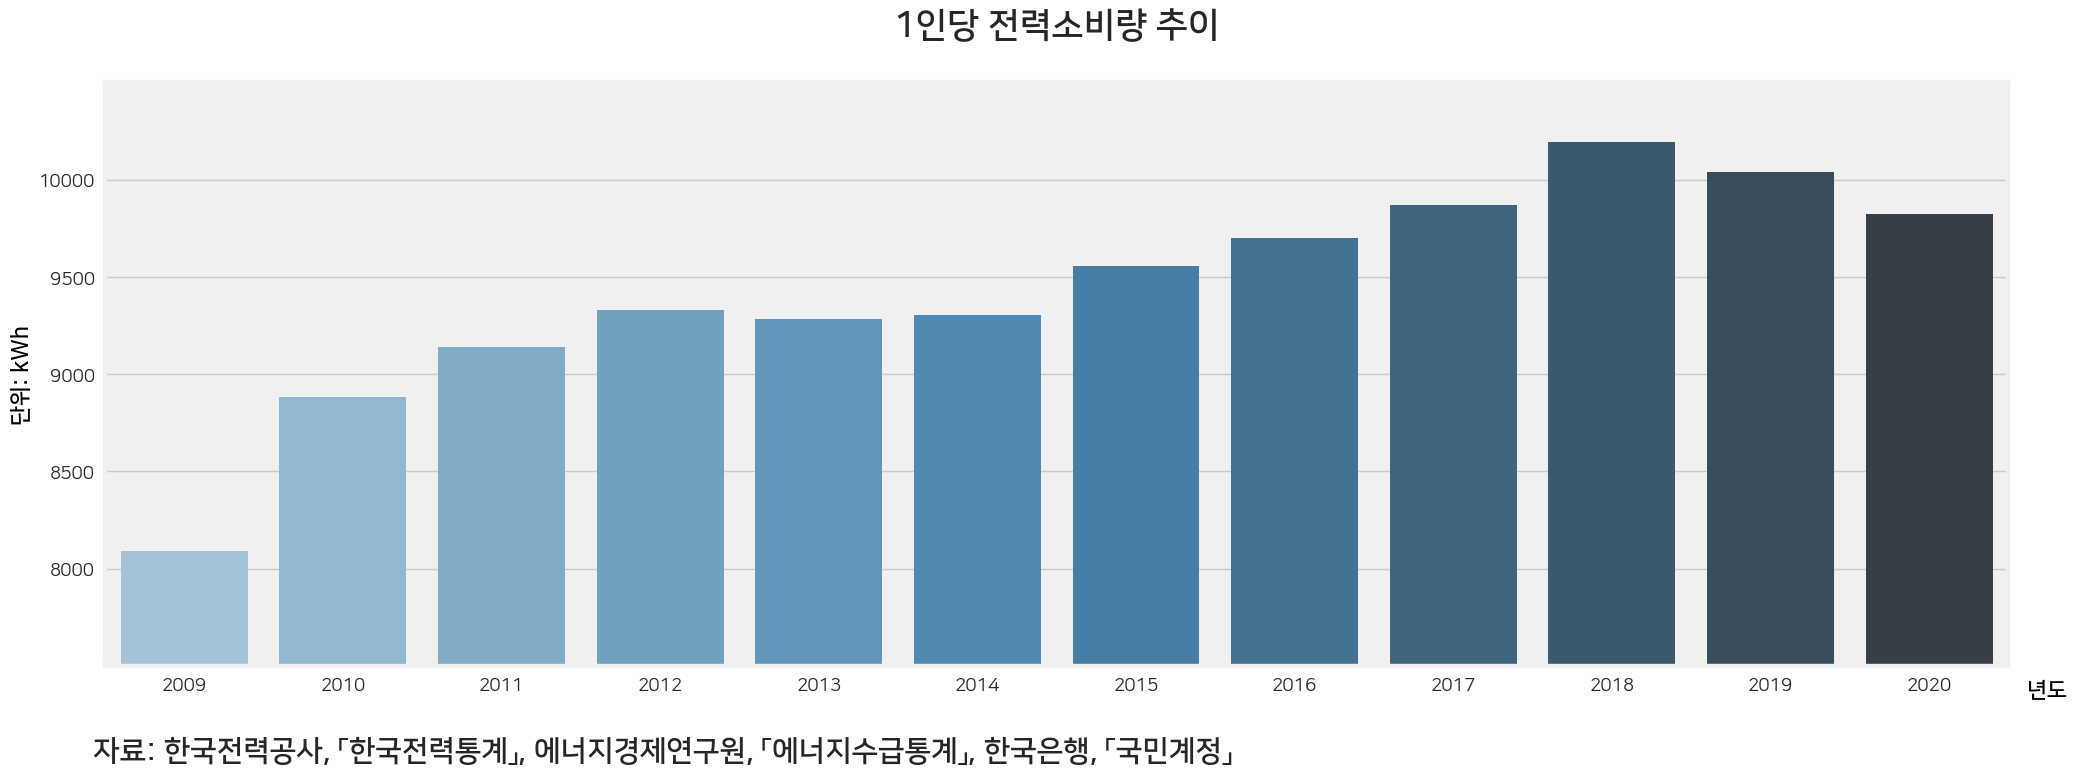

In [31]:
pd.options.plotting.backend = 'matplotlib'

df3 = pd.read_csv(base_path +'SmartGrid_data/power_consumption.csv')
df3 = df3[['연도','1인당_전력소비량']]

fig, ax1 = plt.subplots(figsize=(20, 7), facecolor="w")
p1 = sns.barplot(data=df3, x= '연도', y= '1인당_전력소비량', lw=3, ax=ax1, palette="Blues_d")
p1.set(xlabel=None, ylabel=None)


font_ylabel = {"fontsize":15, "fontweight":"bold", "ha": "center"}

ax1.set_title('1인당 전력소비량 추이', fontsize=24, fontweight="bold", pad=32)
plt.ylabel('단위: kWh', fontdict=font_ylabel, color="k")
ax1.set_xticks(sorted(df3.index.to_list()))
ax1.set_yticks([8000, 8500, 9000, 9500, 10000])
ax1.set_ylim([7500, 10500])
font_xlabel = {"fontsize":15, "ha":"left", "fontweight":"bold"}
ax1.text(1.01, -0.05, "년도", transform=ax1.transAxes, fontdict=font_xlabel, color="k")


fig.text(0.05, -0.05, '자료: 한국전력공사, 「한국전력통계」, 에너지경제연구원, 「에너지수급통계」, 한국은행, 「국민계정」', fontdict={'fontsize':"20", "fontweight":"bold"})
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
fig.tight_layout()

## Fig 23. 소비자물가와 전기요금 변동률 비교

자료
- [KEPCO](https://home.kepco.co.kr/kepco/KO/ntcob/list.do?menuCd=FN05030103&boardCd=BRD_000099)
- [전기요금 인상 관련 기사](https://biz.chosun.com/policy/policy_sub/2022/06/27/CUPYUXKX25H5XK2A4PCOZLO234/)

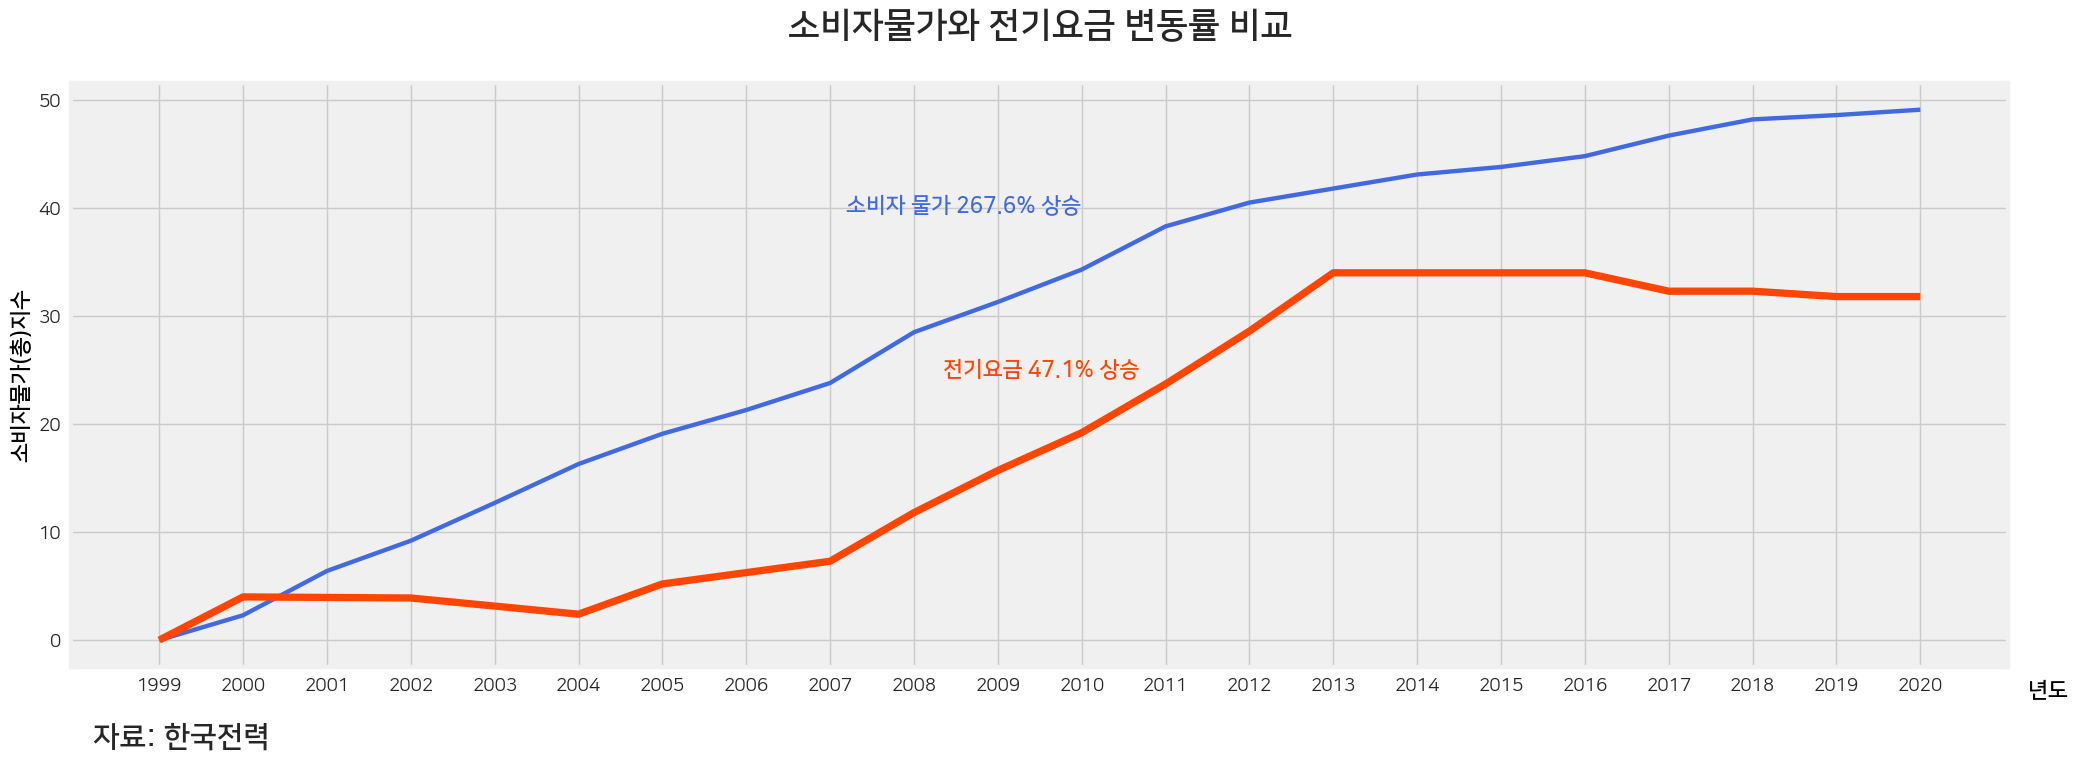

In [32]:
pd.options.plotting.backend = 'matplotlib'

df2 = pd.read_csv(base_path +'SmartGrid_data/consumer_inflation_and_electricity_bills.csv', index_col = 0)
df2['소비자 물가 누적'] = df2['소비자 물가 상승률'].cumsum()
df2['전기요금 누적'] = df2['전기요금 조정률'].cumsum()

fig, ax = plt.subplots(figsize=(20, 7), facecolor="w")

p1 = sns.lineplot(data=df2, x= '연도', y= '소비자 물가 누적', lw=3, ax=ax,color = 'royalblue')
p1.set(xlabel=None)
p2 = sns.lineplot(data=df2, x= '연도', y= '전기요금 누적', lw=5, ax=ax, color = 'orangered')
p2.set(xlabel=None)
ax.set_title('소비자물가와 전기요금 변동률 비교', fontsize=24, fontweight="bold", pad=32)
font_ylabel = {"fontsize":15, "fontweight":"bold"}
plt.ylabel('소비자물가(총)지수', fontdict=font_ylabel, color="k")
ax.set_xticks(sorted(df2.index.to_list()))
font_xlabel = {"fontsize":15, "ha":"left", "fontweight":"bold"}
ax.text(1.01, -0.05, "년도", transform=ax.transAxes, fontdict=font_xlabel, color="k")


ax.text(0.40, 0.78, "소비자 물가 267.6% 상승", transform=ax.transAxes, fontdict=font_xlabel, color="royalblue")
ax.text(0.45, 0.5, "전기요금 47.1% 상승", transform=ax.transAxes, fontdict=font_xlabel, color="orangered")

fig.text(0.05, -0.03, '자료: 한국전력', fontdict={'fontsize':"20", "fontweight":"bold"})
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
fig.tight_layout()

- 전기요금 상승이 소비자 물가 상승과 정비례 관계가 있음을 알 수 있습니다.
- 이는 전기요금 인상이 물가 상승에 상당한 영향을 끼치기 때문에, **효율적인 전력 관리(스마트그리드)의 필요성**이 대두됨을 알 수 있는 그래프입니다.

## Fig 24. 기후기술 영역별 특허 등록 건수

자료: [국가통계포털 KOSIS](https://kosis.kr/statHtml/statHtml.do?orgId=442&tblId=DT_21_08&vw_cd=MT_ZTITLE&list_id=N2_5&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE)

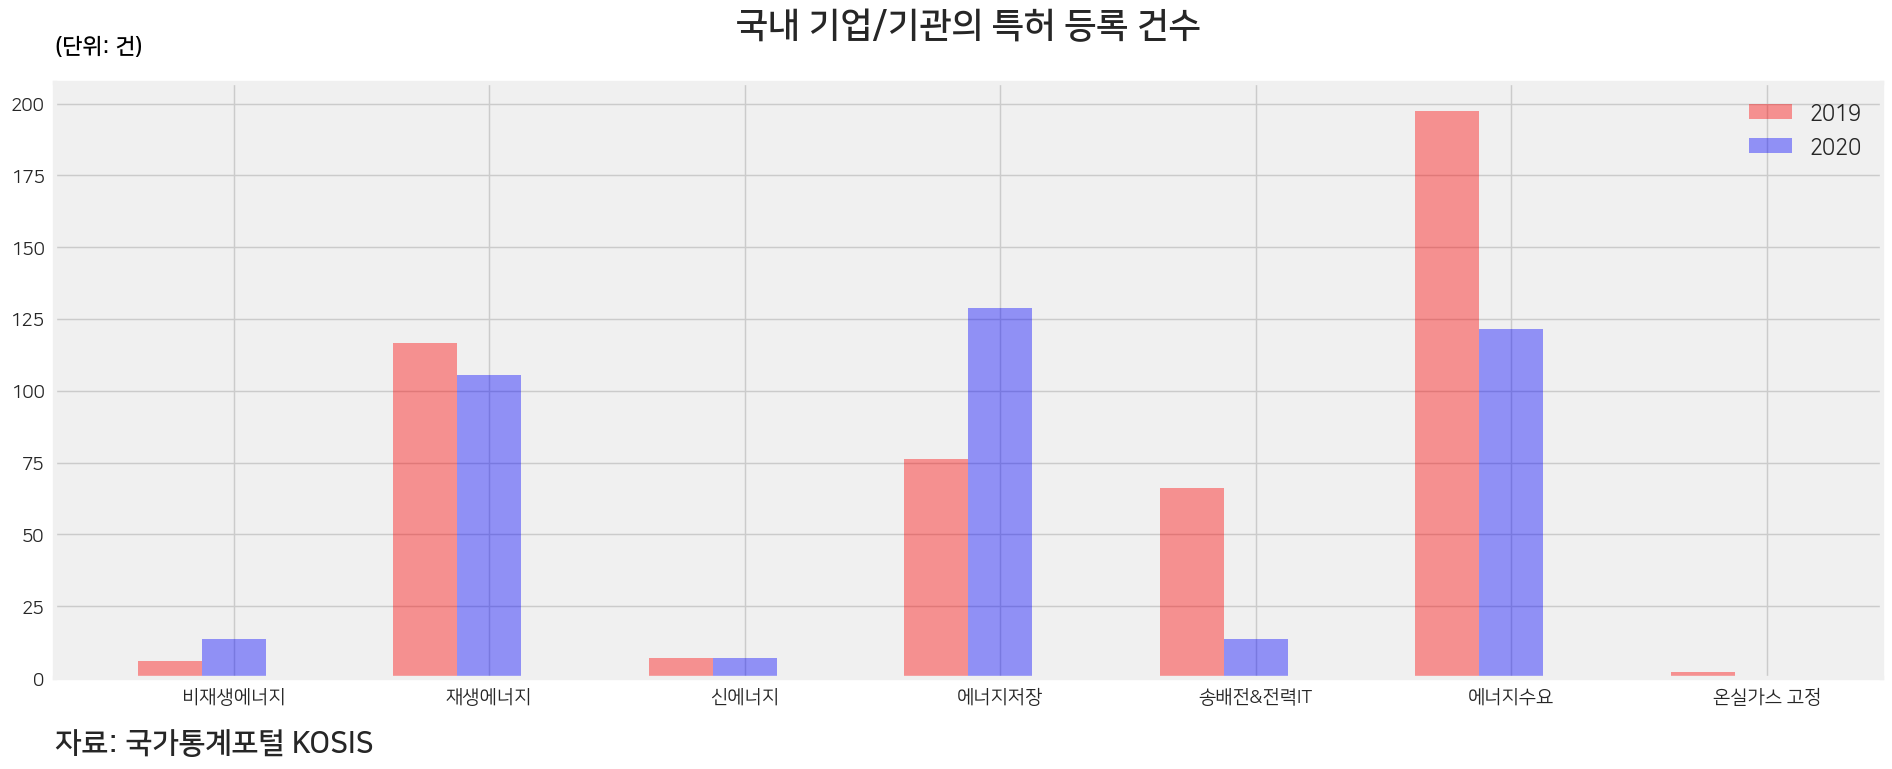

In [33]:
pd.options.plotting.backend = 'matplotlib'

df6 = pd.read_csv(base_path +'SmartGrid_data/korea-patent.csv', index_col = 0, encoding='cp949', thousands = ',')
df6 = df6[3:10]
category = df6['기후기술분류별(2)'].to_list()
df6['2019_retain_round'] = df6['2019 p)'].astype('int64')/1000 # 단위 처리
df6['2020_retain_round'] = df6['2020'].astype('int64')/1000 # 단위 처리
df6['2019_register_round'] = df6['2019 p).1'].astype('int64')/100 # 단위 처리
df6['2020_register_round'] = df6['2020.1'].astype('int64')/100 # 단위 처리


# df6['2019_retain_round'] = df6['2019 p)'].astype('int64')
# df6['2020_retain_round'] = df6['2020'].astype('int64')
# df6['2019_register_round'] = df6['2019 p).1'].astype('int64')
# df6['2020_register_round'] = df6['2020.1'].astype('int64')

category = df6['기후기술분류별(2)'].to_list()

# 그림 사이즈, 바 굵기 조정

fig, ax = plt.subplots(figsize=(20, 7), facecolor="w")
bar_width = 0.25

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(7)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df6['2019_register_round'], bar_width, alpha=0.4, color='red', label='2019')

b2 = plt.bar(index + bar_width, df6['2020_register_round'], bar_width, alpha=0.4, color='blue', label='2020')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 7 + bar_width, 1),category)
ax.set_title('국내 기업/기관의 특허 등록 건수', fontsize=24, fontweight="bold", pad=32)
ax.text(0, 1.05, "(단위: 건)", transform=ax.transAxes, fontdict=font_ylabel, color="k")
fig.text(0.08, -0.03, '자료: 국가통계포털 KOSIS', fontdict={'fontsize':"20", "fontweight":"bold"})
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.legend(fontsize = 15)
plt.show()

## Fig 25. 국가별 스마트그리드 투자 규모

출처: [IEA](https://www.iea.org/reports/smart-grids)

In [34]:
pd.options.plotting.backend = 'plotly'

df8 = pd.read_csv(base_path +'SmartGrid_data/Investment spending in electricity networks.csv', index_col = 'Unnamed: 0')
df8 = df8[df8.index == 2021]

nation = ['2021']

fig = go.Figure(data=[
                      go.Bar(x = nation, y = df8['Rest of World'],text = df8['Rest of World'], name = '기타 국가', marker=dict(color='#eeafaf')),
                      go.Bar(x = nation, y = df8['Europe'], text = df8['Europe'], name = '유럽', marker=dict(color='#afc4e7')),
                      go.Bar(x = nation, y = df8['United States'], text=df8['United States'], name = '미국', marker=dict(color='#bae7af')),
                      go.Bar(x = nation, y = df8['China'], text=df8['China'], name = '중국', marker=dict(color='#cb9ffd')),
                      go.Bar(x = nation, y = df8['Emerging market'], text = df8['Emerging market'], name = '신흥시장과 개발도상국', marker=dict(color='#f3cdad')),
])

fig.update_traces(texttemplate='%{text:.3s}', textposition='inside')
fig.update_layout(legend=dict(xanchor='right', x=3, yanchor='top'),margin=dict(l=10, r=10, t=150, b=200, pad=80),title ={'text':'<b>2021년 국가별 스마트그리드 투자 규모(단위 : 10억$)</b>', 'yanchor':'top', 'xanchor':'left', 'y': 0.96},font=dict(size=11),barmode='stack', autosize=False, width=500, height=800)
fig.add_annotation(dict(font=dict(size=15), x=-0.5, y=-0.3, showarrow=False, text='<b>자료:  IEA SmratGrids Report</b>', xref='paper', yref='paper'))

fig.show()

- 중국, 미국이 주도하고 있으며 유럽과 신흥시장, 개발도상국이 뒤를 잇고 있습니다.

## Fig 26. 스마트 그리드 세부 기술 현황

자료: [스마트그리드 데이터 센터](https://sgdata.ksga.org/kr/front/inter/instatic/instatic.do)

In [35]:
pd.options.plotting.backend = 'matplotlib'

dff = pd.read_csv(base_path +'SmartGrid_data/스마트그리드_업종별통계.csv', index_col='분야', thousands=',')
dff.astype({'2016': 'int', '2017':'int', '2018':'int', '2019':'int', '2020':'int'})

labels = ['AMI', 'ESS', 'EMS', 'EV충전']
fig = make_subplots(rows=2, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=dff['2016'], name = '16년'), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=dff['2017'], name = '17년'), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=dff['2018'], name = '18년'), 2, 1)
fig.add_trace(go.Pie(labels=labels, values=dff['2019'], name = '19년'), 2, 2)
fig.add_trace(go.Pie(labels=labels, values=dff['2020'], name = '20년'), 2, 3)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(  #전체 화면으로 해야 
    margin=dict(l=50, r=10, t=100, b=150, pad=20),
    height=800, width = 1000,
    title_text = "스마트그리드_업종별통계 2016-2020",
    annotations=[dict(text='2016', x=0.115, y=0.81, font_size=18, showarrow=False),
                 dict(text='2017', x=0.5, y=0.81, font_size=18, showarrow=False),
                 dict(text='2018', x=0.115, y=0.19, font_size=18, showarrow=False),
                 dict(text='2019', x=0.5, y=0.19, font_size=18, showarrow=False),
                 dict(text='2020', x=0.888, y=0.19, font_size=18, showarrow=False),
                ]
)
fig.add_annotation(dict(font=dict(size=15), x=0, y=-0.14, showarrow=False, text='<b>자료:  스마트그리드 데이터 센터</b>', xref='paper', yref='paper'))


- 2018년 ESS의 비율이 증가 후 감소하고 EV,  AMI의 비율이 증가하는것으로 보아 EV와 AMI에 투자가 이뤄지고 있다고 볼 수 있습니다.

## Fig 27. 스마트분야 시장 전망

자료: [중소기업전략로드맵](http://smroadmap.smtech.go.kr/)

In [36]:
pd.options.plotting.backend = 'plotly'

df9 = pd.read_csv(base_path +'SmartGrid_data/시장규모/스마트분야 세계시장 전망.csv', thousands=',')
df9 = df9.transpose()
header = df9.iloc[0]
df9 = df9[1:]
df9 = df9[:-1]
df9.rename(columns=header, inplace=True)
df9 = df9.astype('int')
df9.columns = ['스마트_에너지', '스마트_빌딩', '스마트_교통', '합계']

year = df9.index
fig = make_subplots(rows=1, cols=2, subplot_titles = ("<b>스마트시티 세계시장 전망</b>  (단위: 백만달러)","<b>스마트시티 국내시장 전망</b>  (단위: 억 원)"))

fig.add_trace(go.Bar( x=year, y = df9['스마트_에너지'],text = df9['스마트_에너지'], name = '스마트 에너지' , marker=dict(color='#eeafaf'), legendgroup='2', showlegend=False), row=1, col = 1)
fig.add_trace(go.Bar( x=year, y = df9['스마트_빌딩'], text =df9['스마트_빌딩'], name = '스마트 빌딩' , marker=dict(color='#afc4e7'), legendgroup='2', showlegend=False), row=1, col = 1)
fig.add_trace(go.Bar( x=year, y = df9['스마트_교통'], text=df9['스마트_교통'], name = '스마트 교통' , marker=dict(color='#bae7af'), legendgroup='2', showlegend=False), row=1, col = 1)



df10 = pd.read_csv(base_path +'SmartGrid_data/시장규모/국내스마트시장전망.csv', thousands=',')
df10 = df10.transpose()
header = df10.iloc[0]
df10 = df10[1:]
df10 = df10[:-1]
df10.rename(columns=header, inplace=True)
df10 = df10.astype('int')
df10.columns = ['스마트_에너지', '스마트_빌딩', '스마트_교통', '합계']

year = df10.index

fig.add_trace(go.Bar( x=year, y = df10['스마트_에너지'],text = df10['스마트_에너지'], name = '스마트 에너지' , marker=dict(color='#eeafaf'), legendgroup='1'),row=1, col = 2)
fig.add_trace(go.Bar( x=year, y = df10['스마트_빌딩'], text =df10['스마트_빌딩'], name = '스마트 빌딩' , marker=dict(color='#afc4e7'), legendgroup='1'),row=1, col = 2)
fig.add_trace(go.Bar( x=year, y = df10['스마트_교통'], text=df10['스마트_교통'], name = '스마트 교통' , marker=dict(color='#bae7af'), legendgroup='1'), row=1, col = 2)



fig.update_traces(texttemplate='%{text:.3s}', textposition='inside', legendgroup='2')
fig.update_layout(margin=dict(l=20, r=20, t=60, b=75), barmode='stack', autosize=False, title_x=0.5, width=1200, height=600, legend_title='<b>국가</b>')
fig.add_annotation(dict(font=dict(size=15), x=0, y=-0.14, showarrow=False, text='<b>자료: 중소기업전략로드맵</b>', xref='paper', yref='paper'))

fig.show()

- Grand View Research(2021)에 의하면 연평균 증가율이 29.3% 성장할 것으로 전망하고 있습니다.

- 전세계 스마트시티 시장 중 한국은 9.3%로 추정

## Fig 28. 세계 ESS 시장 규모

자료: [IEA ESS report](https://www.iea.org/reports/energy-storage)


In [37]:
pd.options.plotting.backend = 'plotly'

df14 = pd.read_csv(base_path +'SmartGrid_data/global energy storage market.csv')  # 단위 GW
year = df14['year']

fig = go.Figure(data=[
                      go.Bar( x=year, y = df14['Rest of the World'],text = df14['Rest of the World'], name = '기타' , marker=dict(color='#eeafaf')),
                      go.Bar( x=year, y = df14['Japan'], text =df14['Japan'], name = '일본' , marker=dict(color='#afc4e7')),
                      go.Bar( x=year, y = df14['South Korea'], text=df14['South Korea'], name = '대한민국' , marker=dict(color='#bae7af')),
                      go.Bar( x=year, y = df14['Europe'], text=df14['Europe'], name = '유럽' , marker=dict(color='thistle')),
                      go.Bar( x=year, y = df14['United States'], text=df14['United States'], name = '미국' , marker=dict(color='cornsilk')),
                      go.Bar( x=year, y = df14['China'], text=df14['China'], name = '중국' , marker=dict(color='mediumspringgreen')),

])

fig.update_traces(texttemplate='%{text:.s}', textposition='inside')
fig.update_layout(margin=dict(l=80, r=20, t=60, b=80),title = '<b>세계 ESS 시장 규모 (단위: GW)</b>', barmode='stack', autosize=False, width=600, height=600)
fig.add_annotation(dict(font=dict(size=15), x=0, y=-0.14, showarrow=False, text='<b>자료:  IEA ESS report</b>', xref='paper', yref='paper'))

fig.show()


- 저장소에 대한 전체 투자는 20년에 약 40% 증가했습니다.
- 2020년에는 미국과 중국이 투자를 주도하여 전체 시장에서 지배력을 행사하고 있습니다.

## Fig 29. 가상발전소 시장 규모 및 전망

자료: [중소기업전략로드맵](http://smroadmap.smtech.go.kr/)

### 가상발전소 (Virtual Power Plant)란?<br>

- 지역별로 흩어져 있는 재생에너지 발전설비와 ESS를 클라우드 기반 소프트웨어로 통합한 뒤 하나의 발전소처럼 관리

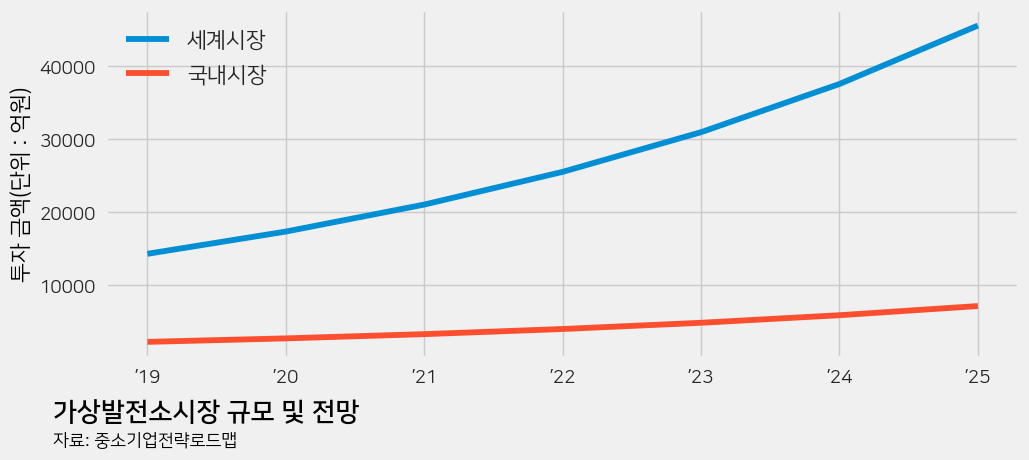

In [38]:
pd.options.plotting.backend = 'matplotlib'

df11 = pd.read_csv(base_path +'SmartGrid_data/시장규모/가상발전소 세계 시장규모 및 전망.csv', index_col='구분', thousands=',')
df11 = df11.astype('int')
df11 = df11*11
df12 = pd.read_csv(base_path +'SmartGrid_data/시장규모/가상발전소국내시장규모및전망.csv', index_col='구분', thousands=',')
df12 = df12.astype('int')
df12.rename(index={'세계시장':'국내시장'}, inplace=True)
df_a = pd.concat([df11, df12])
df_a = df_a.iloc[:,:-1]
df_a = df_a.T

# 세계시장은 백만달러, 국내시장은 억원이 기준이기 때문에 자료 제작 당시 1달러:1100원을  백만달러 : 11억원로 적용하여 시각화

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(nrows=2, figsize=(10,5), gridspec_kw={'height_ratios':[9,1]})

ax[0].plot(df_a.index,  df_a['세계시장'], label='세계시장')
ax[0].plot(df_a.index, df_a['국내시장'], label='국내시장')
ax[0].set_ylabel('투자 금액(단위 : 억원)', fontdict={'fontsize':15, 'color':'k'})
ax[0].legend(fontsize=15)
ax[1].axis('off')
fig.text(0.03, 0.1, '가상발전소시장 규모 및 전망', fontdict={'family': 'NanumSquare', 'fontsize':18, 'fontweight':'bold', 'color':'k'})
fig.text(0.03, 0.05, '자료: 중소기업전략로드맵', fontdict={'family': 'NanumSquare','fontsize':12, 'color':'k'})
plt.show()


- 가상발전소 세계시장은 19년 13억 달러에서 연평균 21.3% 성장하여 25년 41억 4,100만 달러 규모로 전망

- 국내시장은 19년 2,244억원에서 연평균 21.3% 성장하여 25년 7148억 원 규모로 전망


## Fig 30. 글로벌 및 국내 ESS 시장 규모 비교

자료: [SNE리서치, 현대경제연구원](http://www.thescoop.co.kr/news/articleView.html?idxno=53146)

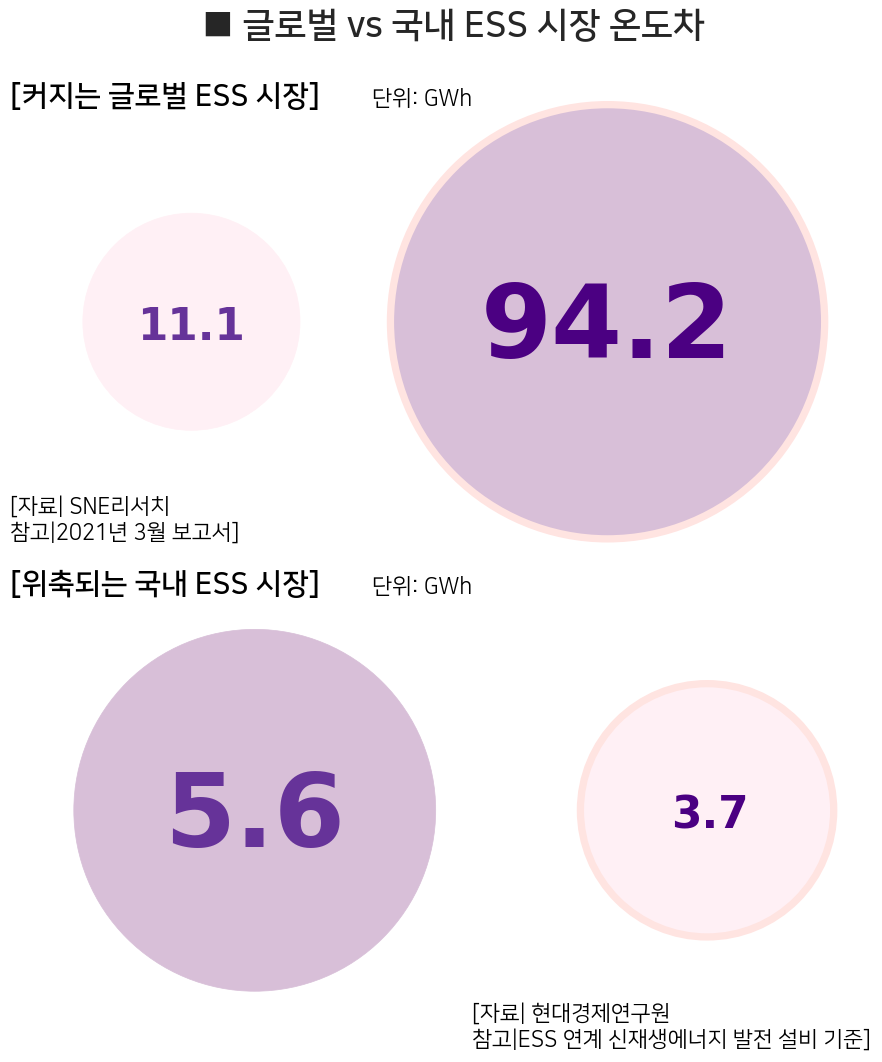

In [39]:
pd.options.plotting.backend = 'matplotlib'

fig, ax = plt.subplots(2,1, figsize=(15, 10), facecolor="w", constrained_layout=True, sharey=True)
ax[0].set_title('■ 글로벌 vs 국내 ESS 시장 온도차', fontsize=24, fontweight="bold", pad=32)

shp=patches.Circle((6.5,5.5), radius=0.6, color='lavenderblush')
ax[0].add_patch(shp)

shp=patches.Circle((8.8,5.5), radius=1.2, color='thistle',angle=45, linewidth=5)
shp.set_edgecolor('mistyrose')
ax[0].add_patch(shp)

shp=patches.Circle((5,5.5), radius=1, color='thistle')
ax[1].add_patch(shp)

shp=patches.Circle((7.5,5.5), radius=0.7, color='lavenderblush',angle=45, linewidth=5)
shp.set_edgecolor('mistyrose')
ax[1].add_patch(shp)

title_style = {"fontsize":20,"fontweight":"bold"}
small_style = {"fontsize":15}
num_style = {'fontname': 'DejaVu Sans', "fontsize":30, "fontweight":"bold"}
num1_style = {'fontname': 'DejaVu Sans', "fontsize":70, "fontweight":"bold"}
num2_style = {'fontname': 'DejaVu Sans', "fontsize":70, "fontweight":"bold"}
num3_style = {'fontname': 'DejaVu Sans', "fontsize":30, "fontweight":"bold"}
ax[0].text(5.5, 6.7, "[커지는 글로벌 ESS 시장]",fontdict=title_style, color="k")
ax[0].text(7.5, 6.7, "단위: GWh",fontdict=small_style, color="k")
ax[0].text(5.5, 4.3, "[자료| SNE리서치\n참고|2021년 3월 보고서]",fontdict=small_style, color="k")
ax[0].text(6.2, 5.4, "11.1",fontdict=num_style, color="rebeccapurple")
ax[0].text(8.1, 5.3, "94.2",fontdict=num1_style, color="indigo")


ax[1].text(3.65, 6.7, "[위축되는 국내 ESS 시장]",fontdict=title_style, color="k")
ax[1].text(5.65, 6.7, "단위: GWh",fontdict=small_style, color="k")
ax[1].text(6.2, 4.2, "[자료| 현대경제연구원\n참고|ESS 연계 신재생에너지 발전 설비 기준]",fontdict=small_style, color="k")
ax[1].text(4.5, 5.3, "5.6",fontdict=num2_style, color="rebeccapurple")
ax[1].text(7.3, 5.4, "3.7",fontdict=num3_style, color="indigo")


for i in range(2):
    ax[i].axis('scaled')
    ax[i].grid(False)
    ax[i].patch.set_facecolor('w')
    ax[i].axis('off')

plt.show()

- 스마트그리드의 큰 축을 이루는 ESS 시장에서 세계 시장 규모는 증가하고 있는 추세이지만, 반대로 한국은 투자심리가 위축되고 있습니다.
- 이는 한국의 ESS 육성 방법론에 대한 검토가 필요한 시점이며, **해외의 모범 사례를 참고**할 필요가 있습니다.

## Fig 31. 대규모 에너지 공급업체의 분기별 전기 미터기 설치 추이 (영국)

자료: [GOV.UK](https://www.gov.uk/government/statistics/smart-meters-in-great-britain-quarterly-update-march-2022)

### 해외 사례 중에서 왜 영국을 선택했는가?
- 영국은 글로벌 주요국가 중에서도 가장 먼저 '2050년 탄소 무배출 국가'를 선언했던 국가입니다. 가장 적극적인 움직임을 보이며, 스마트미터 사업에서 정부의 적극적인 통계 작성을 제공하고 있기에 영국을 한국의 벤치마크(benchmark) 사례로 뽑았습니다.

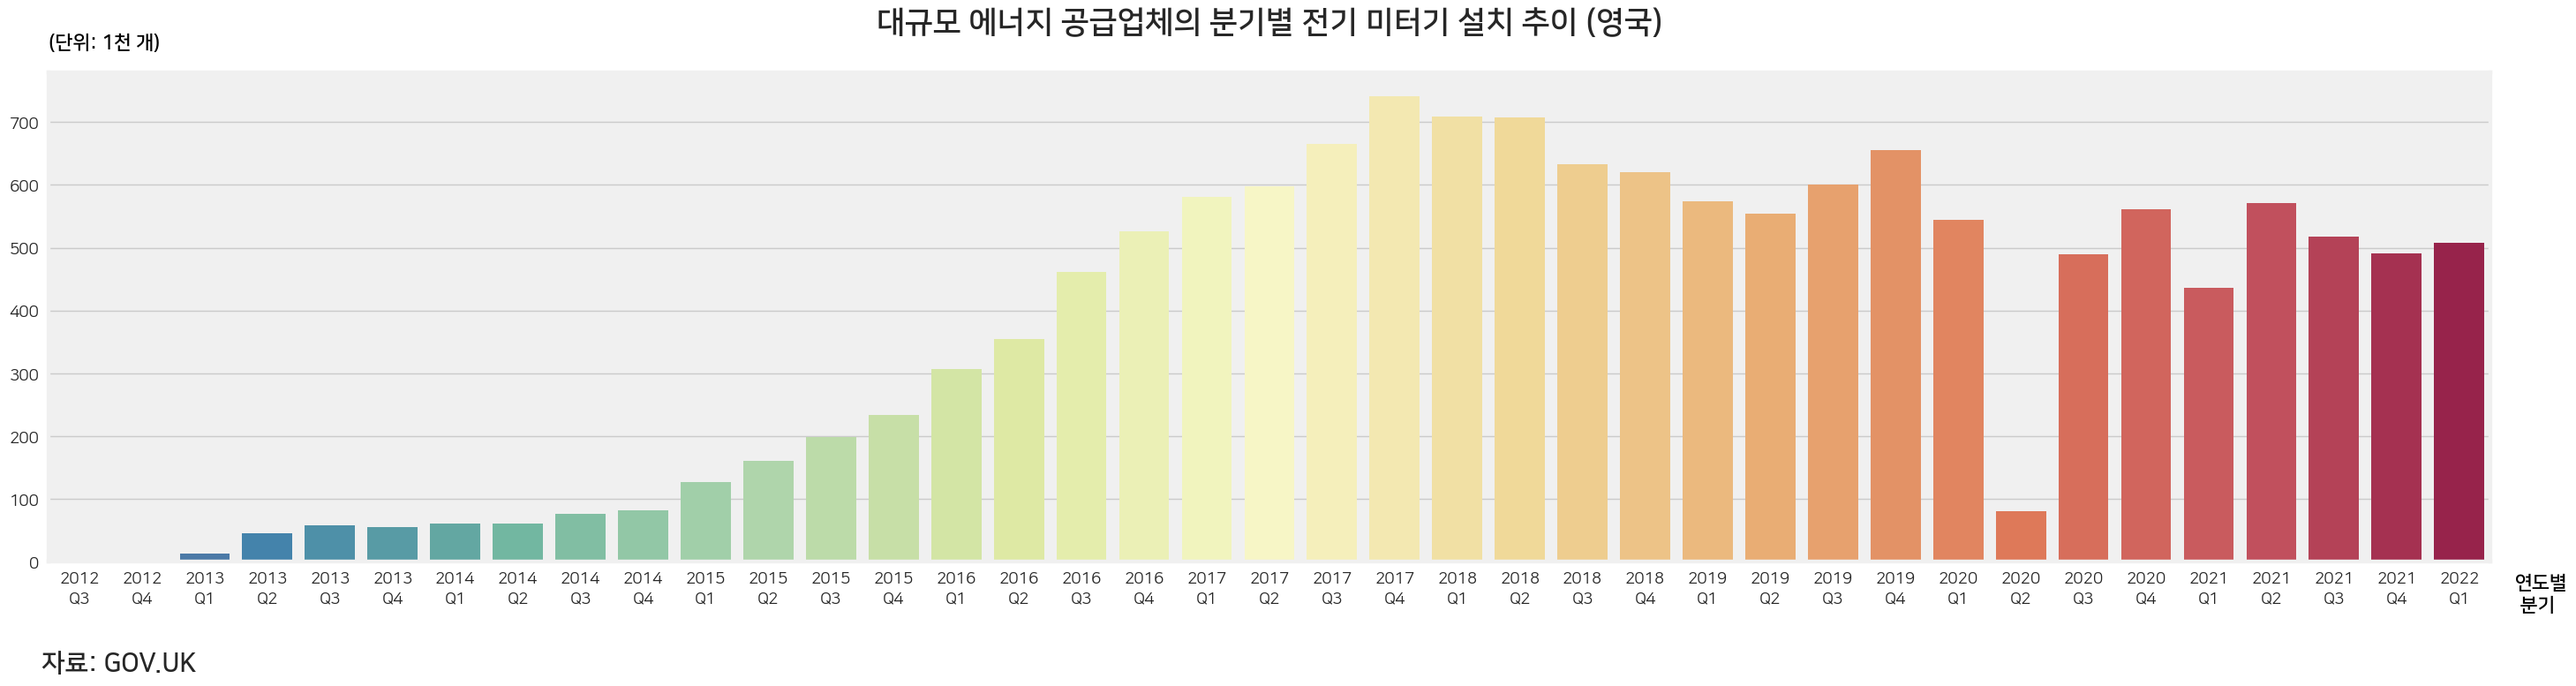

In [40]:
pd.options.plotting.backend = 'matplotlib'

df5 = pd.read_csv(base_path +'SmartGrid_data/electricity-meters.csv', thousands = ',')
df5['s_round'] = df5.electricity/1000 # 단위 처리

fig, ax = plt.subplots(figsize=(28, 7), facecolor="w")

p1 = sns.barplot(data=df5, x= 'year', y= 's_round', lw=5, ax=ax, color = 'c', palette="Spectral_r")
p1.set(xlabel=None, ylabel=None)

ax.set_title('대규모 에너지 공급업체의 분기별 전기 미터기 설치 추이 (영국)', fontsize=24, fontweight="bold", pad=32)
font_ylabel = {"fontsize":15, "fontweight":"bold"}
font_xlabel = {"fontsize":15, "ha":"left", "fontweight":"bold"}

ax.text(0, 1.05, "(단위: 1천 개)", transform=ax.transAxes, fontdict=font_ylabel, color="k")
ax.text(1.01, -0.1, "연도별\n 분기", transform=ax.transAxes, fontdict=font_xlabel, color="k")
# ax.set_xticks(year_list)
# ax.set_xlim(['2012\nQ2', '2022\nQ2'])

fig.text(0.02, -0.05, '자료: GOV.UK', fontdict={'fontsize':"20", "fontweight":"bold"})

fig.tight_layout()
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.show()

# 20년도 이상 데이터 원인 분석

- 영국의 전기 미터기 설치의 추이는 상승세를 보이다가 2020년 코로나 대유행 시기로 주춤해진 것으로 분석됩니다.
- 이는 일시적인 외생변수 요인이기 때문에 전기 미터기 상승 추세는 코로나 종식 이후에 회복될 것으로 전망이 됩니다.

## Fig 32. 대규모 에너지 공급업체의 분기말 운영 가정용 전기 미터기 수 추이 (영국)

자료: [GOV.UK](https://www.gov.uk/government/statistics/smart-meters-in-great-britain-quarterly-update-march-2022)

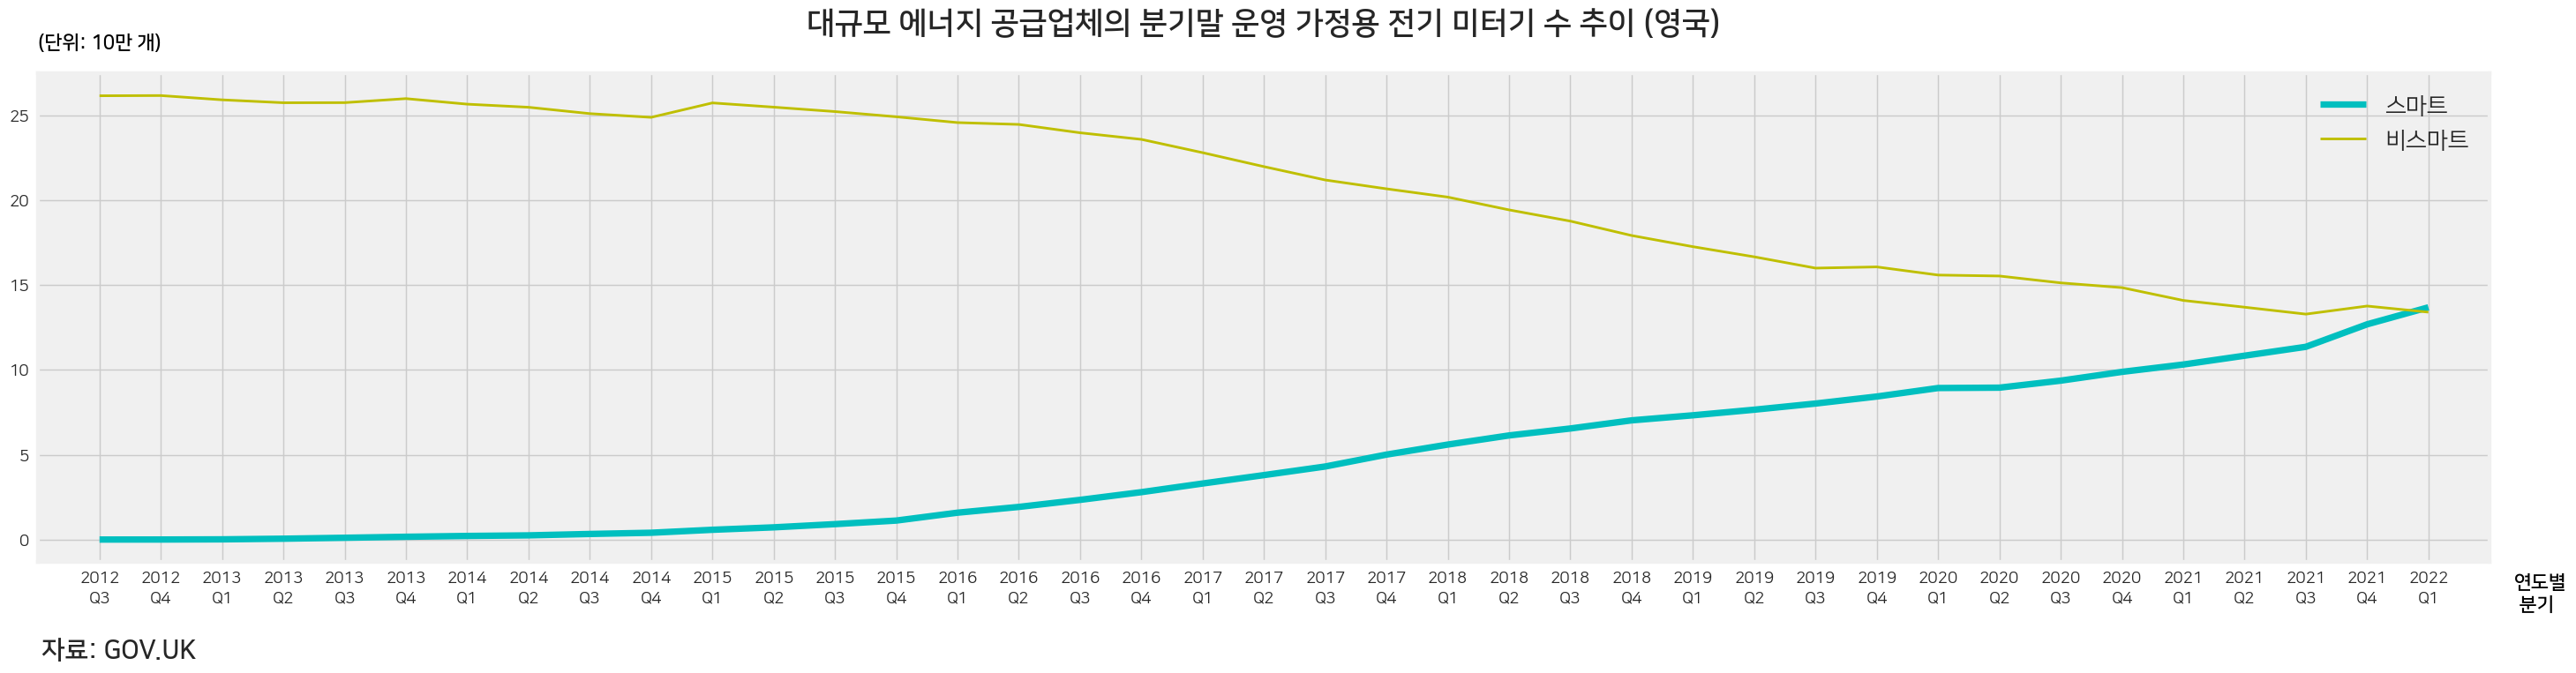

In [41]:
pd.options.plotting.backend = 'matplotlib'

df4 = pd.read_csv(base_path +'SmartGrid_data/smart-meters.csv', index_col = 0, thousands = ',')
df4['s_round'] = df4.smart_electricity/1000000 # 단위 처리
df4['n_round'] = df4.non_smart_electricity/ 1000000 # 단위 처리
year_list = df4.index.tolist()
year_list.remove('2012\nQ2')
year_list.remove('2022\nQ2')

fig, ax = plt.subplots(figsize=(28, 7), facecolor="w")

p1 = sns.lineplot(data=df4, x= 'year', y= 's_round', lw=5, ax=ax, color = 'c', label = '스마트')
p1.set(xlabel=None, ylabel=None)
p2 = sns.lineplot(data=df4, x= 'year', y= 'n_round', lw=2, ax=ax, color = 'y', label = '비스마트')
p2.set(xlabel=None, ylabel=None)
ax.set_title('대규모 에너지 공급업체의 분기말 운영 가정용 전기 미터기 수 추이 (영국)', fontsize=24, fontweight="bold", pad=32)
font_ylabel = {"fontsize":15, "fontweight":"bold"}
ax.set_xticks(sorted(df4.index.to_list()))
font_xlabel = {"fontsize":15, "ha":"left", "fontweight":"bold"}

ax.text(0, 1.05, "(단위: 10만 개)", transform=ax.transAxes, fontdict=font_ylabel, color="k")
ax.text(1.01, -0.1, "연도별\n 분기", transform=ax.transAxes, fontdict=font_xlabel, color="k")
ax.set_xticks(year_list)
ax.set_xlim(['2012\nQ2', '2022\nQ2'])

fig.text(0.02, -0.03, '자료: GOV.UK', fontdict={'fontsize':"20", "fontweight":"bold"})

fig.tight_layout()
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.legend(fontsize = 18)
plt.show()

- 가정용 전기 미터기 수의 스마트미터기의 비중이 올라가는 추세이고, 2022년 Q1 시점에서 골든크로스(두 개의 꺾은선 그래프 선이 교차하는 현상)를 이루는 모습을 보이고 있습니다.
- 가정용 전기 미터기 시장에서 IoT(사물인터넷)을 통해서 효율적인 전력 관리가 대두되는 모습임을 유추할 수 있습니다.

## Fig 33. 그리드 스케일 배터리 스토리지의 국가별 투자 추이

자료: [IEA](https://www.iea.org/data-and-statistics/charts/investment-in-grid-scale-battery-storage-2012-2019)

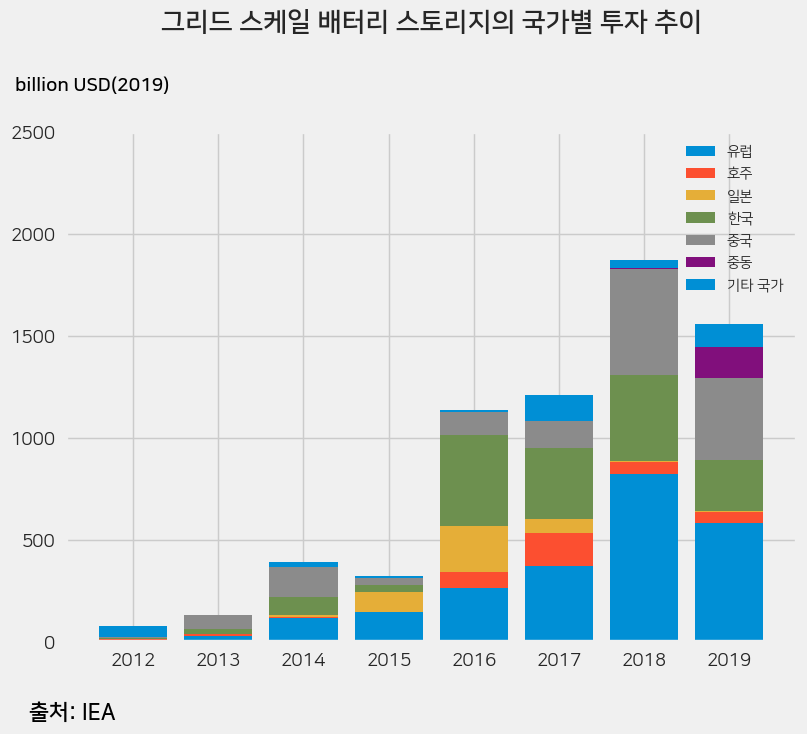

In [42]:
# pd.options.plotting.backend = 'matplotlib'

df = pd.read_csv(base_path +'SmartGrid_data/grid_scale.csv')

plt.figure(figsize=(8,6))
year = df['year'].to_list()
Europe = df['Europe'].to_list()
Australia = df['Australia'].to_list()
Japan = df['Japan'].to_list()
Korea = df['Korea'].to_list()
China = df['China'].to_list()
Middle_East = df['Middle East'].to_list()
Rest_of_the_world = df['Rest of the world'].to_list()

a_bottom = np.add(Europe, Australia)
b_bottom = np.add(a_bottom, Japan)
c_bottom = np.add(b_bottom, Korea)
d_bottom = np.add(c_bottom, China)
e_bottom = np.add(d_bottom, Middle_East)
x = range(len(year))

plt.bar(x, Europe,  label = '유럽')
plt.bar(x, Australia, bottom=Europe, label = '호주')
plt.bar(x, Japan, bottom=a_bottom,  label = '일본')
plt.bar(x, Korea, bottom=b_bottom,  label = '한국')
plt.bar(x, China, bottom=c_bottom,  label = '중국')
plt.bar(x, Middle_East, bottom=d_bottom,  label = '중동')
plt.bar(x, Rest_of_the_world, bottom=e_bottom,  label = '기타 국가')

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(year)

ax.set_yticks([0, 500, 1000, 1500, 2000, 2500])
ax.set_ylim([0, 2500])
ax.set_title('그리드 스케일 배터리 스토리지의 국가별 투자 추이', fontsize=18, fontweight="bold", pad=70)
ax.text(-0.07, 1.08, "billion USD(2019)", transform=ax.transAxes, fontdict={'fontsize':"13", "fontweight":"bold"}, color="k")
ax.text(-0.05, -0.15, "출처: IEA", transform=ax.transAxes, fontdict={'fontsize':"15", "fontweight":"bold"}, color="k")
plt.legend()
plt.show()

- ESS 분야에서의 그리드 스케일의 배터리 스토리지는 전통적인 유럽의 강세와 한국, 중국의 배터리 업체들이 경쟁에 참여하고 있는 상황입니다.

## Fig 34. 신재생에너지 설비용량 추이
자료: [전력거래소](https://www.energy.gov/sites/prod/files/2020/12/f81/Energy%20Storage%20Market%20Report%202020_0.pdf)

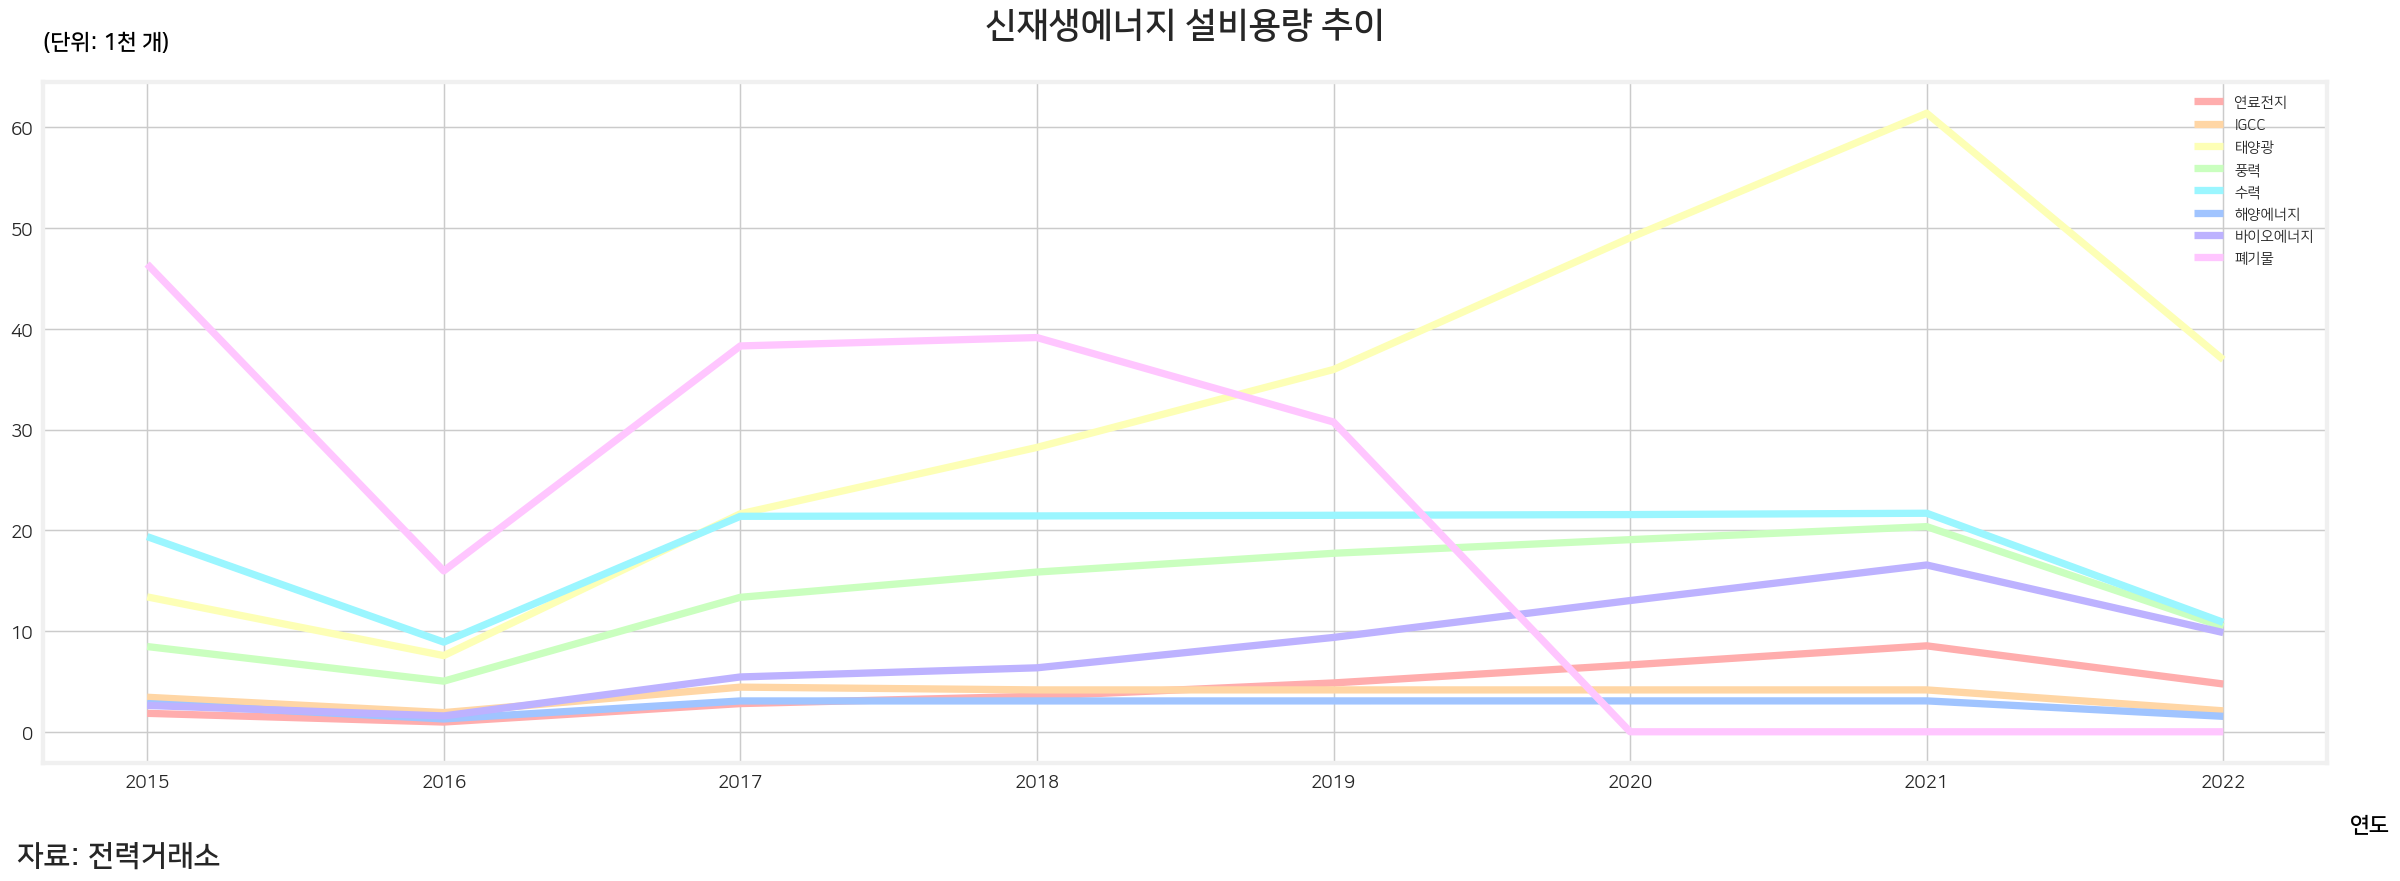

In [43]:
pd.options.plotting.backend = 'matplotlib'

df = pd.read_csv(base_path +'SmartGrid_data/facility_capacity.csv', thousands = ',',encoding = 'cp949')
y = df.groupby(df['년도'])['연료전지'].sum()/1000
i = df.groupby(df['년도'])['IGCC'].sum()/1000
t = df.groupby(df['년도'])['태양광'].sum()/1000
p = df.groupby(df['년도'])['풍력'].sum()/1000
s = df.groupby(df['년도'])['수력'].sum()/1000
h = df.groupby(df['년도'])['해양에너지'].sum()/1000
b = df.groupby(df['년도'])['바이오에너지'].sum()/1000
pe = df.groupby(df['년도'])['폐기물'].sum()/1000

fig, ax = plt.subplots(figsize=(25, 8), facecolor="w")
ax.set_facecolor('w')

p1 = sns.lineplot(data=y.T,lw=5, ax=ax, color = '#ffadad', label = '연료전지')
p2 = sns.lineplot(data=i.T,lw=5, ax=ax, color = '#ffd6a5', label = 'IGCC')
p3 = sns.lineplot(data=t.T,lw=5, ax=ax, color = '#fdffb6', label = '태양광')
p4 = sns.lineplot(data=p.T,lw=5, ax=ax, color = '#caffbf', label = '풍력')
p5 = sns.lineplot(data=s.T,lw=5, ax=ax, color = '#9bf6ff', label = '수력')
p6 = sns.lineplot(data=h.T,lw=5, ax=ax, color = '#a0c4ff', label = '해양에너지')
p7 = sns.lineplot(data=b.T,lw=5, ax=ax, color = '#bdb2ff', label = '바이오에너지')
p8 = sns.lineplot(data=pe.T,lw=5, ax=ax, color = '#ffc6ff', label = '폐기물')
p1.set(xlabel=None, ylabel=None)
ax.set_title('신재생에너지 설비용량 추이', fontsize=24, fontweight="bold", pad=32)
ax.text(0, 1.05, "(단위: 1천 개)", transform=ax.transAxes, fontdict=font_ylabel, color="k")
ax.text(1.01, -0.1, "연도", transform=ax.transAxes, fontdict=font_xlabel, color="k")

fig.text(0.07, -0.05, '자료: 전력거래소', fontdict={'fontsize':"20", "fontweight":"bold"})

plt.show()

## Fig 35. 연도별 AMI 보급량 추이

자료: [한국전력 국정감사 2020](http://www.sisajournal-e.com/news/articleView.html?idxno=224428)

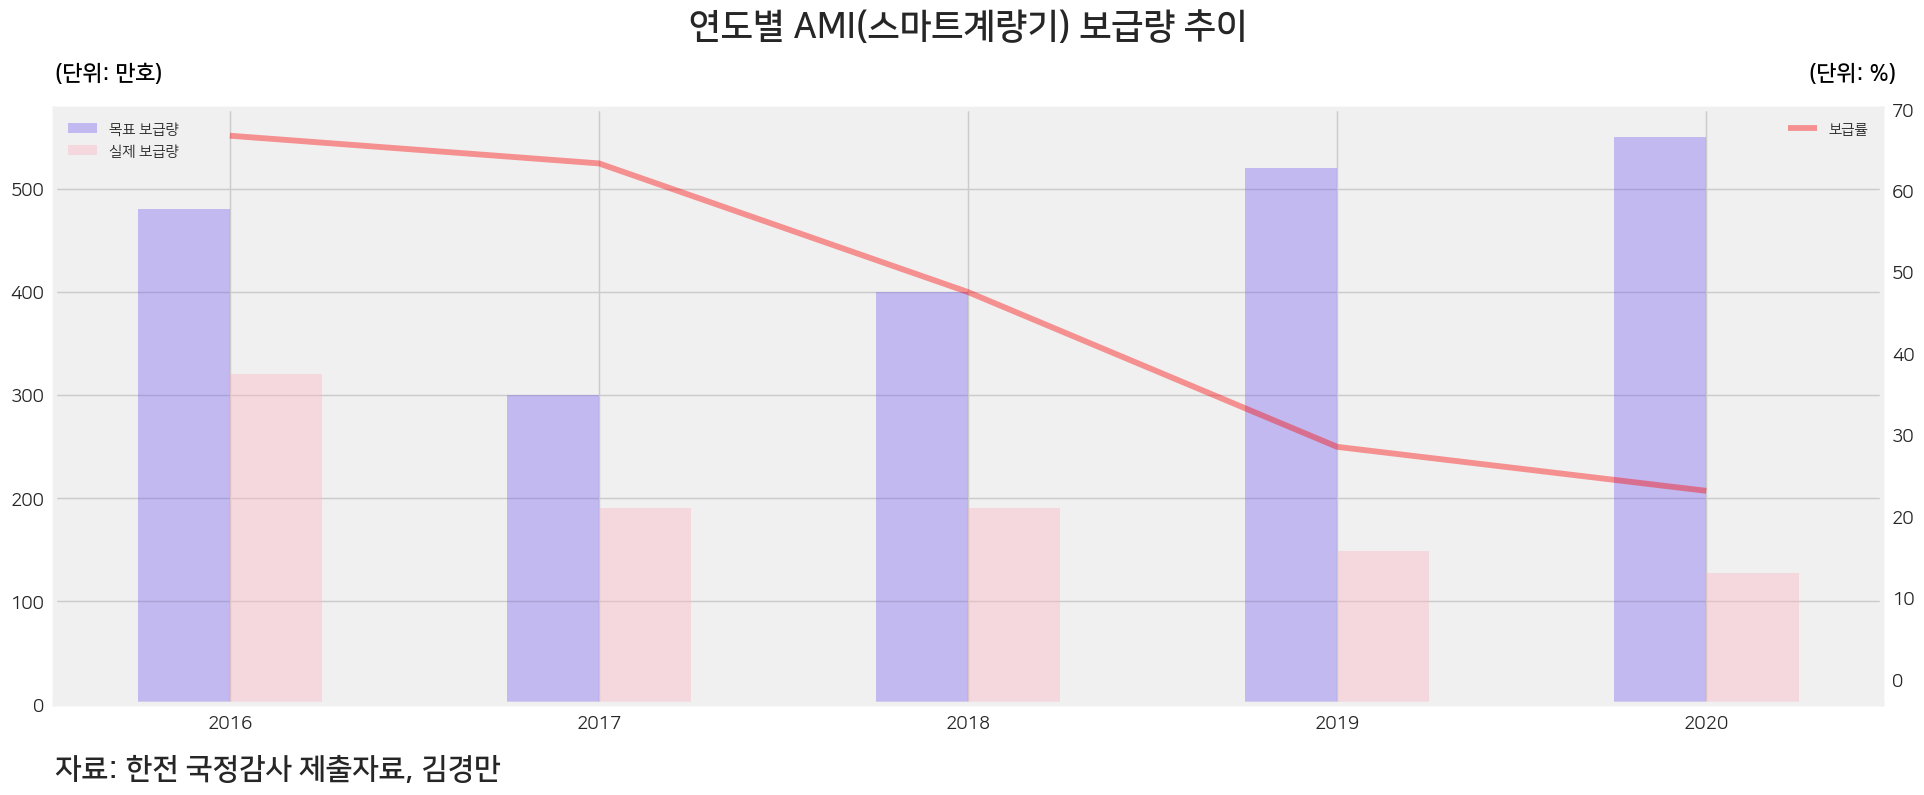

In [44]:
pd.options.plotting.backend = 'matplotlib'

df = pd.read_csv(base_path +'SmartGrid_data/ami_data.csv')
# 그림 사이즈, 바 굵기 조정

fig, ax = plt.subplots(figsize=(20, 7), facecolor="w")
bar_width = 0.25
year = df['연도'].to_list()
# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(5)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = ax.bar(index, df['목표 보급량'], bar_width, alpha=0.4, color='mediumslateblue', label='목표 보급량')

b2 = ax.bar(index + bar_width, df['실제 보급량'], bar_width, alpha=0.4, color='lightpink', label='실제 보급량')

ax2 = ax.twinx()
p1 = ax2.plot(index+ bar_width/2, df['보급률'], bar_width, alpha=0.4, color='r', label='보급률')
plt.xticks(np.arange(bar_width-0.125, 5, 1),year)
ax.set_title('연도별 AMI(스마트계량기) 보급량 추이', fontsize=24, fontweight="bold", pad=50,)
ax.text(0, 1.05, "(단위: 만호)", transform=ax.transAxes, fontdict=font_ylabel, color="k")
fig.text(0.08, -0.03, '자료: 한전 국정감사 제출자료, 김경만', fontdict={'fontsize':"20", "fontweight":"bold"})
ax.text(0.96, 1.05, "(단위: %)", transform=ax.transAxes, fontdict=font_ylabel, color="k")


ax.legend(loc='upper left')
ax2.legend(['보급률'])
plt.grid(False)
plt.show()

- 현재 한국의 AMI(스마트미터)의 보급량은 목표치에 비해 저조한 편으로 제도적 인센티브를 통한 육성 정책을 수립해야 하는 시급성이 보입니다.

# 나가며

- 감축 분야에서 **CCUS**와 **스마트그리드**의 현재와 미래 전망을 논해 보았습니다. 지구온난화의 위험성은 전세계가 현재 뼈져리게 인식하고 있는 상황이고 선진국의 관심과 투자 또한 여러 시각화를 통해 볼 수 있었습니다. 
- 그에 비해 한국은 감축기술에 대한 인력 구성에 비해, 정책적 지원이 미비함을 볼 수 있었습니다. 선진국의 사례를 통해서 정책적 지원의 중요성을 인지하고 기후기술 육성에 힘을 쏟아 신성장 동력으로 나아가는 대한민국이 되었으면 합니다.